<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>
    
Thank you for updates! My new comments have digit 2. 
    
    
I do not have any questions, so I can accept the project now. Thank you again for such an excellent job here. Congratulations and good luck! 
    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, Brandon! I am a reviewer on this project. 
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You did a fantastic job here, and I hope you enjoyed this topic. 


- You have successfully investigated the data we have;


- Prepared the data for further analysis;


- Trained and compared several models; 


- Tuned hyperparameters; 


- Wrote a great conclusion! 



Actually the project is almost perfect. There's only one tiny but still important issue. Would you please take a look at my comments? </div>

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>

### Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])

In [4]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [5]:
df.shape

(26496, 2)

In [6]:
df.isnull().sum()

datetime      0
num_orders    0
dtype: int64

no misisng values

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

    
> no misisng values
    
    
How do you know that? :) We only see first and last 5 rows. Please try to print the number of missing values using `sum` method.
</div>

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student answer. </b>

updated. I forgot to revert it back :).
</div>  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good :)
</div>

In [6]:
df.duplicated().sum()

0

no duplicates

In [7]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


The mean number of orders is 14, and the ordes range from 0 - 119.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [9]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2018-03-01 00:00:00'), Timestamp('2018-08-31 23:50:00'))

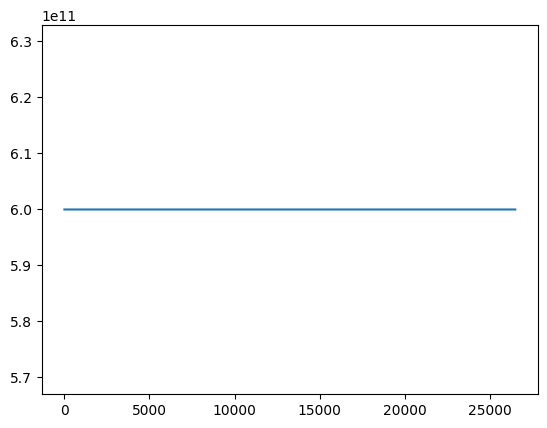

In [10]:
(df['datetime'] - df['datetime'].shift()).plot()
plt.xlabel('Index')
plt.ylabel('Time Difference')
plt.title('Time Difference Between Consecutive Rows')
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
- It's not clear what you are trying to display here. 



- Please don't forget to add titles and axes labels so that a reader can easily understand what's going on here. We do our job for a client, and he or she may not understand the graph at all. That's why we need titels, labels and comments :)

    
</div>



The datasets is time ordered and there are no gaps.

The time difference between consecutive rows in the datetime column is consistent.

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Student answer. </b>

updated. just to check whether .
</div> 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>

    
> The time difference between consecutive rows in the datetime column is consistent.
    
    
Understood.
</div>

## Preparation

In [11]:
# predictions are required for the next hour
df_hourly = df.copy(deep=True)
df_hourly.set_index('datetime', inplace=True)
df_hourly = df_hourly.resample('1H').sum()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! 
    
</div>

In [12]:
def create_ts_features(df, dt_field, target, max_lag=1, rolling_window=1):
    
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag+1):
        df['lag_{}'.format(str(lag))] = df[target].shift(lag)
    
    df['rolling_mean'] = df[target].shift().rolling(rolling_window).mean()
    df['rolling_median'] = df[target].shift().rolling(rolling_window).median()
    df['rolling_std'] = df[target].shift().rolling(rolling_window).std()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct. Sometimes we can notice autocorrelation in time series. It means that the current value of the series depends on the previous values. Including so-called lag components allows machine learning models, such as linear regression, to take this dependency into account.
</div>

In [13]:
create_ts_features(df_hourly, 'datetime', 'num_orders', max_lag=7, rolling_window=7)

In [14]:
df_hourly.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,rolling_median,rolling_std
datetime,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_hourly.describe()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,rolling_median,rolling_std
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.00000,4415.000000,4414.000000,4413.000000,4412.000000,4411.000000,4410.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,84.422781,5.505435,15.836957,3.005435,11.50000,84.395470,84.364069,84.347156,84.331369,84.319655,84.291837,84.261737,84.331108,82.863688,30.913356
std,45.023853,1.713306,8.855229,1.990684,6.92297,44.992356,44.949043,44.940088,44.932942,44.931299,44.898387,44.858959,31.807426,32.062825,14.822064
min,0.000000,3.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,17.000000,5.814596
25%,54.000000,4.000000,8.000000,1.000000,5.75000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,62.285714,61.000000,21.037382
50%,78.000000,5.500000,16.000000,3.000000,11.50000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,79.428571,78.000000,27.944673
75%,107.000000,7.000000,23.250000,5.000000,17.25000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,101.571429,101.000000,37.235416
max,462.000000,8.000000,31.000000,6.000000,23.00000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,254.142857,238.000000,151.400918


In [16]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_orders      4416 non-null   int64  
 1   month           4416 non-null   int64  
 2   day             4416 non-null   int64  
 3   dayofweek       4416 non-null   int64  
 4   hour            4416 non-null   int64  
 5   lag_1           4415 non-null   float64
 6   lag_2           4414 non-null   float64
 7   lag_3           4413 non-null   float64
 8   lag_4           4412 non-null   float64
 9   lag_5           4411 non-null   float64
 10  lag_6           4410 non-null   float64
 11  lag_7           4409 non-null   float64
 12  rolling_mean    4409 non-null   float64
 13  rolling_median  4409 non-null   float64
 14  rolling_std     4409 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 552.0 KB


In [17]:
cols_to_change = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_median']
df_hourly[cols_to_change] = df_hourly[cols_to_change].astype('Int16')

In [18]:
df_hourly.describe()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,rolling_median,rolling_std
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.00000,4415.000000,4414.000000,4413.000000,4412.000000,4411.000000,4410.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,84.422781,5.505435,15.836957,3.005435,11.50000,84.395470,84.364069,84.347156,84.331369,84.319655,84.291837,84.261737,84.331108,82.863688,30.913356
std,45.023853,1.713306,8.855229,1.990684,6.92297,44.992356,44.949043,44.940088,44.932942,44.931299,44.898387,44.858959,31.807426,32.062825,14.822064
min,0.000000,3.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,17.000000,5.814596
25%,54.000000,4.000000,8.000000,1.000000,5.75000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,62.285714,61.000000,21.037382
50%,78.000000,5.500000,16.000000,3.000000,11.50000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,79.428571,78.000000,27.944673
75%,107.000000,7.000000,23.250000,5.000000,17.25000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,101.571429,101.000000,37.235416
max,462.000000,8.000000,31.000000,6.000000,23.00000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,254.142857,238.000000,151.400918


In [19]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_orders      4416 non-null   int64  
 1   month           4416 non-null   int64  
 2   day             4416 non-null   int64  
 3   dayofweek       4416 non-null   int64  
 4   hour            4416 non-null   int64  
 5   lag_1           4415 non-null   Int16  
 6   lag_2           4414 non-null   Int16  
 7   lag_3           4413 non-null   Int16  
 8   lag_4           4412 non-null   Int16  
 9   lag_5           4411 non-null   Int16  
 10  lag_6           4410 non-null   Int16  
 11  lag_7           4409 non-null   Int16  
 12  rolling_mean    4409 non-null   float64
 13  rolling_median  4409 non-null   Int16  
 14  rolling_std     4409 non-null   float64
dtypes: Int16(8), float64(2), int64(5)
memory usage: 379.5 KB


## Analysis

### Plot in different intervals

In [20]:
def plot_orders(dfs, field, r=1, c=1, figsize=(12, 10), is_mean_window=False, window=1, titles=[], sup_title=None):
    
    fig, axes = plt.subplots(r, c, figsize=figsize)
    if not is_mean_window:
        for idx, (df, title, ax) in enumerate(zip(dfs, titles, axes.flatten())):
            sns.lineplot(df.index, df, ax=ax)
            axes[idx].set_title(title)
    else:
        for idx, (df, title, ax) in enumerate(zip(dfs, titles, axes.flatten())):
            sns.lineplot(df.index, df, ax=ax, label='hourly trend')
            sns.lineplot(df.index, df.shift().rolling(window).mean(), ax=ax, label='mean')
            sns.lineplot(df.index, df.shift().rolling(window).std(), ax=ax, label='std')
            axes[idx].set_title(title)
    axes.flat[-1].set_visible(False) 
    plt.suptitle(sup_title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [21]:
hourly_orders = df.set_index('datetime')['num_orders'].resample('1H').mean()
daily_orders = df.set_index('datetime')['num_orders'].resample('1D').mean()
monthly_orders = df.set_index('datetime')['num_orders'].resample('1M').mean()

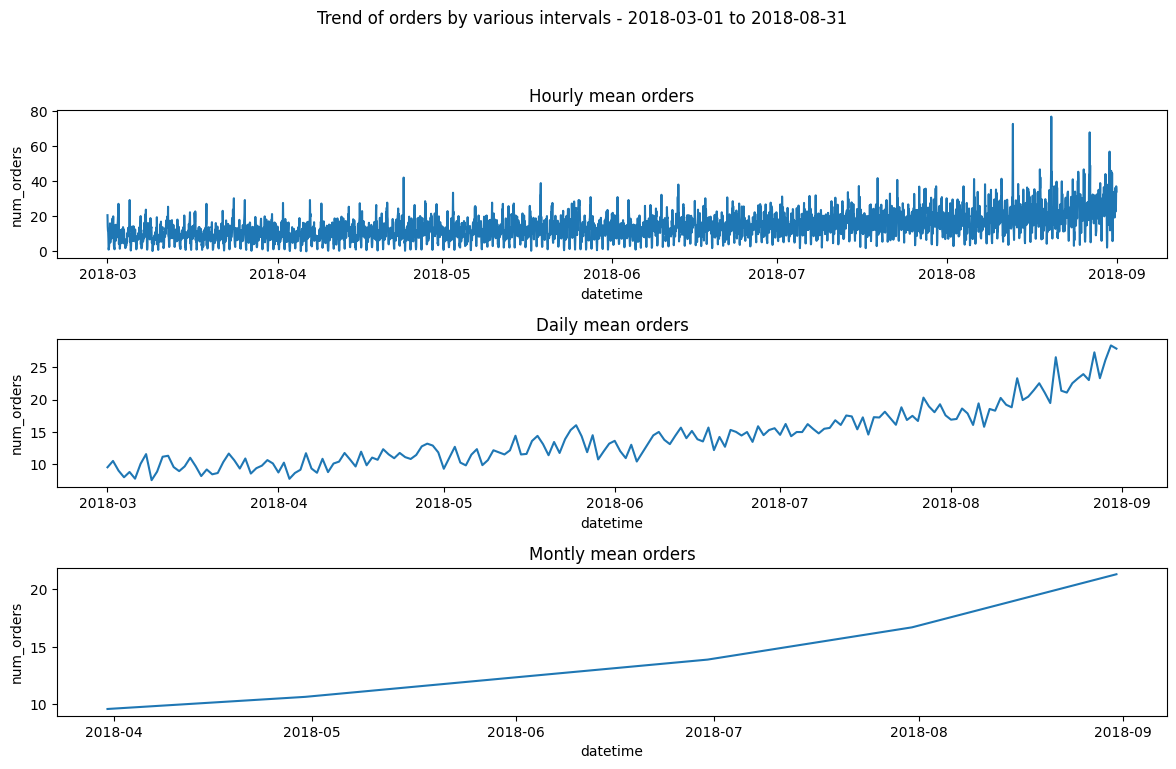

In [22]:
resample_df_list = [hourly_orders, daily_orders, monthly_orders]
titles = ['Hourly mean orders', 'Daily mean orders', 'Montly mean orders']
sup_title = 'Trend of orders by various intervals - 2018-03-01 to 2018-08-31'
plot_orders(resample_df_list, 'num_orders', r=4, c=1, titles=titles, sup_title=sup_title)

The overall trend reveals an upward trend in mean orders between 2018-03-01 and 2018-08-31.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Well done!</div>

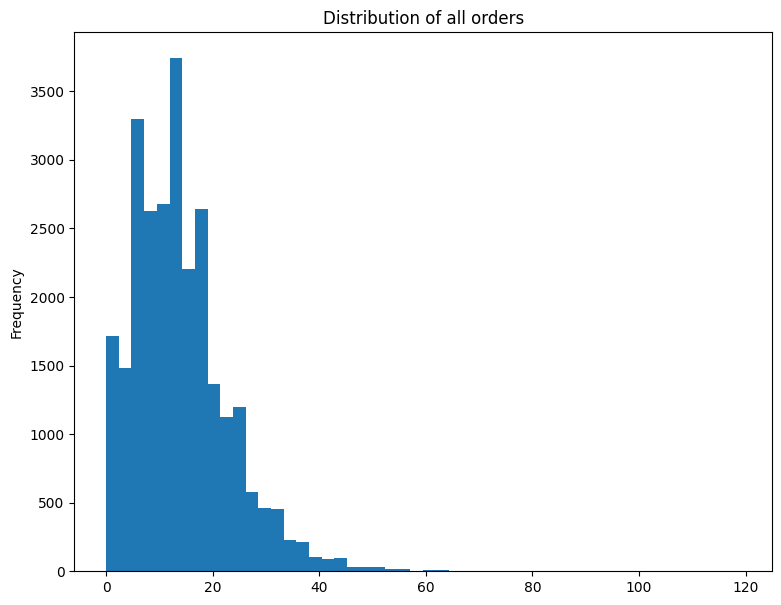

In [23]:
plt.subplots(figsize=(9, 7))
df['num_orders'].plot(kind='hist', bins=50, title='Distribution of all orders')
plt.show()

The histogram reveals a right-skewed distribution, which peaks at 9-12 orders.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! </div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Axes labels such as `Frequency` or `Count` may seem unclear to a reader. 
    
</div>

### Heatmap

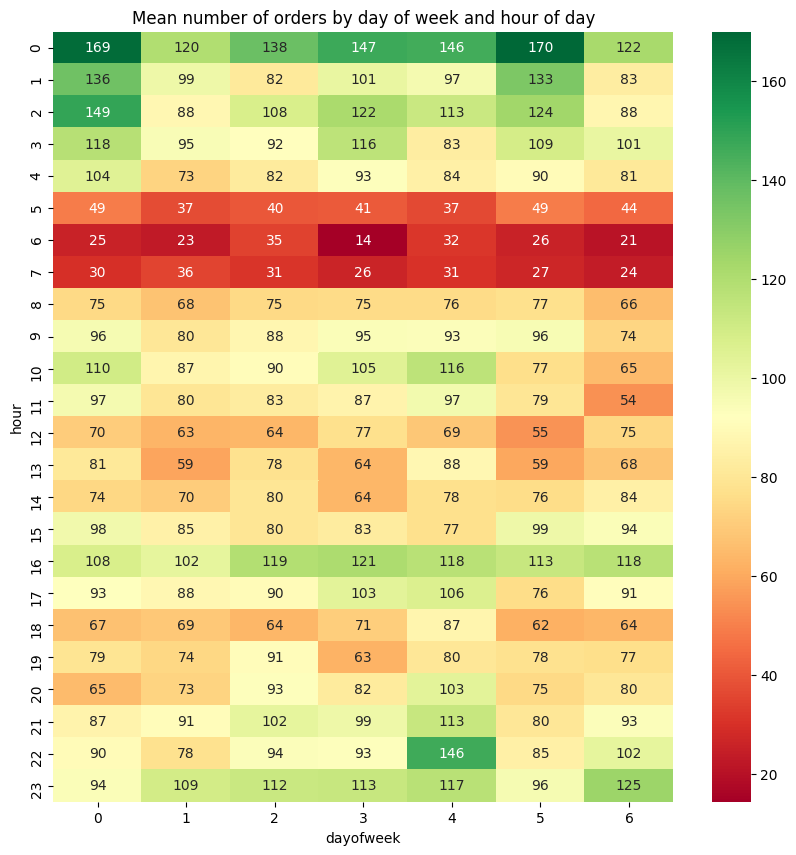

In [24]:
pivoted_df = df_hourly.pivot_table(index=['hour'], columns=['dayofweek'], values=['num_orders'], aggfunc='mean')
pivoted_df = pivoted_df.droplevel(0, axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(pivoted_df, annot=True, cmap="RdYlGn", fmt=".0f")
plt.title('Mean number of orders by day of week and hour of day')
plt.show()

Between 5AM -7 AM, the mean order of requests drops, and this pattern is observed throughout the week.

12AM sees a higher than average number of orders compared to any other hour during any given week.

Between 8AM - 8PM, the number of rides is around the mean of 15.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Nice visualization! </div>

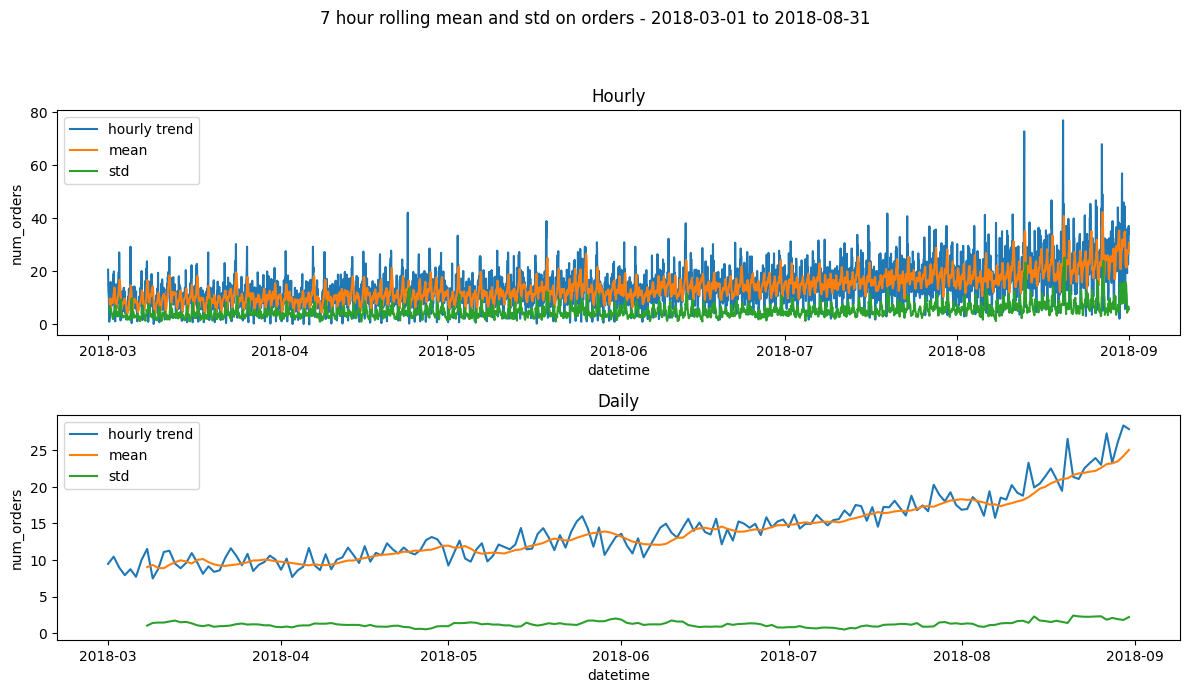

In [25]:
resample_df_list = [hourly_orders, daily_orders]
titles = ['Hourly', 'Daily']
window = 7
sup_title = f'{window} hour rolling mean and std on orders - 2018-03-01 to 2018-08-31'
plot_orders(resample_df_list, 'num_orders', r=3, c=1, is_mean_window=True, window=window, titles=titles, sup_title=sup_title)

The hourly data appears noisy, and the 7 hour mean, and std are noisy. However, in the daily orders, the std appears constant, and the mean is relatively smoother.

In [26]:
df_hourly = df_hourly.dropna()

In [27]:
df_hourly.shape

(4409, 15)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Very good job here! </div>

### Decompose the time series components

In [28]:
decomposed_num_orders = seasonal_decompose(df_hourly['num_orders'], model='additive')
decomposed_rolling_mean = seasonal_decompose(df_hourly['rolling_mean'], model='additive')
decomposed_rolling_std = seasonal_decompose(df_hourly['rolling_std'], model='additive')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
`seasonal_decompose` is a great method, well done! 
    
</div>

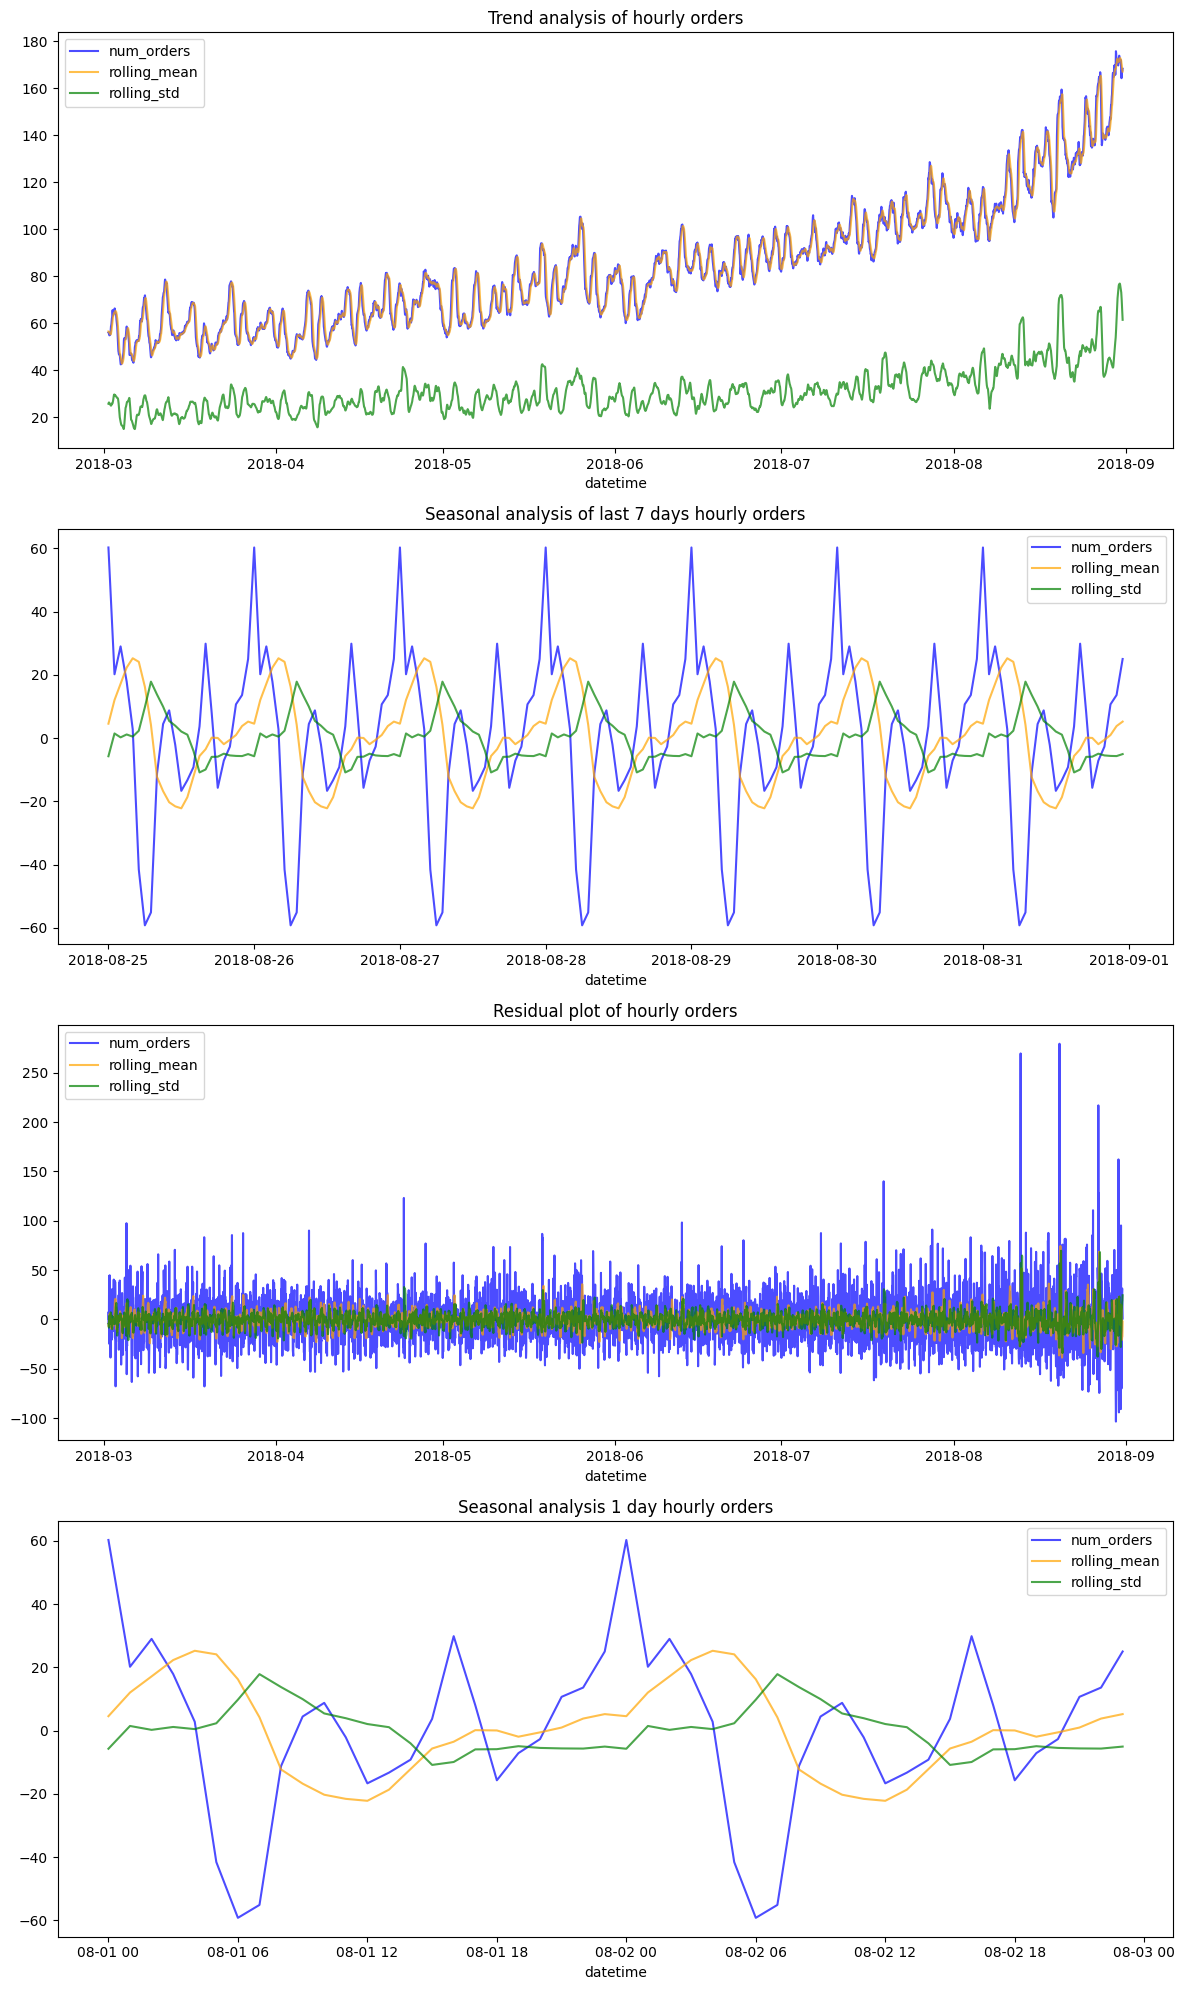

In [29]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 1, 1)
plt.plot(decomposed_num_orders.trend, label='num_orders', color='blue', alpha=0.7)
plt.plot(decomposed_rolling_mean.trend, label='rolling_mean', color='orange', alpha=0.7)
plt.plot(decomposed_rolling_std.trend, label='rolling_std', color='green', alpha=0.7)
plt.title('Trend analysis of hourly orders')
plt.xlabel('datetime')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposed_num_orders.seasonal.tail(24*7), label='num_orders', color='blue', alpha=0.7)
plt.plot(decomposed_rolling_mean.seasonal.tail(24*7), label='rolling_mean', color='orange', alpha=0.7)
plt.plot(decomposed_rolling_std.seasonal.tail(24*7), label='rolling_std', color='green', alpha=0.7)
plt.title('Seasonal analysis of last 7 days hourly orders')
plt.xlabel('datetime')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposed_num_orders.resid, label='num_orders', color='blue', alpha=0.7)
plt.plot(decomposed_rolling_mean.resid, label='rolling_mean', color='orange', alpha=0.7)
plt.plot(decomposed_rolling_std.resid, label='rolling_std', color='green', alpha=0.7)
plt.title('Residual plot of hourly orders')
plt.xlabel('datetime')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposed_num_orders.seasonal['2018-08-01': '2018-08-02'], label='num_orders', color='blue', alpha=0.7)
plt.plot(decomposed_rolling_mean.seasonal['2018-08-01': '2018-08-02'], label='rolling_mean', color='orange', alpha=0.7)
plt.plot(decomposed_rolling_std.seasonal['2018-08-01': '2018-08-02'], label='rolling_std', color='green', alpha=0.7)
plt.title('Seasonal analysis 1 day hourly orders')
plt.xlabel('datetime')
plt.legend()

plt.tight_layout()
plt.show()

The trend plot shows an upward trend.

The seasonal trend for last 7 days shows that there is a daily seasonal pattern in ridership.

The residuals shows that the residual mean is not 0, which indicates that there could be a bias in the predictions. The spikes in August clearly indicate that the company was peaking with respect to ridership frequency.

The seasonal analysis for 1 day shows that ridership frequency increases at midnight, drops to its lowest at 6AM, and then rises moderately around 5PM.

## Training

In [30]:
def rmse(y_true, y_pred):
    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [31]:
def build_model(model, x_train, y_train, x_test, y_test, hyperparameters={}, scoring=None, cv=5, model_str=None, cat_features=[], verbose=False):
    
    np.random.seed(42)
    best_rmse = 0
    start_time = time.time()
    
    gs = GridSearchCV(model, param_grid=hyperparameters, cv=cv, scoring=scoring)
    gs.fit(x_train, y_train)
    if model_str == 'catboost':
        gs.best_estimator_.fit(x_train, y_train, cat_features=cat_features, verbose=verbose)
    else:
        gs.best_estimator_.fit(x_train, y_train)
    end_time = time.time() - start_time
        
    preds = gs.best_estimator_.predict(x_test)
    best_rmse = rmse(y_test, preds)
    return gs.best_estimator_, best_rmse, np.round(end_time, 2)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Nice function! 
</div>


In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_hourly.drop(['num_orders'], axis=1), df_hourly['num_orders'], test_size=0.2,random_state=42, shuffle=False)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct. Working with time series, we should not shuffle the data. 

</div>


In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3527, 14), (882, 14), (3527,), (882,))

In [34]:
tscv = TimeSeriesSplit(n_splits=5)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct!
</div>


In [35]:
lr = LinearRegression()
best_lr_model, best_lr_rmse, best_lr_time = build_model(
                                                        lr, 
                                                        x_train, 
                                                        y_train, 
                                                        x_test, 
                                                        y_test,
                                                        hyperparameters={}, 
                                                        scoring=make_scorer(rmse), 
                                                        cv=tscv
                                                        )

In [36]:
rf = RandomForestRegressor(random_state=42)
best_rf_model, best_rf_rmse, best_rf_time = build_model(
                                                        rf, 
                                                        x_train, 
                                                        y_train, 
                                                        x_test, 
                                                        y_test,
                                                        hyperparameters={
                                                                        'n_estimators': range(100, 600, 100),
                                                                        'max_depth': range(5, 10)
                                                                        }, 
                                                        scoring=make_scorer(rmse), 
                                                        cv=tscv
                                                        )

In [37]:
# cat_features = ['month', 'hour', 'day', 'dayofweek']
cat_features = []
cat = CatBoostRegressor(learning_rate=0.1, loss_function='RMSE', random_seed=42)
best_cb_model, best_cb_rmse, best_cb_time = build_model(
                                                        cat, 
                                                        x_train.values, 
                                                        y_train.values, 
                                                        x_test.values, 
                                                        y_test.values,
                                                        hyperparameters={
                                                                        'iterations': range(100, 600, 100),
                                                                        'depth': range(5, 10)
                                                                        }, 
                                                        scoring=make_scorer(rmse), 
                                                        cv=tscv, 
                                                        model_str='catboost',
                                                        cat_features=cat_features
                                                        )

0:	learn: 28.1671839	total: 47.7ms	remaining: 4.72s
1:	learn: 26.8663699	total: 49.6ms	remaining: 2.43s
2:	learn: 26.2444481	total: 51.1ms	remaining: 1.65s
3:	learn: 25.0861485	total: 52.6ms	remaining: 1.26s
4:	learn: 24.3981393	total: 54.3ms	remaining: 1.03s
5:	learn: 23.7346980	total: 55.8ms	remaining: 875ms
6:	learn: 22.9945552	total: 57.4ms	remaining: 762ms
7:	learn: 22.3026165	total: 58.9ms	remaining: 677ms
8:	learn: 21.5301371	total: 60.5ms	remaining: 611ms
9:	learn: 20.8937836	total: 62.2ms	remaining: 560ms
10:	learn: 20.4174489	total: 63.7ms	remaining: 516ms
11:	learn: 19.9889727	total: 65.5ms	remaining: 480ms
12:	learn: 19.6914336	total: 67ms	remaining: 449ms
13:	learn: 19.3357131	total: 68.6ms	remaining: 421ms
14:	learn: 19.0968660	total: 70.2ms	remaining: 398ms
15:	learn: 18.8685419	total: 71.8ms	remaining: 377ms
16:	learn: 18.5908615	total: 73.4ms	remaining: 359ms
17:	learn: 18.3957632	total: 75.1ms	remaining: 342ms
18:	learn: 18.1719507	total: 76.8ms	remaining: 327ms
19:	l

0:	learn: 29.7679011	total: 2.37ms	remaining: 234ms
1:	learn: 28.5963858	total: 4.81ms	remaining: 236ms
2:	learn: 27.6265890	total: 6.89ms	remaining: 223ms
3:	learn: 26.7953348	total: 8.96ms	remaining: 215ms
4:	learn: 26.1519953	total: 11ms	remaining: 209ms
5:	learn: 25.4993697	total: 13.1ms	remaining: 205ms
6:	learn: 25.0020705	total: 15.2ms	remaining: 202ms
7:	learn: 24.6403819	total: 17.2ms	remaining: 198ms
8:	learn: 24.0430505	total: 19.3ms	remaining: 195ms
9:	learn: 23.7079522	total: 21.3ms	remaining: 191ms
10:	learn: 23.2778438	total: 23.4ms	remaining: 189ms
11:	learn: 23.0739884	total: 25.4ms	remaining: 186ms
12:	learn: 22.7631294	total: 27.4ms	remaining: 183ms
13:	learn: 22.4900208	total: 29.4ms	remaining: 180ms
14:	learn: 22.2383525	total: 31.5ms	remaining: 178ms
15:	learn: 21.9571636	total: 33.6ms	remaining: 176ms
16:	learn: 21.7423190	total: 35.6ms	remaining: 174ms
17:	learn: 21.5636205	total: 37.7ms	remaining: 172ms
18:	learn: 21.4213786	total: 39.8ms	remaining: 170ms
19:	l

0:	learn: 32.2472367	total: 2.67ms	remaining: 265ms
1:	learn: 31.0051023	total: 5.49ms	remaining: 269ms
2:	learn: 29.9164695	total: 7.97ms	remaining: 258ms
3:	learn: 28.9896359	total: 10.6ms	remaining: 256ms
4:	learn: 28.2809778	total: 13.1ms	remaining: 248ms
5:	learn: 27.5759861	total: 15.5ms	remaining: 243ms
6:	learn: 26.9267492	total: 18.1ms	remaining: 240ms
7:	learn: 26.4562142	total: 20.5ms	remaining: 236ms
8:	learn: 25.8871757	total: 23ms	remaining: 233ms
9:	learn: 25.5938646	total: 25.4ms	remaining: 229ms
10:	learn: 25.1007827	total: 27.9ms	remaining: 225ms
11:	learn: 24.8456594	total: 30.4ms	remaining: 223ms
12:	learn: 24.4413466	total: 32.8ms	remaining: 219ms
13:	learn: 24.2180307	total: 35.2ms	remaining: 216ms
14:	learn: 23.9466186	total: 37.5ms	remaining: 213ms
15:	learn: 23.7759121	total: 40ms	remaining: 210ms
16:	learn: 23.4666194	total: 42.5ms	remaining: 207ms
17:	learn: 23.2819739	total: 44.8ms	remaining: 204ms
18:	learn: 23.1489403	total: 47.2ms	remaining: 201ms
19:	lea

161:	learn: 9.8658787	total: 257ms	remaining: 60.3ms
162:	learn: 9.8318945	total: 259ms	remaining: 58.8ms
163:	learn: 9.8289240	total: 261ms	remaining: 57.2ms
164:	learn: 9.8064198	total: 262ms	remaining: 55.6ms
165:	learn: 9.7856145	total: 264ms	remaining: 54ms
166:	learn: 9.7771891	total: 265ms	remaining: 52.4ms
167:	learn: 9.7514899	total: 267ms	remaining: 50.8ms
168:	learn: 9.7308514	total: 269ms	remaining: 49.3ms
169:	learn: 9.7010010	total: 270ms	remaining: 47.7ms
170:	learn: 9.6674544	total: 272ms	remaining: 46.1ms
171:	learn: 9.6365780	total: 273ms	remaining: 44.5ms
172:	learn: 9.5909937	total: 275ms	remaining: 42.9ms
173:	learn: 9.5478939	total: 276ms	remaining: 41.3ms
174:	learn: 9.5451036	total: 278ms	remaining: 39.7ms
175:	learn: 9.5419994	total: 279ms	remaining: 38.1ms
176:	learn: 9.5182617	total: 281ms	remaining: 36.5ms
177:	learn: 9.4478394	total: 283ms	remaining: 34.9ms
178:	learn: 9.4268336	total: 284ms	remaining: 33.4ms
179:	learn: 9.4244672	total: 286ms	remaining: 31

125:	learn: 13.7891260	total: 229ms	remaining: 135ms
126:	learn: 13.7501679	total: 233ms	remaining: 134ms
127:	learn: 13.7063941	total: 235ms	remaining: 132ms
128:	learn: 13.6593306	total: 237ms	remaining: 131ms
129:	learn: 13.6236741	total: 239ms	remaining: 129ms
130:	learn: 13.5774712	total: 241ms	remaining: 127ms
131:	learn: 13.5536411	total: 243ms	remaining: 125ms
132:	learn: 13.5026089	total: 245ms	remaining: 124ms
133:	learn: 13.4602847	total: 247ms	remaining: 122ms
134:	learn: 13.4290913	total: 250ms	remaining: 120ms
135:	learn: 13.4122279	total: 252ms	remaining: 118ms
136:	learn: 13.4020880	total: 254ms	remaining: 117ms
137:	learn: 13.3739848	total: 256ms	remaining: 115ms
138:	learn: 13.3390741	total: 258ms	remaining: 113ms
139:	learn: 13.3232033	total: 260ms	remaining: 111ms
140:	learn: 13.2883709	total: 262ms	remaining: 110ms
141:	learn: 13.2608272	total: 264ms	remaining: 108ms
142:	learn: 13.2382732	total: 266ms	remaining: 106ms
143:	learn: 13.1850213	total: 268ms	remaining:

95:	learn: 16.7369446	total: 199ms	remaining: 215ms
96:	learn: 16.6925928	total: 201ms	remaining: 213ms
97:	learn: 16.6616242	total: 203ms	remaining: 211ms
98:	learn: 16.6320662	total: 205ms	remaining: 209ms
99:	learn: 16.5937930	total: 207ms	remaining: 207ms
100:	learn: 16.5461560	total: 209ms	remaining: 205ms
101:	learn: 16.5250102	total: 211ms	remaining: 203ms
102:	learn: 16.5192937	total: 213ms	remaining: 201ms
103:	learn: 16.4870992	total: 215ms	remaining: 199ms
104:	learn: 16.4302278	total: 217ms	remaining: 197ms
105:	learn: 16.4162945	total: 219ms	remaining: 194ms
106:	learn: 16.3800466	total: 221ms	remaining: 192ms
107:	learn: 16.3143472	total: 223ms	remaining: 190ms
108:	learn: 16.2818580	total: 225ms	remaining: 188ms
109:	learn: 16.2299532	total: 227ms	remaining: 186ms
110:	learn: 16.1941670	total: 229ms	remaining: 184ms
111:	learn: 16.1809174	total: 231ms	remaining: 182ms
112:	learn: 16.1685451	total: 233ms	remaining: 179ms
113:	learn: 16.1388547	total: 235ms	remaining: 177m

118:	learn: 17.0734751	total: 270ms	remaining: 184ms
119:	learn: 17.0629143	total: 273ms	remaining: 182ms
120:	learn: 17.0119145	total: 275ms	remaining: 180ms
121:	learn: 17.0036279	total: 278ms	remaining: 178ms
122:	learn: 16.9727736	total: 280ms	remaining: 175ms
123:	learn: 16.9346049	total: 282ms	remaining: 173ms
124:	learn: 16.8890799	total: 285ms	remaining: 171ms
125:	learn: 16.8773326	total: 287ms	remaining: 169ms
126:	learn: 16.8675271	total: 289ms	remaining: 166ms
127:	learn: 16.8296664	total: 291ms	remaining: 164ms
128:	learn: 16.7998654	total: 294ms	remaining: 162ms
129:	learn: 16.7795759	total: 296ms	remaining: 159ms
130:	learn: 16.7576380	total: 298ms	remaining: 157ms
131:	learn: 16.7287942	total: 300ms	remaining: 155ms
132:	learn: 16.6986628	total: 303ms	remaining: 152ms
133:	learn: 16.6590797	total: 305ms	remaining: 150ms
134:	learn: 16.6324672	total: 307ms	remaining: 148ms
135:	learn: 16.5995929	total: 310ms	remaining: 146ms
136:	learn: 16.5611499	total: 312ms	remaining:

80:	learn: 19.2380539	total: 199ms	remaining: 293ms
81:	learn: 19.1884926	total: 202ms	remaining: 290ms
82:	learn: 19.1510399	total: 204ms	remaining: 288ms
83:	learn: 19.1408481	total: 206ms	remaining: 285ms
84:	learn: 19.1202161	total: 209ms	remaining: 283ms
85:	learn: 19.1079305	total: 211ms	remaining: 280ms
86:	learn: 19.0809204	total: 214ms	remaining: 278ms
87:	learn: 19.0284222	total: 216ms	remaining: 275ms
88:	learn: 19.0098977	total: 219ms	remaining: 273ms
89:	learn: 18.9879935	total: 221ms	remaining: 270ms
90:	learn: 18.9527371	total: 223ms	remaining: 268ms
91:	learn: 18.9180307	total: 226ms	remaining: 265ms
92:	learn: 18.8774417	total: 228ms	remaining: 262ms
93:	learn: 18.8425718	total: 230ms	remaining: 260ms
94:	learn: 18.7926209	total: 233ms	remaining: 257ms
95:	learn: 18.7700661	total: 235ms	remaining: 255ms
96:	learn: 18.7484777	total: 238ms	remaining: 252ms
97:	learn: 18.7193395	total: 240ms	remaining: 250ms
98:	learn: 18.6923347	total: 242ms	remaining: 247ms
99:	learn: 1

121:	learn: 11.1919423	total: 199ms	remaining: 290ms
122:	learn: 11.1562471	total: 201ms	remaining: 289ms
123:	learn: 11.1444891	total: 202ms	remaining: 287ms
124:	learn: 11.0733222	total: 204ms	remaining: 286ms
125:	learn: 11.0199390	total: 206ms	remaining: 284ms
126:	learn: 10.9717105	total: 207ms	remaining: 282ms
127:	learn: 10.9352247	total: 209ms	remaining: 281ms
128:	learn: 10.9243722	total: 211ms	remaining: 279ms
129:	learn: 10.8982900	total: 212ms	remaining: 277ms
130:	learn: 10.8677510	total: 214ms	remaining: 276ms
131:	learn: 10.8160738	total: 215ms	remaining: 274ms
132:	learn: 10.7511366	total: 217ms	remaining: 272ms
133:	learn: 10.7189327	total: 218ms	remaining: 270ms
134:	learn: 10.6799382	total: 220ms	remaining: 269ms
135:	learn: 10.6651146	total: 221ms	remaining: 267ms
136:	learn: 10.6075410	total: 223ms	remaining: 265ms
137:	learn: 10.5431124	total: 225ms	remaining: 264ms
138:	learn: 10.5397649	total: 226ms	remaining: 262ms
139:	learn: 10.5191073	total: 228ms	remaining:

0:	learn: 28.5583242	total: 2.09ms	remaining: 626ms
1:	learn: 27.3289728	total: 4.41ms	remaining: 657ms
2:	learn: 26.2228730	total: 6.25ms	remaining: 619ms
3:	learn: 25.4228200	total: 8.07ms	remaining: 598ms
4:	learn: 24.6738013	total: 9.92ms	remaining: 585ms
5:	learn: 23.9600799	total: 11.7ms	remaining: 575ms
6:	learn: 23.5681635	total: 13.5ms	remaining: 567ms
7:	learn: 22.9180163	total: 15.3ms	remaining: 560ms
8:	learn: 22.5120417	total: 17.2ms	remaining: 556ms
9:	learn: 22.1583975	total: 18.9ms	remaining: 549ms
10:	learn: 21.8453776	total: 20.8ms	remaining: 547ms
11:	learn: 21.4531771	total: 22.6ms	remaining: 543ms
12:	learn: 21.2029599	total: 24.5ms	remaining: 540ms
13:	learn: 21.0132820	total: 26.3ms	remaining: 537ms
14:	learn: 20.7336262	total: 28.1ms	remaining: 534ms
15:	learn: 20.4632897	total: 29.9ms	remaining: 531ms
16:	learn: 20.2776734	total: 31.6ms	remaining: 527ms
17:	learn: 20.0888574	total: 33.5ms	remaining: 525ms
18:	learn: 19.9398563	total: 35.2ms	remaining: 521ms
19:

216:	learn: 11.2966467	total: 397ms	remaining: 152ms
217:	learn: 11.2760202	total: 399ms	remaining: 150ms
218:	learn: 11.2411285	total: 401ms	remaining: 148ms
219:	learn: 11.2012884	total: 403ms	remaining: 146ms
220:	learn: 11.1819245	total: 404ms	remaining: 144ms
221:	learn: 11.1541987	total: 406ms	remaining: 143ms
222:	learn: 11.1205503	total: 408ms	remaining: 141ms
223:	learn: 11.1188304	total: 409ms	remaining: 139ms
224:	learn: 11.0949491	total: 411ms	remaining: 137ms
225:	learn: 11.0728811	total: 413ms	remaining: 135ms
226:	learn: 11.0569703	total: 415ms	remaining: 133ms
227:	learn: 11.0326889	total: 417ms	remaining: 132ms
228:	learn: 11.0117208	total: 419ms	remaining: 130ms
229:	learn: 10.9498017	total: 421ms	remaining: 128ms
230:	learn: 10.9478532	total: 422ms	remaining: 126ms
231:	learn: 10.9243115	total: 424ms	remaining: 124ms
232:	learn: 10.9068908	total: 426ms	remaining: 122ms
233:	learn: 10.8903636	total: 428ms	remaining: 121ms
234:	learn: 10.8890430	total: 430ms	remaining:

93:	learn: 16.8214715	total: 198ms	remaining: 434ms
94:	learn: 16.7634925	total: 200ms	remaining: 433ms
95:	learn: 16.7369446	total: 203ms	remaining: 430ms
96:	learn: 16.6925928	total: 205ms	remaining: 428ms
97:	learn: 16.6616242	total: 207ms	remaining: 426ms
98:	learn: 16.6320662	total: 209ms	remaining: 424ms
99:	learn: 16.5937930	total: 211ms	remaining: 421ms
100:	learn: 16.5461560	total: 213ms	remaining: 419ms
101:	learn: 16.5250102	total: 215ms	remaining: 417ms
102:	learn: 16.5192937	total: 217ms	remaining: 414ms
103:	learn: 16.4870992	total: 219ms	remaining: 412ms
104:	learn: 16.4302278	total: 221ms	remaining: 410ms
105:	learn: 16.4162945	total: 223ms	remaining: 407ms
106:	learn: 16.3800466	total: 224ms	remaining: 405ms
107:	learn: 16.3143472	total: 227ms	remaining: 403ms
108:	learn: 16.2818580	total: 229ms	remaining: 400ms
109:	learn: 16.2299532	total: 231ms	remaining: 398ms
110:	learn: 16.1941670	total: 233ms	remaining: 396ms
111:	learn: 16.1809174	total: 235ms	remaining: 394ms


281:	learn: 12.0525265	total: 592ms	remaining: 37.8ms
282:	learn: 12.0462842	total: 594ms	remaining: 35.7ms
283:	learn: 12.0201081	total: 596ms	remaining: 33.6ms
284:	learn: 11.9961075	total: 598ms	remaining: 31.5ms
285:	learn: 11.9695736	total: 600ms	remaining: 29.4ms
286:	learn: 11.9569199	total: 602ms	remaining: 27.3ms
287:	learn: 11.9386300	total: 604ms	remaining: 25.2ms
288:	learn: 11.9036571	total: 606ms	remaining: 23.1ms
289:	learn: 11.8886090	total: 608ms	remaining: 21ms
290:	learn: 11.8866089	total: 610ms	remaining: 18.9ms
291:	learn: 11.8693026	total: 612ms	remaining: 16.8ms
292:	learn: 11.8583413	total: 614ms	remaining: 14.7ms
293:	learn: 11.8298077	total: 616ms	remaining: 12.6ms
294:	learn: 11.8021312	total: 618ms	remaining: 10.5ms
295:	learn: 11.7850772	total: 620ms	remaining: 8.38ms
296:	learn: 11.7685373	total: 622ms	remaining: 6.29ms
297:	learn: 11.7506090	total: 624ms	remaining: 4.19ms
298:	learn: 11.7374400	total: 626ms	remaining: 2.1ms
299:	learn: 11.7195033	total: 6

187:	learn: 15.0876854	total: 440ms	remaining: 262ms
188:	learn: 15.0773509	total: 442ms	remaining: 260ms
189:	learn: 15.0517543	total: 445ms	remaining: 257ms
190:	learn: 15.0394985	total: 447ms	remaining: 255ms
191:	learn: 15.0257621	total: 449ms	remaining: 252ms
192:	learn: 15.0149017	total: 451ms	remaining: 250ms
193:	learn: 15.0030444	total: 453ms	remaining: 248ms
194:	learn: 14.9666106	total: 456ms	remaining: 245ms
195:	learn: 14.9341185	total: 458ms	remaining: 243ms
196:	learn: 14.9299698	total: 460ms	remaining: 240ms
197:	learn: 14.9140241	total: 462ms	remaining: 238ms
198:	learn: 14.8903048	total: 465ms	remaining: 236ms
199:	learn: 14.8678778	total: 467ms	remaining: 234ms
200:	learn: 14.8518001	total: 469ms	remaining: 231ms
201:	learn: 14.8331293	total: 472ms	remaining: 229ms
202:	learn: 14.8306923	total: 474ms	remaining: 226ms
203:	learn: 14.8057947	total: 476ms	remaining: 224ms
204:	learn: 14.7667654	total: 478ms	remaining: 222ms
205:	learn: 14.7312317	total: 481ms	remaining:

84:	learn: 19.1202161	total: 210ms	remaining: 531ms
85:	learn: 19.1079305	total: 212ms	remaining: 528ms
86:	learn: 19.0809204	total: 215ms	remaining: 526ms
87:	learn: 19.0284222	total: 217ms	remaining: 523ms
88:	learn: 19.0098977	total: 220ms	remaining: 522ms
89:	learn: 18.9879935	total: 222ms	remaining: 519ms
90:	learn: 18.9527371	total: 225ms	remaining: 516ms
91:	learn: 18.9180307	total: 227ms	remaining: 514ms
92:	learn: 18.8774417	total: 230ms	remaining: 511ms
93:	learn: 18.8425718	total: 232ms	remaining: 509ms
94:	learn: 18.7926209	total: 235ms	remaining: 507ms
95:	learn: 18.7700661	total: 237ms	remaining: 504ms
96:	learn: 18.7484777	total: 240ms	remaining: 502ms
97:	learn: 18.7193395	total: 242ms	remaining: 499ms
98:	learn: 18.6923347	total: 245ms	remaining: 497ms
99:	learn: 18.6321926	total: 247ms	remaining: 494ms
100:	learn: 18.6188874	total: 249ms	remaining: 491ms
101:	learn: 18.5927337	total: 252ms	remaining: 489ms
102:	learn: 18.5595018	total: 254ms	remaining: 486ms
103:	lear

239:	learn: 15.5478880	total: 601ms	remaining: 150ms
240:	learn: 15.5443267	total: 604ms	remaining: 148ms
241:	learn: 15.5363905	total: 606ms	remaining: 145ms
242:	learn: 15.5203683	total: 609ms	remaining: 143ms
243:	learn: 15.5038213	total: 611ms	remaining: 140ms
244:	learn: 15.4877830	total: 613ms	remaining: 138ms
245:	learn: 15.4747371	total: 616ms	remaining: 135ms
246:	learn: 15.4605434	total: 618ms	remaining: 133ms
247:	learn: 15.4307890	total: 621ms	remaining: 130ms
248:	learn: 15.4102136	total: 623ms	remaining: 128ms
249:	learn: 15.3936889	total: 625ms	remaining: 125ms
250:	learn: 15.3787186	total: 628ms	remaining: 123ms
251:	learn: 15.3535083	total: 630ms	remaining: 120ms
252:	learn: 15.3394756	total: 633ms	remaining: 118ms
253:	learn: 15.3140186	total: 635ms	remaining: 115ms
254:	learn: 15.3081870	total: 637ms	remaining: 112ms
255:	learn: 15.2920499	total: 640ms	remaining: 110ms
256:	learn: 15.2836589	total: 646ms	remaining: 108ms
257:	learn: 15.2593884	total: 649ms	remaining:

122:	learn: 11.1562471	total: 197ms	remaining: 444ms
123:	learn: 11.1444891	total: 199ms	remaining: 443ms
124:	learn: 11.0733222	total: 201ms	remaining: 441ms
125:	learn: 11.0199390	total: 202ms	remaining: 440ms
126:	learn: 10.9717105	total: 204ms	remaining: 438ms
127:	learn: 10.9352247	total: 205ms	remaining: 437ms
128:	learn: 10.9243722	total: 207ms	remaining: 435ms
129:	learn: 10.8982900	total: 209ms	remaining: 433ms
130:	learn: 10.8677510	total: 210ms	remaining: 432ms
131:	learn: 10.8160738	total: 212ms	remaining: 430ms
132:	learn: 10.7511366	total: 213ms	remaining: 428ms
133:	learn: 10.7189327	total: 215ms	remaining: 427ms
134:	learn: 10.6799382	total: 217ms	remaining: 425ms
135:	learn: 10.6651146	total: 218ms	remaining: 424ms
136:	learn: 10.6075410	total: 220ms	remaining: 422ms
137:	learn: 10.5431124	total: 221ms	remaining: 420ms
138:	learn: 10.5397649	total: 223ms	remaining: 419ms
139:	learn: 10.5191073	total: 224ms	remaining: 417ms
140:	learn: 10.5069866	total: 226ms	remaining:

360:	learn: 5.1195466	total: 587ms	remaining: 63.5ms
361:	learn: 5.1041641	total: 590ms	remaining: 61.9ms
362:	learn: 5.0897503	total: 591ms	remaining: 60.3ms
363:	learn: 5.0776743	total: 593ms	remaining: 58.6ms
364:	learn: 5.0683148	total: 595ms	remaining: 57ms
365:	learn: 5.0461798	total: 596ms	remaining: 55.4ms
366:	learn: 5.0291013	total: 598ms	remaining: 53.8ms
367:	learn: 4.9921989	total: 599ms	remaining: 52.1ms
368:	learn: 4.9877705	total: 601ms	remaining: 50.5ms
369:	learn: 4.9627871	total: 602ms	remaining: 48.8ms
370:	learn: 4.9461776	total: 604ms	remaining: 47.2ms
371:	learn: 4.9371459	total: 606ms	remaining: 45.6ms
372:	learn: 4.9219245	total: 607ms	remaining: 44ms
373:	learn: 4.9138950	total: 609ms	remaining: 42.4ms
374:	learn: 4.8908570	total: 611ms	remaining: 40.7ms
375:	learn: 4.8806439	total: 612ms	remaining: 39.1ms
376:	learn: 4.8706889	total: 614ms	remaining: 37.5ms
377:	learn: 4.8446869	total: 615ms	remaining: 35.8ms
378:	learn: 4.8212313	total: 617ms	remaining: 34.2

219:	learn: 11.2012884	total: 418ms	remaining: 342ms
220:	learn: 11.1819245	total: 420ms	remaining: 340ms
221:	learn: 11.1541987	total: 422ms	remaining: 338ms
222:	learn: 11.1205503	total: 424ms	remaining: 336ms
223:	learn: 11.1188304	total: 425ms	remaining: 334ms
224:	learn: 11.0949491	total: 427ms	remaining: 332ms
225:	learn: 11.0728811	total: 429ms	remaining: 330ms
226:	learn: 11.0569703	total: 431ms	remaining: 328ms
227:	learn: 11.0326889	total: 432ms	remaining: 326ms
228:	learn: 11.0117208	total: 434ms	remaining: 324ms
229:	learn: 10.9498017	total: 436ms	remaining: 322ms
230:	learn: 10.9478532	total: 438ms	remaining: 320ms
231:	learn: 10.9243115	total: 440ms	remaining: 318ms
232:	learn: 10.9068908	total: 441ms	remaining: 316ms
233:	learn: 10.8903636	total: 443ms	remaining: 314ms
234:	learn: 10.8890430	total: 445ms	remaining: 312ms
235:	learn: 10.8667169	total: 447ms	remaining: 310ms
236:	learn: 10.8410057	total: 448ms	remaining: 308ms
237:	learn: 10.8152449	total: 450ms	remaining:

0:	learn: 29.7679011	total: 2.3ms	remaining: 919ms
1:	learn: 28.5963858	total: 4.75ms	remaining: 946ms
2:	learn: 27.6265890	total: 6.93ms	remaining: 917ms
3:	learn: 26.7953348	total: 8.96ms	remaining: 887ms
4:	learn: 26.1519953	total: 11.1ms	remaining: 875ms
5:	learn: 25.4993697	total: 13.1ms	remaining: 861ms
6:	learn: 25.0020705	total: 15.2ms	remaining: 854ms
7:	learn: 24.6403819	total: 17.2ms	remaining: 845ms
8:	learn: 24.0430505	total: 19.4ms	remaining: 842ms
9:	learn: 23.7079522	total: 21.5ms	remaining: 839ms
10:	learn: 23.2778438	total: 23.6ms	remaining: 836ms
11:	learn: 23.0739884	total: 25.6ms	remaining: 829ms
12:	learn: 22.7631294	total: 27.7ms	remaining: 823ms
13:	learn: 22.4900208	total: 29.6ms	remaining: 817ms
14:	learn: 22.2383525	total: 31.8ms	remaining: 817ms
15:	learn: 21.9571636	total: 34ms	remaining: 816ms
16:	learn: 21.7423190	total: 36ms	remaining: 812ms
17:	learn: 21.5636205	total: 38.2ms	remaining: 810ms
18:	learn: 21.4213786	total: 40.6ms	remaining: 813ms
19:	lear

192:	learn: 13.9384129	total: 397ms	remaining: 426ms
193:	learn: 13.9293419	total: 399ms	remaining: 424ms
194:	learn: 13.8956723	total: 401ms	remaining: 422ms
195:	learn: 13.8676971	total: 403ms	remaining: 420ms
196:	learn: 13.8322631	total: 409ms	remaining: 422ms
197:	learn: 13.8147342	total: 411ms	remaining: 420ms
198:	learn: 13.7881959	total: 413ms	remaining: 418ms
199:	learn: 13.7866765	total: 415ms	remaining: 415ms
200:	learn: 13.7412255	total: 417ms	remaining: 413ms
201:	learn: 13.7046614	total: 419ms	remaining: 411ms
202:	learn: 13.6941967	total: 421ms	remaining: 409ms
203:	learn: 13.6771298	total: 423ms	remaining: 407ms
204:	learn: 13.6528168	total: 425ms	remaining: 405ms
205:	learn: 13.6197903	total: 427ms	remaining: 403ms
206:	learn: 13.5968627	total: 430ms	remaining: 401ms
207:	learn: 13.5807004	total: 432ms	remaining: 399ms
208:	learn: 13.5588221	total: 434ms	remaining: 397ms
209:	learn: 13.5125040	total: 437ms	remaining: 395ms
210:	learn: 13.4933877	total: 439ms	remaining:

383:	learn: 10.4115122	total: 791ms	remaining: 32.9ms
384:	learn: 10.4057703	total: 793ms	remaining: 30.9ms
385:	learn: 10.4053216	total: 795ms	remaining: 28.8ms
386:	learn: 10.3960202	total: 797ms	remaining: 26.8ms
387:	learn: 10.3880763	total: 799ms	remaining: 24.7ms
388:	learn: 10.3641268	total: 801ms	remaining: 22.7ms
389:	learn: 10.3482674	total: 803ms	remaining: 20.6ms
390:	learn: 10.3306927	total: 805ms	remaining: 18.5ms
391:	learn: 10.3155372	total: 807ms	remaining: 16.5ms
392:	learn: 10.3039931	total: 809ms	remaining: 14.4ms
393:	learn: 10.2893025	total: 811ms	remaining: 12.4ms
394:	learn: 10.2759572	total: 813ms	remaining: 10.3ms
395:	learn: 10.2655804	total: 816ms	remaining: 8.24ms
396:	learn: 10.2471934	total: 818ms	remaining: 6.18ms
397:	learn: 10.2321135	total: 820ms	remaining: 4.12ms
398:	learn: 10.2082586	total: 823ms	remaining: 2.06ms
399:	learn: 10.2037860	total: 825ms	remaining: 0us
0:	learn: 31.4007623	total: 2.5ms	remaining: 996ms
1:	learn: 30.1875936	total: 4.84ms

188:	learn: 15.0773509	total: 438ms	remaining: 489ms
189:	learn: 15.0517543	total: 441ms	remaining: 487ms
190:	learn: 15.0394985	total: 443ms	remaining: 485ms
191:	learn: 15.0257621	total: 445ms	remaining: 482ms
192:	learn: 15.0149017	total: 447ms	remaining: 480ms
193:	learn: 15.0030444	total: 450ms	remaining: 477ms
194:	learn: 14.9666106	total: 452ms	remaining: 475ms
195:	learn: 14.9341185	total: 454ms	remaining: 473ms
196:	learn: 14.9299698	total: 457ms	remaining: 470ms
197:	learn: 14.9140241	total: 459ms	remaining: 468ms
198:	learn: 14.8903048	total: 462ms	remaining: 466ms
199:	learn: 14.8678778	total: 464ms	remaining: 464ms
200:	learn: 14.8518001	total: 466ms	remaining: 461ms
201:	learn: 14.8331293	total: 468ms	remaining: 459ms
202:	learn: 14.8306923	total: 470ms	remaining: 456ms
203:	learn: 14.8057947	total: 473ms	remaining: 454ms
204:	learn: 14.7667654	total: 475ms	remaining: 452ms
205:	learn: 14.7312317	total: 477ms	remaining: 449ms
206:	learn: 14.7179922	total: 479ms	remaining:

363:	learn: 12.2217953	total: 830ms	remaining: 82.1ms
364:	learn: 12.2020213	total: 832ms	remaining: 79.8ms
365:	learn: 12.1865837	total: 834ms	remaining: 77.5ms
366:	learn: 12.1668914	total: 837ms	remaining: 75.2ms
367:	learn: 12.1485063	total: 839ms	remaining: 72.9ms
368:	learn: 12.1269619	total: 841ms	remaining: 70.7ms
369:	learn: 12.1081630	total: 844ms	remaining: 68.4ms
370:	learn: 12.0947281	total: 846ms	remaining: 66.1ms
371:	learn: 12.0811320	total: 848ms	remaining: 63.9ms
372:	learn: 12.0730427	total: 851ms	remaining: 61.6ms
373:	learn: 12.0625943	total: 853ms	remaining: 59.3ms
374:	learn: 12.0438057	total: 855ms	remaining: 57ms
375:	learn: 12.0323803	total: 857ms	remaining: 54.7ms
376:	learn: 12.0099954	total: 860ms	remaining: 52.4ms
377:	learn: 12.0038465	total: 862ms	remaining: 50.2ms
378:	learn: 11.9995033	total: 864ms	remaining: 47.9ms
379:	learn: 11.9896610	total: 866ms	remaining: 45.6ms
380:	learn: 11.9793111	total: 868ms	remaining: 43.3ms
381:	learn: 11.9765674	total: 

160:	learn: 17.1657393	total: 396ms	remaining: 588ms
161:	learn: 17.1503534	total: 399ms	remaining: 586ms
162:	learn: 17.1344315	total: 402ms	remaining: 584ms
163:	learn: 17.1031065	total: 404ms	remaining: 582ms
164:	learn: 17.0774408	total: 407ms	remaining: 579ms
165:	learn: 17.0443439	total: 409ms	remaining: 576ms
166:	learn: 17.0350051	total: 411ms	remaining: 574ms
167:	learn: 17.0005086	total: 414ms	remaining: 571ms
168:	learn: 16.9693757	total: 416ms	remaining: 569ms
169:	learn: 16.9474602	total: 418ms	remaining: 566ms
170:	learn: 16.9370989	total: 421ms	remaining: 563ms
171:	learn: 16.9159969	total: 423ms	remaining: 561ms
172:	learn: 16.8881496	total: 426ms	remaining: 558ms
173:	learn: 16.8678007	total: 428ms	remaining: 556ms
174:	learn: 16.8516023	total: 430ms	remaining: 553ms
175:	learn: 16.8353318	total: 433ms	remaining: 551ms
176:	learn: 16.8105638	total: 435ms	remaining: 548ms
177:	learn: 16.7810566	total: 438ms	remaining: 546ms
178:	learn: 16.7597171	total: 440ms	remaining:

318:	learn: 14.4590910	total: 788ms	remaining: 200ms
319:	learn: 14.4571393	total: 790ms	remaining: 198ms
320:	learn: 14.4433761	total: 793ms	remaining: 195ms
321:	learn: 14.4284007	total: 795ms	remaining: 193ms
322:	learn: 14.4236147	total: 798ms	remaining: 190ms
323:	learn: 14.4056797	total: 800ms	remaining: 188ms
324:	learn: 14.3940129	total: 803ms	remaining: 185ms
325:	learn: 14.3865734	total: 805ms	remaining: 183ms
326:	learn: 14.3780028	total: 807ms	remaining: 180ms
327:	learn: 14.3580590	total: 810ms	remaining: 178ms
328:	learn: 14.3538675	total: 812ms	remaining: 175ms
329:	learn: 14.3523480	total: 815ms	remaining: 173ms
330:	learn: 14.3383386	total: 817ms	remaining: 170ms
331:	learn: 14.3244806	total: 819ms	remaining: 168ms
332:	learn: 14.3189355	total: 822ms	remaining: 165ms
333:	learn: 14.3044624	total: 824ms	remaining: 163ms
334:	learn: 14.2898052	total: 827ms	remaining: 160ms
335:	learn: 14.2807540	total: 829ms	remaining: 158ms
336:	learn: 14.2635088	total: 832ms	remaining:

171:	learn: 9.6365780	total: 283ms	remaining: 539ms
172:	learn: 9.5909937	total: 284ms	remaining: 538ms
173:	learn: 9.5478939	total: 286ms	remaining: 536ms
174:	learn: 9.5451036	total: 287ms	remaining: 534ms
175:	learn: 9.5419994	total: 289ms	remaining: 532ms
176:	learn: 9.5182617	total: 291ms	remaining: 530ms
177:	learn: 9.4478394	total: 292ms	remaining: 528ms
178:	learn: 9.4268336	total: 294ms	remaining: 527ms
179:	learn: 9.4244672	total: 295ms	remaining: 525ms
180:	learn: 9.3799927	total: 297ms	remaining: 523ms
181:	learn: 9.3485321	total: 298ms	remaining: 521ms
182:	learn: 9.3072878	total: 300ms	remaining: 519ms
183:	learn: 9.2800761	total: 301ms	remaining: 518ms
184:	learn: 9.2172251	total: 303ms	remaining: 516ms
185:	learn: 9.1982259	total: 304ms	remaining: 514ms
186:	learn: 9.1604158	total: 306ms	remaining: 512ms
187:	learn: 9.1170405	total: 308ms	remaining: 510ms
188:	learn: 9.0885228	total: 309ms	remaining: 509ms
189:	learn: 9.0225486	total: 311ms	remaining: 507ms
190:	learn: 

410:	learn: 4.3142491	total: 672ms	remaining: 146ms
411:	learn: 4.3025050	total: 674ms	remaining: 144ms
412:	learn: 4.2947457	total: 676ms	remaining: 142ms
413:	learn: 4.2780942	total: 677ms	remaining: 141ms
414:	learn: 4.2580660	total: 679ms	remaining: 139ms
415:	learn: 4.2504130	total: 680ms	remaining: 137ms
416:	learn: 4.2380323	total: 682ms	remaining: 136ms
417:	learn: 4.2330706	total: 684ms	remaining: 134ms
418:	learn: 4.2290184	total: 685ms	remaining: 132ms
419:	learn: 4.2138112	total: 687ms	remaining: 131ms
420:	learn: 4.2055376	total: 688ms	remaining: 129ms
421:	learn: 4.1850709	total: 690ms	remaining: 128ms
422:	learn: 4.1715464	total: 692ms	remaining: 126ms
423:	learn: 4.1522196	total: 694ms	remaining: 124ms
424:	learn: 4.1374096	total: 695ms	remaining: 123ms
425:	learn: 4.1252506	total: 697ms	remaining: 121ms
426:	learn: 4.1000171	total: 698ms	remaining: 119ms
427:	learn: 4.0871859	total: 700ms	remaining: 118ms
428:	learn: 4.0748805	total: 702ms	remaining: 116ms
429:	learn: 

108:	learn: 14.4028858	total: 198ms	remaining: 710ms
109:	learn: 14.3674462	total: 200ms	remaining: 710ms
110:	learn: 14.3221139	total: 202ms	remaining: 708ms
111:	learn: 14.2952827	total: 204ms	remaining: 706ms
112:	learn: 14.2215453	total: 206ms	remaining: 704ms
113:	learn: 14.1954717	total: 207ms	remaining: 702ms
114:	learn: 14.1284312	total: 209ms	remaining: 701ms
115:	learn: 14.0992541	total: 211ms	remaining: 699ms
116:	learn: 14.0800829	total: 213ms	remaining: 697ms
117:	learn: 14.0515901	total: 215ms	remaining: 695ms
118:	learn: 14.0298567	total: 217ms	remaining: 693ms
119:	learn: 14.0176087	total: 218ms	remaining: 692ms
120:	learn: 13.9687171	total: 220ms	remaining: 690ms
121:	learn: 13.9359051	total: 222ms	remaining: 688ms
122:	learn: 13.8925609	total: 224ms	remaining: 686ms
123:	learn: 13.8753891	total: 225ms	remaining: 684ms
124:	learn: 13.8175996	total: 227ms	remaining: 682ms
125:	learn: 13.7891260	total: 229ms	remaining: 680ms
126:	learn: 13.7501679	total: 231ms	remaining:

316:	learn: 9.2196026	total: 588ms	remaining: 340ms
317:	learn: 9.1986395	total: 591ms	remaining: 338ms
318:	learn: 9.1700335	total: 592ms	remaining: 336ms
319:	learn: 9.1452889	total: 594ms	remaining: 334ms
320:	learn: 9.1321708	total: 596ms	remaining: 332ms
321:	learn: 9.1073432	total: 598ms	remaining: 331ms
322:	learn: 9.0959500	total: 600ms	remaining: 329ms
323:	learn: 9.0697692	total: 602ms	remaining: 327ms
324:	learn: 9.0383078	total: 604ms	remaining: 325ms
325:	learn: 9.0257711	total: 605ms	remaining: 323ms
326:	learn: 9.0062639	total: 607ms	remaining: 321ms
327:	learn: 8.9777697	total: 609ms	remaining: 319ms
328:	learn: 8.9733416	total: 611ms	remaining: 317ms
329:	learn: 8.9724565	total: 612ms	remaining: 316ms
330:	learn: 8.9657723	total: 614ms	remaining: 314ms
331:	learn: 8.9372433	total: 616ms	remaining: 312ms
332:	learn: 8.9232266	total: 618ms	remaining: 310ms
333:	learn: 8.8971571	total: 620ms	remaining: 308ms
334:	learn: 8.8632593	total: 621ms	remaining: 306ms
335:	learn: 

0:	learn: 29.7679011	total: 2.29ms	remaining: 1.14s
1:	learn: 28.5963858	total: 4.78ms	remaining: 1.19s
2:	learn: 27.6265890	total: 7.09ms	remaining: 1.17s
3:	learn: 26.7953348	total: 9.1ms	remaining: 1.13s
4:	learn: 26.1519953	total: 11.2ms	remaining: 1.11s
5:	learn: 25.4993697	total: 13.3ms	remaining: 1.1s
6:	learn: 25.0020705	total: 15.4ms	remaining: 1.08s
7:	learn: 24.6403819	total: 17.5ms	remaining: 1.07s
8:	learn: 24.0430505	total: 19.6ms	remaining: 1.07s
9:	learn: 23.7079522	total: 21.6ms	remaining: 1.06s
10:	learn: 23.2778438	total: 23.7ms	remaining: 1.05s
11:	learn: 23.0739884	total: 25.7ms	remaining: 1.04s
12:	learn: 22.7631294	total: 27.8ms	remaining: 1.04s
13:	learn: 22.4900208	total: 29.9ms	remaining: 1.04s
14:	learn: 22.2383525	total: 32ms	remaining: 1.03s
15:	learn: 21.9571636	total: 34.2ms	remaining: 1.03s
16:	learn: 21.7423190	total: 36.3ms	remaining: 1.03s
17:	learn: 21.5636205	total: 38.7ms	remaining: 1.04s
18:	learn: 21.4213786	total: 41ms	remaining: 1.04s
19:	learn

187:	learn: 14.0854883	total: 394ms	remaining: 654ms
188:	learn: 14.0528306	total: 397ms	remaining: 653ms
189:	learn: 14.0316166	total: 399ms	remaining: 651ms
190:	learn: 14.0261803	total: 405ms	remaining: 656ms
191:	learn: 13.9693263	total: 407ms	remaining: 653ms
192:	learn: 13.9384129	total: 410ms	remaining: 651ms
193:	learn: 13.9293419	total: 412ms	remaining: 649ms
194:	learn: 13.8956723	total: 414ms	remaining: 647ms
195:	learn: 13.8676971	total: 416ms	remaining: 645ms
196:	learn: 13.8322631	total: 418ms	remaining: 643ms
197:	learn: 13.8147342	total: 420ms	remaining: 640ms
198:	learn: 13.7881959	total: 422ms	remaining: 638ms
199:	learn: 13.7866765	total: 424ms	remaining: 636ms
200:	learn: 13.7412255	total: 426ms	remaining: 634ms
201:	learn: 13.7046614	total: 428ms	remaining: 632ms
202:	learn: 13.6941967	total: 430ms	remaining: 629ms
203:	learn: 13.6771298	total: 432ms	remaining: 627ms
204:	learn: 13.6528168	total: 434ms	remaining: 625ms
205:	learn: 13.6197903	total: 436ms	remaining:

369:	learn: 10.5556790	total: 784ms	remaining: 276ms
370:	learn: 10.5419889	total: 791ms	remaining: 275ms
371:	learn: 10.5356237	total: 793ms	remaining: 273ms
372:	learn: 10.5302694	total: 795ms	remaining: 271ms
373:	learn: 10.5281490	total: 797ms	remaining: 268ms
374:	learn: 10.5176557	total: 799ms	remaining: 266ms
375:	learn: 10.5027416	total: 801ms	remaining: 264ms
376:	learn: 10.4946027	total: 804ms	remaining: 262ms
377:	learn: 10.4920806	total: 806ms	remaining: 260ms
378:	learn: 10.4863352	total: 808ms	remaining: 258ms
379:	learn: 10.4857886	total: 810ms	remaining: 256ms
380:	learn: 10.4751813	total: 812ms	remaining: 254ms
381:	learn: 10.4595407	total: 814ms	remaining: 252ms
382:	learn: 10.4346602	total: 816ms	remaining: 249ms
383:	learn: 10.4115122	total: 818ms	remaining: 247ms
384:	learn: 10.4057703	total: 820ms	remaining: 245ms
385:	learn: 10.4053216	total: 822ms	remaining: 243ms
386:	learn: 10.3960202	total: 825ms	remaining: 241ms
387:	learn: 10.3880763	total: 827ms	remaining:

79:	learn: 18.4892117	total: 201ms	remaining: 1.06s
80:	learn: 18.4488750	total: 204ms	remaining: 1.05s
81:	learn: 18.4062721	total: 206ms	remaining: 1.05s
82:	learn: 18.3842858	total: 209ms	remaining: 1.05s
83:	learn: 18.3078619	total: 211ms	remaining: 1.04s
84:	learn: 18.2649236	total: 213ms	remaining: 1.04s
85:	learn: 18.2190035	total: 215ms	remaining: 1.04s
86:	learn: 18.1675862	total: 218ms	remaining: 1.03s
87:	learn: 18.1239231	total: 220ms	remaining: 1.03s
88:	learn: 18.0385937	total: 222ms	remaining: 1.03s
89:	learn: 18.0030314	total: 225ms	remaining: 1.02s
90:	learn: 17.9784948	total: 227ms	remaining: 1.02s
91:	learn: 17.9305394	total: 229ms	remaining: 1.02s
92:	learn: 17.8898619	total: 232ms	remaining: 1.01s
93:	learn: 17.8629839	total: 234ms	remaining: 1.01s
94:	learn: 17.8095571	total: 236ms	remaining: 1.01s
95:	learn: 17.7745735	total: 238ms	remaining: 1s
96:	learn: 17.7603604	total: 240ms	remaining: 999ms
97:	learn: 17.7378223	total: 242ms	remaining: 995ms
98:	learn: 17.6

249:	learn: 13.8645080	total: 594ms	remaining: 594ms
250:	learn: 13.8455359	total: 597ms	remaining: 592ms
251:	learn: 13.8225096	total: 599ms	remaining: 590ms
252:	learn: 13.8013234	total: 602ms	remaining: 588ms
253:	learn: 13.7835244	total: 604ms	remaining: 585ms
254:	learn: 13.7595063	total: 607ms	remaining: 583ms
255:	learn: 13.7354105	total: 609ms	remaining: 581ms
256:	learn: 13.7023703	total: 611ms	remaining: 578ms
257:	learn: 13.6853502	total: 614ms	remaining: 576ms
258:	learn: 13.6781974	total: 616ms	remaining: 573ms
259:	learn: 13.6762285	total: 618ms	remaining: 571ms
260:	learn: 13.6603158	total: 621ms	remaining: 568ms
261:	learn: 13.6592663	total: 623ms	remaining: 566ms
262:	learn: 13.6404410	total: 625ms	remaining: 563ms
263:	learn: 13.6110184	total: 627ms	remaining: 561ms
264:	learn: 13.5966303	total: 629ms	remaining: 558ms
265:	learn: 13.5861492	total: 632ms	remaining: 556ms
266:	learn: 13.5670694	total: 634ms	remaining: 553ms
267:	learn: 13.5545729	total: 636ms	remaining:

420:	learn: 11.4781448	total: 989ms	remaining: 186ms
421:	learn: 11.4666172	total: 992ms	remaining: 183ms
422:	learn: 11.4565122	total: 994ms	remaining: 181ms
423:	learn: 11.4482515	total: 996ms	remaining: 179ms
424:	learn: 11.4405188	total: 999ms	remaining: 176ms
425:	learn: 11.4166444	total: 1s	remaining: 174ms
426:	learn: 11.4052956	total: 1s	remaining: 172ms
427:	learn: 11.3829765	total: 1s	remaining: 169ms
428:	learn: 11.3683188	total: 1.01s	remaining: 167ms
429:	learn: 11.3543122	total: 1.01s	remaining: 164ms
430:	learn: 11.3495700	total: 1.01s	remaining: 162ms
431:	learn: 11.3360995	total: 1.01s	remaining: 160ms
432:	learn: 11.3236103	total: 1.02s	remaining: 157ms
433:	learn: 11.3106015	total: 1.02s	remaining: 155ms
434:	learn: 11.3030860	total: 1.02s	remaining: 153ms
435:	learn: 11.3021394	total: 1.02s	remaining: 150ms
436:	learn: 11.2830910	total: 1.02s	remaining: 148ms
437:	learn: 11.2600651	total: 1.03s	remaining: 145ms
438:	learn: 11.2537326	total: 1.03s	remaining: 143ms
43

80:	learn: 19.2380539	total: 199ms	remaining: 1.03s
81:	learn: 19.1884926	total: 202ms	remaining: 1.03s
82:	learn: 19.1510399	total: 204ms	remaining: 1.02s
83:	learn: 19.1408481	total: 206ms	remaining: 1.02s
84:	learn: 19.1202161	total: 209ms	remaining: 1.02s
85:	learn: 19.1079305	total: 211ms	remaining: 1.01s
86:	learn: 19.0809204	total: 213ms	remaining: 1.01s
87:	learn: 19.0284222	total: 216ms	remaining: 1.01s
88:	learn: 19.0098977	total: 218ms	remaining: 1.01s
89:	learn: 18.9879935	total: 220ms	remaining: 1s
90:	learn: 18.9527371	total: 223ms	remaining: 1s
91:	learn: 18.9180307	total: 225ms	remaining: 998ms
92:	learn: 18.8774417	total: 227ms	remaining: 995ms
93:	learn: 18.8425718	total: 230ms	remaining: 993ms
94:	learn: 18.7926209	total: 232ms	remaining: 990ms
95:	learn: 18.7700661	total: 235ms	remaining: 987ms
96:	learn: 18.7484777	total: 237ms	remaining: 985ms
97:	learn: 18.7193395	total: 239ms	remaining: 981ms
98:	learn: 18.6923347	total: 242ms	remaining: 979ms
99:	learn: 18.6321

242:	learn: 15.5203683	total: 594ms	remaining: 628ms
243:	learn: 15.5038213	total: 596ms	remaining: 626ms
244:	learn: 15.4877830	total: 599ms	remaining: 623ms
245:	learn: 15.4747371	total: 601ms	remaining: 621ms
246:	learn: 15.4605434	total: 603ms	remaining: 618ms
247:	learn: 15.4307890	total: 606ms	remaining: 616ms
248:	learn: 15.4102136	total: 608ms	remaining: 613ms
249:	learn: 15.3936889	total: 610ms	remaining: 610ms
250:	learn: 15.3787186	total: 613ms	remaining: 608ms
251:	learn: 15.3535083	total: 615ms	remaining: 605ms
252:	learn: 15.3394756	total: 617ms	remaining: 603ms
253:	learn: 15.3140186	total: 620ms	remaining: 600ms
254:	learn: 15.3081870	total: 622ms	remaining: 598ms
255:	learn: 15.2920499	total: 624ms	remaining: 595ms
256:	learn: 15.2836589	total: 627ms	remaining: 593ms
257:	learn: 15.2593884	total: 629ms	remaining: 590ms
258:	learn: 15.2461621	total: 632ms	remaining: 588ms
259:	learn: 15.2291837	total: 634ms	remaining: 585ms
260:	learn: 15.2051216	total: 636ms	remaining:

402:	learn: 13.3756675	total: 988ms	remaining: 238ms
403:	learn: 13.3625646	total: 991ms	remaining: 235ms
404:	learn: 13.3486392	total: 993ms	remaining: 233ms
405:	learn: 13.3280496	total: 996ms	remaining: 230ms
406:	learn: 13.3115523	total: 998ms	remaining: 228ms
407:	learn: 13.2979275	total: 1s	remaining: 226ms
408:	learn: 13.2839170	total: 1s	remaining: 223ms
409:	learn: 13.2632159	total: 1s	remaining: 221ms
410:	learn: 13.2466465	total: 1.01s	remaining: 218ms
411:	learn: 13.2361107	total: 1.01s	remaining: 216ms
412:	learn: 13.2276584	total: 1.01s	remaining: 213ms
413:	learn: 13.2164859	total: 1.01s	remaining: 211ms
414:	learn: 13.2059883	total: 1.02s	remaining: 208ms
415:	learn: 13.1956082	total: 1.02s	remaining: 206ms
416:	learn: 13.1830575	total: 1.02s	remaining: 203ms
417:	learn: 13.1686789	total: 1.02s	remaining: 201ms
418:	learn: 13.1636059	total: 1.03s	remaining: 198ms
419:	learn: 13.1514603	total: 1.03s	remaining: 196ms
420:	learn: 13.1399968	total: 1.03s	remaining: 193ms
42

96:	learn: 11.2488003	total: 252ms	remaining: 7.8ms
97:	learn: 11.2011056	total: 255ms	remaining: 5.21ms
98:	learn: 11.1797793	total: 258ms	remaining: 2.61ms
99:	learn: 11.1312047	total: 261ms	remaining: 0us
0:	learn: 28.5688822	total: 3.36ms	remaining: 332ms
1:	learn: 27.5561210	total: 6.24ms	remaining: 306ms
2:	learn: 26.4877543	total: 9.17ms	remaining: 297ms
3:	learn: 25.5502300	total: 11.9ms	remaining: 286ms
4:	learn: 24.9270613	total: 14.8ms	remaining: 281ms
5:	learn: 24.2107162	total: 17.6ms	remaining: 276ms
6:	learn: 23.4618614	total: 20.5ms	remaining: 273ms
7:	learn: 22.8738997	total: 23.4ms	remaining: 270ms
8:	learn: 22.5115858	total: 26.2ms	remaining: 265ms
9:	learn: 21.9826267	total: 29.1ms	remaining: 262ms
10:	learn: 21.6808641	total: 31.9ms	remaining: 258ms
11:	learn: 21.3586616	total: 34.5ms	remaining: 253ms
12:	learn: 21.1363985	total: 37.3ms	remaining: 249ms
13:	learn: 20.7750252	total: 40.3ms	remaining: 248ms
14:	learn: 20.5379031	total: 43.2ms	remaining: 245ms
15:	lea

91:	learn: 15.8548643	total: 294ms	remaining: 25.6ms
92:	learn: 15.7938702	total: 298ms	remaining: 22.4ms
93:	learn: 15.7373455	total: 301ms	remaining: 19.2ms
94:	learn: 15.6666727	total: 304ms	remaining: 16ms
95:	learn: 15.6320405	total: 307ms	remaining: 12.8ms
96:	learn: 15.5962461	total: 310ms	remaining: 9.59ms
97:	learn: 15.5707757	total: 313ms	remaining: 6.39ms
98:	learn: 15.5411453	total: 316ms	remaining: 3.19ms
99:	learn: 15.4892556	total: 319ms	remaining: 0us
0:	learn: 31.3596681	total: 3.88ms	remaining: 384ms
1:	learn: 30.2603423	total: 7.56ms	remaining: 371ms
2:	learn: 29.1029029	total: 11.2ms	remaining: 361ms
3:	learn: 28.3160578	total: 15ms	remaining: 360ms
4:	learn: 27.4271792	total: 18.6ms	remaining: 354ms
5:	learn: 26.7776915	total: 22.3ms	remaining: 349ms
6:	learn: 26.2576950	total: 25.7ms	remaining: 341ms
7:	learn: 25.6095083	total: 29.2ms	remaining: 336ms
8:	learn: 25.1764966	total: 32.6ms	remaining: 330ms
9:	learn: 24.5597302	total: 36.2ms	remaining: 326ms
10:	learn:

50:	learn: 19.8302702	total: 200ms	remaining: 192ms
51:	learn: 19.7282323	total: 204ms	remaining: 188ms
52:	learn: 19.6860030	total: 207ms	remaining: 184ms
53:	learn: 19.6395448	total: 211ms	remaining: 180ms
54:	learn: 19.5742968	total: 214ms	remaining: 175ms
55:	learn: 19.5370325	total: 218ms	remaining: 171ms
56:	learn: 19.4901690	total: 221ms	remaining: 167ms
57:	learn: 19.4094269	total: 229ms	remaining: 166ms
58:	learn: 19.3468306	total: 233ms	remaining: 162ms
59:	learn: 19.3007221	total: 236ms	remaining: 158ms
60:	learn: 19.2705269	total: 240ms	remaining: 153ms
61:	learn: 19.2462000	total: 243ms	remaining: 149ms
62:	learn: 19.2351938	total: 247ms	remaining: 145ms
63:	learn: 19.1881108	total: 251ms	remaining: 141ms
64:	learn: 19.1261868	total: 255ms	remaining: 137ms
65:	learn: 19.1103216	total: 258ms	remaining: 133ms
66:	learn: 19.0366262	total: 261ms	remaining: 129ms
67:	learn: 19.0094656	total: 265ms	remaining: 125ms
68:	learn: 18.9786407	total: 269ms	remaining: 121ms
69:	learn: 1

160:	learn: 8.1917837	total: 400ms	remaining: 96.8ms
161:	learn: 8.1360533	total: 402ms	remaining: 94.4ms
162:	learn: 8.0614057	total: 405ms	remaining: 91.9ms
163:	learn: 8.0193938	total: 407ms	remaining: 89.4ms
164:	learn: 7.9958606	total: 410ms	remaining: 86.9ms
165:	learn: 7.9520418	total: 412ms	remaining: 84.4ms
166:	learn: 7.9318107	total: 415ms	remaining: 82ms
167:	learn: 7.8805923	total: 417ms	remaining: 79.5ms
168:	learn: 7.8317698	total: 420ms	remaining: 77ms
169:	learn: 7.7876662	total: 422ms	remaining: 74.5ms
170:	learn: 7.7751033	total: 424ms	remaining: 72ms
171:	learn: 7.7417123	total: 427ms	remaining: 69.5ms
172:	learn: 7.7009794	total: 434ms	remaining: 67.7ms
173:	learn: 7.6667801	total: 436ms	remaining: 65.1ms
174:	learn: 7.6360396	total: 438ms	remaining: 62.6ms
175:	learn: 7.5797622	total: 441ms	remaining: 60.1ms
176:	learn: 7.5461658	total: 443ms	remaining: 57.6ms
177:	learn: 7.5145104	total: 446ms	remaining: 55.1ms
178:	learn: 7.4678432	total: 448ms	remaining: 52.6ms

138:	learn: 12.2218461	total: 397ms	remaining: 174ms
139:	learn: 12.1574483	total: 400ms	remaining: 172ms
140:	learn: 12.1540261	total: 403ms	remaining: 169ms
141:	learn: 12.1479514	total: 406ms	remaining: 166ms
142:	learn: 12.1176265	total: 409ms	remaining: 163ms
143:	learn: 12.0625394	total: 411ms	remaining: 160ms
144:	learn: 12.0328888	total: 414ms	remaining: 157ms
145:	learn: 11.9604000	total: 417ms	remaining: 154ms
146:	learn: 11.9534797	total: 424ms	remaining: 153ms
147:	learn: 11.9068549	total: 427ms	remaining: 150ms
148:	learn: 11.8491933	total: 430ms	remaining: 147ms
149:	learn: 11.8321235	total: 433ms	remaining: 144ms
150:	learn: 11.7951079	total: 435ms	remaining: 141ms
151:	learn: 11.7624427	total: 438ms	remaining: 138ms
152:	learn: 11.7093528	total: 441ms	remaining: 135ms
153:	learn: 11.6627316	total: 444ms	remaining: 133ms
154:	learn: 11.6316699	total: 446ms	remaining: 130ms
155:	learn: 11.5753632	total: 449ms	remaining: 127ms
156:	learn: 11.5643596	total: 452ms	remaining:

123:	learn: 14.4404989	total: 399ms	remaining: 244ms
124:	learn: 14.3878609	total: 403ms	remaining: 242ms
125:	learn: 14.3560217	total: 406ms	remaining: 239ms
126:	learn: 14.3514810	total: 410ms	remaining: 235ms
127:	learn: 14.3052346	total: 413ms	remaining: 232ms
128:	learn: 14.2323602	total: 417ms	remaining: 229ms
129:	learn: 14.1884898	total: 420ms	remaining: 226ms
130:	learn: 14.1601155	total: 423ms	remaining: 223ms
131:	learn: 14.1307933	total: 426ms	remaining: 219ms
132:	learn: 14.0841883	total: 433ms	remaining: 218ms
133:	learn: 14.0437693	total: 437ms	remaining: 215ms
134:	learn: 14.0034772	total: 440ms	remaining: 212ms
135:	learn: 14.0004836	total: 443ms	remaining: 208ms
136:	learn: 13.9416206	total: 446ms	remaining: 205ms
137:	learn: 13.9040389	total: 449ms	remaining: 202ms
138:	learn: 13.8813966	total: 452ms	remaining: 198ms
139:	learn: 13.8587790	total: 455ms	remaining: 195ms
140:	learn: 13.8001485	total: 458ms	remaining: 192ms
141:	learn: 13.7616207	total: 461ms	remaining:

122:	learn: 15.5139682	total: 433ms	remaining: 271ms
123:	learn: 15.4894814	total: 436ms	remaining: 268ms
124:	learn: 15.4323138	total: 440ms	remaining: 264ms
125:	learn: 15.3932366	total: 443ms	remaining: 260ms
126:	learn: 15.3646040	total: 447ms	remaining: 257ms
127:	learn: 15.3373560	total: 454ms	remaining: 255ms
128:	learn: 15.3185353	total: 457ms	remaining: 252ms
129:	learn: 15.3158680	total: 460ms	remaining: 248ms
130:	learn: 15.2770743	total: 464ms	remaining: 245ms
131:	learn: 15.2479410	total: 468ms	remaining: 241ms
132:	learn: 15.2400433	total: 472ms	remaining: 238ms
133:	learn: 15.2386836	total: 476ms	remaining: 234ms
134:	learn: 15.2010717	total: 480ms	remaining: 231ms
135:	learn: 15.1580742	total: 484ms	remaining: 228ms
136:	learn: 15.1372191	total: 488ms	remaining: 224ms
137:	learn: 15.1017627	total: 492ms	remaining: 221ms
138:	learn: 15.0356327	total: 497ms	remaining: 218ms
139:	learn: 15.0069831	total: 501ms	remaining: 215ms
140:	learn: 14.9792573	total: 505ms	remaining:

105:	learn: 17.4526154	total: 397ms	remaining: 352ms
106:	learn: 17.3961442	total: 405ms	remaining: 352ms
107:	learn: 17.3706089	total: 408ms	remaining: 348ms
108:	learn: 17.3400591	total: 412ms	remaining: 344ms
109:	learn: 17.3205450	total: 416ms	remaining: 340ms
110:	learn: 17.2684582	total: 419ms	remaining: 336ms
111:	learn: 17.2450879	total: 423ms	remaining: 333ms
112:	learn: 17.2193942	total: 427ms	remaining: 329ms
113:	learn: 17.1933547	total: 431ms	remaining: 325ms
114:	learn: 17.1242685	total: 435ms	remaining: 321ms
115:	learn: 17.0967621	total: 438ms	remaining: 318ms
116:	learn: 17.0771411	total: 442ms	remaining: 314ms
117:	learn: 17.0377704	total: 446ms	remaining: 310ms
118:	learn: 17.0153848	total: 450ms	remaining: 306ms
119:	learn: 16.9998293	total: 453ms	remaining: 302ms
120:	learn: 16.9861642	total: 457ms	remaining: 298ms
121:	learn: 16.9496221	total: 460ms	remaining: 294ms
122:	learn: 16.9266943	total: 464ms	remaining: 290ms
123:	learn: 16.8941133	total: 467ms	remaining:

77:	learn: 12.4767154	total: 200ms	remaining: 569ms
78:	learn: 12.4119956	total: 203ms	remaining: 567ms
79:	learn: 12.3375658	total: 205ms	remaining: 564ms
80:	learn: 12.2458379	total: 208ms	remaining: 561ms
81:	learn: 12.1752174	total: 210ms	remaining: 558ms
82:	learn: 12.1335369	total: 212ms	remaining: 556ms
83:	learn: 12.0897242	total: 215ms	remaining: 553ms
84:	learn: 12.0230737	total: 217ms	remaining: 550ms
85:	learn: 11.9228458	total: 220ms	remaining: 547ms
86:	learn: 11.8769361	total: 222ms	remaining: 544ms
87:	learn: 11.8137237	total: 225ms	remaining: 542ms
88:	learn: 11.7578239	total: 227ms	remaining: 539ms
89:	learn: 11.7088961	total: 230ms	remaining: 536ms
90:	learn: 11.6486068	total: 232ms	remaining: 534ms
91:	learn: 11.5480049	total: 235ms	remaining: 531ms
92:	learn: 11.5145366	total: 237ms	remaining: 529ms
93:	learn: 11.4202240	total: 240ms	remaining: 526ms
94:	learn: 11.3472302	total: 247ms	remaining: 532ms
95:	learn: 11.2978860	total: 249ms	remaining: 530ms
96:	learn: 1

0:	learn: 28.5688822	total: 2.91ms	remaining: 870ms
1:	learn: 27.5561210	total: 6.12ms	remaining: 913ms
2:	learn: 26.4877543	total: 9.06ms	remaining: 897ms
3:	learn: 25.5502300	total: 11.8ms	remaining: 876ms
4:	learn: 24.9270613	total: 14.9ms	remaining: 880ms
5:	learn: 24.2107162	total: 17.8ms	remaining: 873ms
6:	learn: 23.4618614	total: 20.8ms	remaining: 869ms
7:	learn: 22.8738997	total: 23.7ms	remaining: 865ms
8:	learn: 22.5115858	total: 26.8ms	remaining: 867ms
9:	learn: 21.9826267	total: 30.3ms	remaining: 879ms
10:	learn: 21.6808641	total: 33.6ms	remaining: 884ms
11:	learn: 21.3586616	total: 36.8ms	remaining: 883ms
12:	learn: 21.1363985	total: 39.6ms	remaining: 874ms
13:	learn: 20.7750252	total: 42.5ms	remaining: 869ms
14:	learn: 20.5379031	total: 45.5ms	remaining: 864ms
15:	learn: 20.2251559	total: 48.4ms	remaining: 859ms
16:	learn: 20.0724029	total: 51.3ms	remaining: 853ms
17:	learn: 19.8475520	total: 56.1ms	remaining: 880ms
18:	learn: 19.6955366	total: 59.9ms	remaining: 885ms
19:

194:	learn: 10.2970976	total: 591ms	remaining: 318ms
195:	learn: 10.2738234	total: 594ms	remaining: 315ms
196:	learn: 10.2304962	total: 597ms	remaining: 312ms
197:	learn: 10.1990887	total: 600ms	remaining: 309ms
198:	learn: 10.1665672	total: 603ms	remaining: 306ms
199:	learn: 10.1282522	total: 606ms	remaining: 303ms
200:	learn: 10.1226851	total: 609ms	remaining: 300ms
201:	learn: 10.0866531	total: 611ms	remaining: 297ms
202:	learn: 10.0384782	total: 614ms	remaining: 293ms
203:	learn: 10.0248647	total: 617ms	remaining: 290ms
204:	learn: 9.9926390	total: 620ms	remaining: 287ms
205:	learn: 9.9711984	total: 623ms	remaining: 284ms
206:	learn: 9.9480352	total: 625ms	remaining: 281ms
207:	learn: 9.9268569	total: 628ms	remaining: 278ms
208:	learn: 9.8880734	total: 631ms	remaining: 275ms
209:	learn: 9.8381035	total: 634ms	remaining: 272ms
210:	learn: 9.8236278	total: 638ms	remaining: 269ms
211:	learn: 9.7964951	total: 641ms	remaining: 266ms
212:	learn: 9.7401037	total: 644ms	remaining: 263ms
21

62:	learn: 17.3143909	total: 200ms	remaining: 751ms
63:	learn: 17.2476666	total: 207ms	remaining: 764ms
64:	learn: 17.2227704	total: 210ms	remaining: 760ms
65:	learn: 17.1496840	total: 213ms	remaining: 756ms
66:	learn: 17.1221417	total: 216ms	remaining: 752ms
67:	learn: 17.0685302	total: 219ms	remaining: 749ms
68:	learn: 17.0306685	total: 223ms	remaining: 745ms
69:	learn: 16.9938045	total: 226ms	remaining: 742ms
70:	learn: 16.9394775	total: 229ms	remaining: 740ms
71:	learn: 16.8884228	total: 233ms	remaining: 736ms
72:	learn: 16.7955885	total: 236ms	remaining: 733ms
73:	learn: 16.7568569	total: 239ms	remaining: 730ms
74:	learn: 16.7128326	total: 242ms	remaining: 726ms
75:	learn: 16.6543679	total: 245ms	remaining: 723ms
76:	learn: 16.6348755	total: 249ms	remaining: 720ms
77:	learn: 16.6026072	total: 252ms	remaining: 717ms
78:	learn: 16.5207570	total: 256ms	remaining: 715ms
79:	learn: 16.4870693	total: 259ms	remaining: 713ms
80:	learn: 16.3858366	total: 263ms	remaining: 710ms
81:	learn: 1

247:	learn: 11.1798806	total: 797ms	remaining: 167ms
248:	learn: 11.1609273	total: 800ms	remaining: 164ms
249:	learn: 11.1599970	total: 803ms	remaining: 161ms
250:	learn: 11.1591307	total: 806ms	remaining: 157ms
251:	learn: 11.1306214	total: 809ms	remaining: 154ms
252:	learn: 11.1007225	total: 812ms	remaining: 151ms
253:	learn: 11.0863718	total: 816ms	remaining: 148ms
254:	learn: 11.0577913	total: 819ms	remaining: 145ms
255:	learn: 11.0382010	total: 822ms	remaining: 141ms
256:	learn: 11.0201331	total: 825ms	remaining: 138ms
257:	learn: 11.0149232	total: 828ms	remaining: 135ms
258:	learn: 10.9745710	total: 831ms	remaining: 132ms
259:	learn: 10.9645453	total: 835ms	remaining: 128ms
260:	learn: 10.9609309	total: 838ms	remaining: 125ms
261:	learn: 10.9325155	total: 841ms	remaining: 122ms
262:	learn: 10.9061166	total: 844ms	remaining: 119ms
263:	learn: 10.8704019	total: 847ms	remaining: 116ms
264:	learn: 10.8320971	total: 851ms	remaining: 112ms
265:	learn: 10.8296397	total: 854ms	remaining:

109:	learn: 16.0719837	total: 395ms	remaining: 683ms
110:	learn: 16.0493239	total: 403ms	remaining: 687ms
111:	learn: 15.9884408	total: 407ms	remaining: 683ms
112:	learn: 15.9495795	total: 410ms	remaining: 679ms
113:	learn: 15.9360322	total: 414ms	remaining: 675ms
114:	learn: 15.8980668	total: 417ms	remaining: 671ms
115:	learn: 15.8400236	total: 421ms	remaining: 667ms
116:	learn: 15.7780696	total: 424ms	remaining: 664ms
117:	learn: 15.7213866	total: 428ms	remaining: 660ms
118:	learn: 15.6677905	total: 431ms	remaining: 656ms
119:	learn: 15.6432094	total: 435ms	remaining: 652ms
120:	learn: 15.5973449	total: 438ms	remaining: 648ms
121:	learn: 15.5517665	total: 442ms	remaining: 644ms
122:	learn: 15.5139682	total: 445ms	remaining: 640ms
123:	learn: 15.4894814	total: 449ms	remaining: 637ms
124:	learn: 15.4323138	total: 452ms	remaining: 633ms
125:	learn: 15.3932366	total: 455ms	remaining: 629ms
126:	learn: 15.3646040	total: 459ms	remaining: 625ms
127:	learn: 15.3373560	total: 462ms	remaining:

280:	learn: 11.8461107	total: 994ms	remaining: 67.2ms
281:	learn: 11.8344784	total: 998ms	remaining: 63.7ms
282:	learn: 11.8278033	total: 1s	remaining: 60.1ms
283:	learn: 11.8044854	total: 1s	remaining: 56.6ms
284:	learn: 11.7835192	total: 1.01s	remaining: 53.1ms
285:	learn: 11.7660734	total: 1.01s	remaining: 49.5ms
286:	learn: 11.7568011	total: 1.01s	remaining: 46ms
287:	learn: 11.7495324	total: 1.02s	remaining: 42.4ms
288:	learn: 11.7311316	total: 1.02s	remaining: 38.9ms
289:	learn: 11.7179931	total: 1.02s	remaining: 35.3ms
290:	learn: 11.7134115	total: 1.03s	remaining: 31.8ms
291:	learn: 11.6945515	total: 1.03s	remaining: 28.3ms
292:	learn: 11.6653687	total: 1.03s	remaining: 24.7ms
293:	learn: 11.6527914	total: 1.04s	remaining: 21.2ms
294:	learn: 11.6211910	total: 1.04s	remaining: 17.7ms
295:	learn: 11.5975784	total: 1.04s	remaining: 14.1ms
296:	learn: 11.5870887	total: 1.05s	remaining: 10.6ms
297:	learn: 11.5783421	total: 1.05s	remaining: 7.06ms
298:	learn: 11.5600617	total: 1.05s	

164:	learn: 15.7322350	total: 615ms	remaining: 503ms
165:	learn: 15.7039806	total: 619ms	remaining: 500ms
166:	learn: 15.6711409	total: 623ms	remaining: 496ms
167:	learn: 15.6368262	total: 627ms	remaining: 492ms
168:	learn: 15.6042381	total: 630ms	remaining: 489ms
169:	learn: 15.5811736	total: 634ms	remaining: 485ms
170:	learn: 15.5415829	total: 638ms	remaining: 481ms
171:	learn: 15.5190436	total: 641ms	remaining: 477ms
172:	learn: 15.4927704	total: 645ms	remaining: 473ms
173:	learn: 15.4609049	total: 649ms	remaining: 470ms
174:	learn: 15.4527829	total: 652ms	remaining: 466ms
175:	learn: 15.4175691	total: 655ms	remaining: 462ms
176:	learn: 15.3906737	total: 659ms	remaining: 458ms
177:	learn: 15.3625804	total: 662ms	remaining: 454ms
178:	learn: 15.3289012	total: 666ms	remaining: 450ms
179:	learn: 15.3019720	total: 670ms	remaining: 447ms
180:	learn: 15.2968459	total: 673ms	remaining: 443ms
181:	learn: 15.2749789	total: 677ms	remaining: 439ms
182:	learn: 15.2699205	total: 680ms	remaining:

83:	learn: 12.0897242	total: 211ms	remaining: 794ms
84:	learn: 12.0230737	total: 214ms	remaining: 793ms
85:	learn: 11.9228458	total: 216ms	remaining: 790ms
86:	learn: 11.8769361	total: 219ms	remaining: 788ms
87:	learn: 11.8137237	total: 221ms	remaining: 785ms
88:	learn: 11.7578239	total: 224ms	remaining: 782ms
89:	learn: 11.7088961	total: 226ms	remaining: 780ms
90:	learn: 11.6486068	total: 229ms	remaining: 777ms
91:	learn: 11.5480049	total: 231ms	remaining: 774ms
92:	learn: 11.5145366	total: 234ms	remaining: 772ms
93:	learn: 11.4202240	total: 236ms	remaining: 769ms
94:	learn: 11.3472302	total: 239ms	remaining: 766ms
95:	learn: 11.2978860	total: 241ms	remaining: 764ms
96:	learn: 11.2488003	total: 244ms	remaining: 761ms
97:	learn: 11.2011056	total: 246ms	remaining: 759ms
98:	learn: 11.1797793	total: 249ms	remaining: 756ms
99:	learn: 11.1312047	total: 251ms	remaining: 753ms
100:	learn: 11.1095859	total: 254ms	remaining: 751ms
101:	learn: 11.0721258	total: 256ms	remaining: 748ms
102:	learn

318:	learn: 4.0310181	total: 799ms	remaining: 203ms
319:	learn: 4.0035120	total: 802ms	remaining: 200ms
320:	learn: 3.9928824	total: 804ms	remaining: 198ms
321:	learn: 3.9823095	total: 807ms	remaining: 195ms
322:	learn: 3.9594649	total: 809ms	remaining: 193ms
323:	learn: 3.9263803	total: 812ms	remaining: 190ms
324:	learn: 3.9092764	total: 814ms	remaining: 188ms
325:	learn: 3.8808025	total: 816ms	remaining: 185ms
326:	learn: 3.8666717	total: 819ms	remaining: 183ms
327:	learn: 3.8608910	total: 821ms	remaining: 180ms
328:	learn: 3.8555503	total: 824ms	remaining: 178ms
329:	learn: 3.8293661	total: 826ms	remaining: 175ms
330:	learn: 3.8252198	total: 828ms	remaining: 173ms
331:	learn: 3.8109473	total: 831ms	remaining: 170ms
332:	learn: 3.7879950	total: 833ms	remaining: 168ms
333:	learn: 3.7731263	total: 836ms	remaining: 165ms
334:	learn: 3.7615489	total: 838ms	remaining: 163ms
335:	learn: 3.7369387	total: 841ms	remaining: 160ms
336:	learn: 3.7355669	total: 843ms	remaining: 158ms
337:	learn: 

95:	learn: 13.9467282	total: 273ms	remaining: 865ms
96:	learn: 13.8898423	total: 276ms	remaining: 863ms
97:	learn: 13.8339451	total: 279ms	remaining: 860ms
98:	learn: 13.7633049	total: 282ms	remaining: 857ms
99:	learn: 13.7291054	total: 285ms	remaining: 854ms
100:	learn: 13.6800362	total: 288ms	remaining: 852ms
101:	learn: 13.6360546	total: 290ms	remaining: 848ms
102:	learn: 13.6004227	total: 293ms	remaining: 845ms
103:	learn: 13.5493944	total: 296ms	remaining: 842ms
104:	learn: 13.5091692	total: 299ms	remaining: 839ms
105:	learn: 13.4766445	total: 301ms	remaining: 835ms
106:	learn: 13.4287135	total: 304ms	remaining: 832ms
107:	learn: 13.4015067	total: 307ms	remaining: 829ms
108:	learn: 13.3559003	total: 309ms	remaining: 826ms
109:	learn: 13.3012531	total: 312ms	remaining: 823ms
110:	learn: 13.2841203	total: 315ms	remaining: 821ms
111:	learn: 13.1954030	total: 322ms	remaining: 828ms
112:	learn: 13.1456558	total: 325ms	remaining: 825ms
113:	learn: 13.0924052	total: 328ms	remaining: 822m

303:	learn: 7.8011554	total: 868ms	remaining: 274ms
304:	learn: 7.7847249	total: 871ms	remaining: 271ms
305:	learn: 7.7707176	total: 874ms	remaining: 268ms
306:	learn: 7.7572965	total: 877ms	remaining: 266ms
307:	learn: 7.7340185	total: 879ms	remaining: 263ms
308:	learn: 7.7014107	total: 882ms	remaining: 260ms
309:	learn: 7.6785490	total: 885ms	remaining: 257ms
310:	learn: 7.6418987	total: 888ms	remaining: 254ms
311:	learn: 7.6165906	total: 892ms	remaining: 251ms
312:	learn: 7.5847385	total: 895ms	remaining: 249ms
313:	learn: 7.5679024	total: 898ms	remaining: 246ms
314:	learn: 7.5491619	total: 901ms	remaining: 243ms
315:	learn: 7.5414035	total: 905ms	remaining: 240ms
316:	learn: 7.5347306	total: 912ms	remaining: 239ms
317:	learn: 7.4940606	total: 915ms	remaining: 236ms
318:	learn: 7.4651321	total: 918ms	remaining: 233ms
319:	learn: 7.4271988	total: 921ms	remaining: 230ms
320:	learn: 7.3907664	total: 924ms	remaining: 227ms
321:	learn: 7.3895621	total: 927ms	remaining: 225ms
322:	learn: 

64:	learn: 17.2227704	total: 203ms	remaining: 1.04s
65:	learn: 17.1496840	total: 206ms	remaining: 1.04s
66:	learn: 17.1221417	total: 209ms	remaining: 1.04s
67:	learn: 17.0685302	total: 212ms	remaining: 1.04s
68:	learn: 17.0306685	total: 215ms	remaining: 1.03s
69:	learn: 16.9938045	total: 218ms	remaining: 1.03s
70:	learn: 16.9394775	total: 221ms	remaining: 1.02s
71:	learn: 16.8884228	total: 224ms	remaining: 1.02s
72:	learn: 16.7955885	total: 227ms	remaining: 1.02s
73:	learn: 16.7568569	total: 230ms	remaining: 1.01s
74:	learn: 16.7128326	total: 233ms	remaining: 1.01s
75:	learn: 16.6543679	total: 236ms	remaining: 1.01s
76:	learn: 16.6348755	total: 240ms	remaining: 1s
77:	learn: 16.6026072	total: 243ms	remaining: 1s
78:	learn: 16.5207570	total: 246ms	remaining: 1s
79:	learn: 16.4870693	total: 249ms	remaining: 997ms
80:	learn: 16.3858366	total: 252ms	remaining: 994ms
81:	learn: 16.3184091	total: 256ms	remaining: 991ms
82:	learn: 16.2714583	total: 259ms	remaining: 988ms
83:	learn: 16.2330536

253:	learn: 11.0863718	total: 800ms	remaining: 460ms
254:	learn: 11.0577913	total: 803ms	remaining: 457ms
255:	learn: 11.0382010	total: 811ms	remaining: 456ms
256:	learn: 11.0201331	total: 814ms	remaining: 453ms
257:	learn: 11.0149232	total: 817ms	remaining: 449ms
258:	learn: 10.9745710	total: 820ms	remaining: 446ms
259:	learn: 10.9645453	total: 823ms	remaining: 443ms
260:	learn: 10.9609309	total: 826ms	remaining: 440ms
261:	learn: 10.9325155	total: 829ms	remaining: 437ms
262:	learn: 10.9061166	total: 832ms	remaining: 433ms
263:	learn: 10.8704019	total: 835ms	remaining: 430ms
264:	learn: 10.8320971	total: 838ms	remaining: 427ms
265:	learn: 10.8296397	total: 841ms	remaining: 424ms
266:	learn: 10.7893390	total: 845ms	remaining: 421ms
267:	learn: 10.7676589	total: 848ms	remaining: 418ms
268:	learn: 10.7549027	total: 851ms	remaining: 414ms
269:	learn: 10.7274317	total: 854ms	remaining: 411ms
270:	learn: 10.7160338	total: 857ms	remaining: 408ms
271:	learn: 10.7136961	total: 860ms	remaining:

60:	learn: 18.5044928	total: 212ms	remaining: 1.18s
61:	learn: 18.4575724	total: 216ms	remaining: 1.18s
62:	learn: 18.4375470	total: 219ms	remaining: 1.17s
63:	learn: 18.3678181	total: 222ms	remaining: 1.17s
64:	learn: 18.2928815	total: 226ms	remaining: 1.16s
65:	learn: 18.2709639	total: 229ms	remaining: 1.16s
66:	learn: 18.2295523	total: 233ms	remaining: 1.16s
67:	learn: 18.1682108	total: 236ms	remaining: 1.15s
68:	learn: 18.1350042	total: 239ms	remaining: 1.15s
69:	learn: 17.9971118	total: 243ms	remaining: 1.14s
70:	learn: 17.9345574	total: 246ms	remaining: 1.14s
71:	learn: 17.8991072	total: 249ms	remaining: 1.14s
72:	learn: 17.8060743	total: 253ms	remaining: 1.13s
73:	learn: 17.7377231	total: 257ms	remaining: 1.13s
74:	learn: 17.7122505	total: 260ms	remaining: 1.13s
75:	learn: 17.6824954	total: 263ms	remaining: 1.12s
76:	learn: 17.6456595	total: 267ms	remaining: 1.12s
77:	learn: 17.5929085	total: 270ms	remaining: 1.11s
78:	learn: 17.5455356	total: 273ms	remaining: 1.11s
79:	learn: 1

230:	learn: 12.7914391	total: 806ms	remaining: 590ms
231:	learn: 12.7674004	total: 810ms	remaining: 587ms
232:	learn: 12.7395130	total: 814ms	remaining: 583ms
233:	learn: 12.7174246	total: 818ms	remaining: 580ms
234:	learn: 12.6943366	total: 822ms	remaining: 577ms
235:	learn: 12.6662215	total: 825ms	remaining: 573ms
236:	learn: 12.6417611	total: 829ms	remaining: 570ms
237:	learn: 12.6179747	total: 832ms	remaining: 566ms
238:	learn: 12.5938859	total: 836ms	remaining: 563ms
239:	learn: 12.5672539	total: 839ms	remaining: 559ms
240:	learn: 12.5484098	total: 842ms	remaining: 556ms
241:	learn: 12.5250806	total: 846ms	remaining: 552ms
242:	learn: 12.5089615	total: 849ms	remaining: 549ms
243:	learn: 12.4970259	total: 853ms	remaining: 545ms
244:	learn: 12.4607942	total: 856ms	remaining: 542ms
245:	learn: 12.4476527	total: 859ms	remaining: 538ms
246:	learn: 12.4347946	total: 863ms	remaining: 534ms
247:	learn: 12.4031235	total: 866ms	remaining: 531ms
248:	learn: 12.3802463	total: 870ms	remaining:

398:	learn: 9.9799534	total: 1.4s	remaining: 3.52ms
399:	learn: 9.9622384	total: 1.41s	remaining: 0us
0:	learn: 32.2293570	total: 3.89ms	remaining: 1.55s
1:	learn: 31.0438293	total: 7.55ms	remaining: 1.5s
2:	learn: 29.8419041	total: 11.5ms	remaining: 1.52s
3:	learn: 28.8767462	total: 15.4ms	remaining: 1.52s
4:	learn: 28.0765742	total: 19.1ms	remaining: 1.51s
5:	learn: 27.4141484	total: 22.7ms	remaining: 1.49s
6:	learn: 26.6417203	total: 26.4ms	remaining: 1.48s
7:	learn: 26.0040727	total: 30.1ms	remaining: 1.48s
8:	learn: 25.4334747	total: 33.7ms	remaining: 1.46s
9:	learn: 24.9910326	total: 37.3ms	remaining: 1.45s
10:	learn: 24.6656972	total: 41ms	remaining: 1.45s
11:	learn: 24.3023053	total: 44.7ms	remaining: 1.45s
12:	learn: 24.0043682	total: 48.3ms	remaining: 1.44s
13:	learn: 23.7894018	total: 52ms	remaining: 1.43s
14:	learn: 23.4959546	total: 55.5ms	remaining: 1.42s
15:	learn: 23.2173592	total: 61.1ms	remaining: 1.47s
16:	learn: 22.9712801	total: 67.3ms	remaining: 1.52s
17:	learn: 2

184:	learn: 15.2287591	total: 675ms	remaining: 784ms
185:	learn: 15.2046149	total: 679ms	remaining: 781ms
186:	learn: 15.1927033	total: 682ms	remaining: 777ms
187:	learn: 15.1849981	total: 685ms	remaining: 773ms
188:	learn: 15.1616005	total: 689ms	remaining: 769ms
189:	learn: 15.1468089	total: 693ms	remaining: 766ms
190:	learn: 15.1439699	total: 697ms	remaining: 762ms
191:	learn: 15.1374641	total: 700ms	remaining: 759ms
192:	learn: 15.1087742	total: 704ms	remaining: 755ms
193:	learn: 15.0787844	total: 708ms	remaining: 751ms
194:	learn: 15.0620619	total: 711ms	remaining: 747ms
195:	learn: 15.0547622	total: 714ms	remaining: 743ms
196:	learn: 15.0229264	total: 718ms	remaining: 740ms
197:	learn: 15.0096482	total: 722ms	remaining: 736ms
198:	learn: 14.9811092	total: 725ms	remaining: 732ms
199:	learn: 14.9534916	total: 729ms	remaining: 729ms
200:	learn: 14.9176815	total: 732ms	remaining: 725ms
201:	learn: 14.9160955	total: 736ms	remaining: 721ms
202:	learn: 14.8898854	total: 743ms	remaining:

344:	learn: 12.3798061	total: 1.27s	remaining: 202ms
345:	learn: 12.3599177	total: 1.27s	remaining: 198ms
346:	learn: 12.3346769	total: 1.27s	remaining: 195ms
347:	learn: 12.3106360	total: 1.28s	remaining: 191ms
348:	learn: 12.2998441	total: 1.28s	remaining: 187ms
349:	learn: 12.2863791	total: 1.28s	remaining: 184ms
350:	learn: 12.2762032	total: 1.29s	remaining: 180ms
351:	learn: 12.2648964	total: 1.29s	remaining: 176ms
352:	learn: 12.2548542	total: 1.3s	remaining: 173ms
353:	learn: 12.2445489	total: 1.3s	remaining: 169ms
354:	learn: 12.2347426	total: 1.3s	remaining: 165ms
355:	learn: 12.2066497	total: 1.31s	remaining: 162ms
356:	learn: 12.1980023	total: 1.31s	remaining: 158ms
357:	learn: 12.1680237	total: 1.31s	remaining: 154ms
358:	learn: 12.1524387	total: 1.32s	remaining: 151ms
359:	learn: 12.1376541	total: 1.32s	remaining: 147ms
360:	learn: 12.1306593	total: 1.32s	remaining: 143ms
361:	learn: 12.1228189	total: 1.33s	remaining: 140ms
362:	learn: 12.1081517	total: 1.34s	remaining: 13

112:	learn: 10.4861661	total: 283ms	remaining: 969ms
113:	learn: 10.4074093	total: 285ms	remaining: 967ms
114:	learn: 10.3801918	total: 288ms	remaining: 964ms
115:	learn: 10.2952967	total: 290ms	remaining: 961ms
116:	learn: 10.2358011	total: 293ms	remaining: 959ms
117:	learn: 10.2143306	total: 296ms	remaining: 957ms
118:	learn: 10.1867543	total: 298ms	remaining: 955ms
119:	learn: 10.1083461	total: 301ms	remaining: 953ms
120:	learn: 10.0840055	total: 304ms	remaining: 951ms
121:	learn: 10.0239822	total: 306ms	remaining: 948ms
122:	learn: 9.9257554	total: 308ms	remaining: 946ms
123:	learn: 9.8978040	total: 311ms	remaining: 943ms
124:	learn: 9.8342082	total: 313ms	remaining: 940ms
125:	learn: 9.8082953	total: 316ms	remaining: 938ms
126:	learn: 9.7290790	total: 318ms	remaining: 935ms
127:	learn: 9.6821609	total: 321ms	remaining: 932ms
128:	learn: 9.6575592	total: 323ms	remaining: 930ms
129:	learn: 9.5902428	total: 326ms	remaining: 927ms
130:	learn: 9.5107955	total: 328ms	remaining: 924ms
13

340:	learn: 3.6657312	total: 873ms	remaining: 407ms
341:	learn: 3.6560402	total: 876ms	remaining: 405ms
342:	learn: 3.6414387	total: 878ms	remaining: 402ms
343:	learn: 3.6146739	total: 881ms	remaining: 400ms
344:	learn: 3.6101669	total: 883ms	remaining: 397ms
345:	learn: 3.6052551	total: 886ms	remaining: 394ms
346:	learn: 3.5956673	total: 888ms	remaining: 392ms
347:	learn: 3.5742803	total: 891ms	remaining: 389ms
348:	learn: 3.5667805	total: 893ms	remaining: 386ms
349:	learn: 3.5402596	total: 896ms	remaining: 384ms
350:	learn: 3.5213116	total: 898ms	remaining: 381ms
351:	learn: 3.5167043	total: 901ms	remaining: 379ms
352:	learn: 3.4979866	total: 903ms	remaining: 376ms
353:	learn: 3.4808429	total: 906ms	remaining: 374ms
354:	learn: 3.4744226	total: 908ms	remaining: 371ms
355:	learn: 3.4624428	total: 911ms	remaining: 368ms
356:	learn: 3.4392092	total: 913ms	remaining: 366ms
357:	learn: 3.4241270	total: 916ms	remaining: 363ms
358:	learn: 3.4065967	total: 918ms	remaining: 361ms
359:	learn: 

26:	learn: 18.4876370	total: 82ms	remaining: 1.44s
27:	learn: 18.4415956	total: 85.8ms	remaining: 1.45s
28:	learn: 18.3598253	total: 89.1ms	remaining: 1.45s
29:	learn: 18.2246797	total: 92.4ms	remaining: 1.45s
30:	learn: 18.1445031	total: 95.7ms	remaining: 1.45s
31:	learn: 18.0088229	total: 98.9ms	remaining: 1.45s
32:	learn: 17.8938431	total: 102ms	remaining: 1.44s
33:	learn: 17.8186336	total: 105ms	remaining: 1.43s
34:	learn: 17.7376030	total: 108ms	remaining: 1.43s
35:	learn: 17.5907350	total: 111ms	remaining: 1.43s
36:	learn: 17.5128827	total: 114ms	remaining: 1.42s
37:	learn: 17.4563204	total: 116ms	remaining: 1.42s
38:	learn: 17.3855647	total: 119ms	remaining: 1.41s
39:	learn: 17.3140169	total: 122ms	remaining: 1.4s
40:	learn: 17.2351688	total: 125ms	remaining: 1.4s
41:	learn: 17.1255200	total: 128ms	remaining: 1.39s
42:	learn: 17.0099305	total: 131ms	remaining: 1.39s
43:	learn: 16.9011469	total: 133ms	remaining: 1.38s
44:	learn: 16.8169427	total: 136ms	remaining: 1.38s
45:	learn:

232:	learn: 9.2164454	total: 677ms	remaining: 776ms
233:	learn: 9.2138601	total: 680ms	remaining: 773ms
234:	learn: 9.1852746	total: 683ms	remaining: 770ms
235:	learn: 9.1614401	total: 686ms	remaining: 767ms
236:	learn: 9.1233788	total: 689ms	remaining: 764ms
237:	learn: 9.1134083	total: 692ms	remaining: 761ms
238:	learn: 9.0889769	total: 695ms	remaining: 758ms
239:	learn: 9.0606045	total: 697ms	remaining: 756ms
240:	learn: 9.0401813	total: 700ms	remaining: 753ms
241:	learn: 9.0013443	total: 703ms	remaining: 750ms
242:	learn: 8.9766757	total: 706ms	remaining: 747ms
243:	learn: 8.9592361	total: 709ms	remaining: 743ms
244:	learn: 8.9446986	total: 715ms	remaining: 745ms
245:	learn: 8.9285046	total: 718ms	remaining: 742ms
246:	learn: 8.9035331	total: 721ms	remaining: 739ms
247:	learn: 8.8949022	total: 724ms	remaining: 735ms
248:	learn: 8.8701287	total: 727ms	remaining: 732ms
249:	learn: 8.8323672	total: 729ms	remaining: 729ms
250:	learn: 8.8144011	total: 732ms	remaining: 726ms
251:	learn: 

435:	learn: 5.6519044	total: 1.27s	remaining: 186ms
436:	learn: 5.6303574	total: 1.27s	remaining: 183ms
437:	learn: 5.6196307	total: 1.27s	remaining: 180ms
438:	learn: 5.5925342	total: 1.28s	remaining: 177ms
439:	learn: 5.5801406	total: 1.28s	remaining: 175ms
440:	learn: 5.5655418	total: 1.28s	remaining: 172ms
441:	learn: 5.5447053	total: 1.28s	remaining: 169ms
442:	learn: 5.5440968	total: 1.29s	remaining: 166ms
443:	learn: 5.5268084	total: 1.29s	remaining: 163ms
444:	learn: 5.5068997	total: 1.29s	remaining: 160ms
445:	learn: 5.4870157	total: 1.3s	remaining: 158ms
446:	learn: 5.4864811	total: 1.3s	remaining: 155ms
447:	learn: 5.4600399	total: 1.31s	remaining: 152ms
448:	learn: 5.4534837	total: 1.31s	remaining: 149ms
449:	learn: 5.4441703	total: 1.31s	remaining: 146ms
450:	learn: 5.4210760	total: 1.31s	remaining: 143ms
451:	learn: 5.3967810	total: 1.32s	remaining: 140ms
452:	learn: 5.3852840	total: 1.32s	remaining: 137ms
453:	learn: 5.3738121	total: 1.32s	remaining: 134ms
454:	learn: 5.

127:	learn: 14.3052346	total: 397ms	remaining: 1.16s
128:	learn: 14.2323602	total: 401ms	remaining: 1.15s
129:	learn: 14.1884898	total: 404ms	remaining: 1.15s
130:	learn: 14.1601155	total: 407ms	remaining: 1.15s
131:	learn: 14.1307933	total: 410ms	remaining: 1.14s
132:	learn: 14.0841883	total: 414ms	remaining: 1.14s
133:	learn: 14.0437693	total: 421ms	remaining: 1.15s
134:	learn: 14.0034772	total: 424ms	remaining: 1.15s
135:	learn: 14.0004836	total: 428ms	remaining: 1.15s
136:	learn: 13.9416206	total: 432ms	remaining: 1.14s
137:	learn: 13.9040389	total: 435ms	remaining: 1.14s
138:	learn: 13.8813966	total: 439ms	remaining: 1.14s
139:	learn: 13.8587790	total: 442ms	remaining: 1.14s
140:	learn: 13.8001485	total: 446ms	remaining: 1.13s
141:	learn: 13.7616207	total: 449ms	remaining: 1.13s
142:	learn: 13.7564715	total: 453ms	remaining: 1.13s
143:	learn: 13.7292346	total: 457ms	remaining: 1.13s
144:	learn: 13.6947897	total: 460ms	remaining: 1.13s
145:	learn: 13.6744051	total: 464ms	remaining:

310:	learn: 9.9047969	total: 994ms	remaining: 604ms
311:	learn: 9.8724729	total: 998ms	remaining: 601ms
312:	learn: 9.8662335	total: 1s	remaining: 598ms
313:	learn: 9.8426612	total: 1.01s	remaining: 597ms
314:	learn: 9.8357967	total: 1.01s	remaining: 594ms
315:	learn: 9.8346845	total: 1.01s	remaining: 591ms
316:	learn: 9.8269679	total: 1.02s	remaining: 587ms
317:	learn: 9.8033320	total: 1.02s	remaining: 584ms
318:	learn: 9.7875676	total: 1.02s	remaining: 581ms
319:	learn: 9.7709296	total: 1.03s	remaining: 578ms
320:	learn: 9.7505178	total: 1.03s	remaining: 574ms
321:	learn: 9.7497641	total: 1.03s	remaining: 571ms
322:	learn: 9.7271281	total: 1.04s	remaining: 568ms
323:	learn: 9.7126742	total: 1.04s	remaining: 565ms
324:	learn: 9.6883191	total: 1.04s	remaining: 561ms
325:	learn: 9.6667791	total: 1.04s	remaining: 558ms
326:	learn: 9.6498017	total: 1.05s	remaining: 555ms
327:	learn: 9.6438994	total: 1.05s	remaining: 551ms
328:	learn: 9.6257004	total: 1.05s	remaining: 548ms
329:	learn: 9.6

0:	learn: 31.3596681	total: 3.74ms	remaining: 1.87s
1:	learn: 30.2603423	total: 7.69ms	remaining: 1.91s
2:	learn: 29.1029029	total: 11.2ms	remaining: 1.86s
3:	learn: 28.3160578	total: 14.8ms	remaining: 1.83s
4:	learn: 27.4271792	total: 18.4ms	remaining: 1.82s
5:	learn: 26.7776915	total: 21.8ms	remaining: 1.8s
6:	learn: 26.2576950	total: 25.2ms	remaining: 1.77s
7:	learn: 25.6095083	total: 28.6ms	remaining: 1.76s
8:	learn: 25.1764966	total: 32ms	remaining: 1.75s
9:	learn: 24.5597302	total: 35.5ms	remaining: 1.74s
10:	learn: 24.2452157	total: 38.8ms	remaining: 1.73s
11:	learn: 23.8244704	total: 42.3ms	remaining: 1.72s
12:	learn: 23.5431461	total: 45.7ms	remaining: 1.71s
13:	learn: 23.2076595	total: 49.2ms	remaining: 1.71s
14:	learn: 22.8858992	total: 52.7ms	remaining: 1.7s
15:	learn: 22.6454501	total: 56ms	remaining: 1.69s
16:	learn: 22.3616950	total: 59.6ms	remaining: 1.69s
17:	learn: 22.2104097	total: 63.1ms	remaining: 1.69s
18:	learn: 22.0770465	total: 66.4ms	remaining: 1.68s
19:	learn

172:	learn: 14.1291978	total: 600ms	remaining: 1.13s
173:	learn: 14.1044249	total: 604ms	remaining: 1.13s
174:	learn: 14.0858646	total: 607ms	remaining: 1.13s
175:	learn: 14.0625236	total: 611ms	remaining: 1.12s
176:	learn: 14.0491030	total: 614ms	remaining: 1.12s
177:	learn: 14.0481390	total: 617ms	remaining: 1.12s
178:	learn: 14.0242957	total: 620ms	remaining: 1.11s
179:	learn: 14.0233003	total: 624ms	remaining: 1.11s
180:	learn: 13.9986962	total: 627ms	remaining: 1.1s
181:	learn: 13.9948134	total: 630ms	remaining: 1.1s
182:	learn: 13.9679197	total: 634ms	remaining: 1.1s
183:	learn: 13.9363295	total: 637ms	remaining: 1.09s
184:	learn: 13.9354550	total: 640ms	remaining: 1.09s
185:	learn: 13.9006189	total: 644ms	remaining: 1.09s
186:	learn: 13.8696749	total: 647ms	remaining: 1.08s
187:	learn: 13.8460934	total: 651ms	remaining: 1.08s
188:	learn: 13.8073868	total: 654ms	remaining: 1.08s
189:	learn: 13.7691186	total: 661ms	remaining: 1.08s
190:	learn: 13.7652715	total: 665ms	remaining: 1.

343:	learn: 10.8198592	total: 1.2s	remaining: 544ms
344:	learn: 10.8094072	total: 1.2s	remaining: 541ms
345:	learn: 10.8022964	total: 1.21s	remaining: 537ms
346:	learn: 10.7927068	total: 1.21s	remaining: 534ms
347:	learn: 10.7616887	total: 1.21s	remaining: 530ms
348:	learn: 10.7539741	total: 1.22s	remaining: 527ms
349:	learn: 10.7321706	total: 1.22s	remaining: 523ms
350:	learn: 10.7228552	total: 1.22s	remaining: 520ms
351:	learn: 10.7096611	total: 1.23s	remaining: 516ms
352:	learn: 10.6933102	total: 1.23s	remaining: 513ms
353:	learn: 10.6757758	total: 1.23s	remaining: 509ms
354:	learn: 10.6349502	total: 1.24s	remaining: 505ms
355:	learn: 10.6251818	total: 1.24s	remaining: 502ms
356:	learn: 10.6122608	total: 1.25s	remaining: 500ms
357:	learn: 10.5877363	total: 1.25s	remaining: 497ms
358:	learn: 10.5631642	total: 1.25s	remaining: 493ms
359:	learn: 10.5572203	total: 1.26s	remaining: 489ms
360:	learn: 10.5564425	total: 1.26s	remaining: 486ms
361:	learn: 10.5448092	total: 1.26s	remaining: 4

0:	learn: 32.2293570	total: 3.9ms	remaining: 1.95s
1:	learn: 31.0438293	total: 7.98ms	remaining: 1.99s
2:	learn: 29.8419041	total: 11.9ms	remaining: 1.98s
3:	learn: 28.8767462	total: 15.6ms	remaining: 1.94s
4:	learn: 28.0765742	total: 19.3ms	remaining: 1.91s
5:	learn: 27.4141484	total: 22.9ms	remaining: 1.89s
6:	learn: 26.6417203	total: 26.5ms	remaining: 1.87s
7:	learn: 26.0040727	total: 30.1ms	remaining: 1.85s
8:	learn: 25.4334747	total: 33.7ms	remaining: 1.84s
9:	learn: 24.9910326	total: 37.3ms	remaining: 1.83s
10:	learn: 24.6656972	total: 41ms	remaining: 1.82s
11:	learn: 24.3023053	total: 44.7ms	remaining: 1.81s
12:	learn: 24.0043682	total: 48.1ms	remaining: 1.8s
13:	learn: 23.7894018	total: 51.9ms	remaining: 1.8s
14:	learn: 23.4959546	total: 55.8ms	remaining: 1.8s
15:	learn: 23.2173592	total: 59.3ms	remaining: 1.79s
16:	learn: 22.9712801	total: 63ms	remaining: 1.79s
17:	learn: 22.7575888	total: 66.7ms	remaining: 1.78s
18:	learn: 22.5988745	total: 70.2ms	remaining: 1.78s
19:	learn: 

163:	learn: 15.7473506	total: 596ms	remaining: 1.22s
164:	learn: 15.7322350	total: 600ms	remaining: 1.22s
165:	learn: 15.7039806	total: 604ms	remaining: 1.21s
166:	learn: 15.6711409	total: 607ms	remaining: 1.21s
167:	learn: 15.6368262	total: 611ms	remaining: 1.21s
168:	learn: 15.6042381	total: 614ms	remaining: 1.2s
169:	learn: 15.5811736	total: 618ms	remaining: 1.2s
170:	learn: 15.5415829	total: 622ms	remaining: 1.2s
171:	learn: 15.5190436	total: 625ms	remaining: 1.19s
172:	learn: 15.4927704	total: 629ms	remaining: 1.19s
173:	learn: 15.4609049	total: 633ms	remaining: 1.19s
174:	learn: 15.4527829	total: 637ms	remaining: 1.18s
175:	learn: 15.4175691	total: 640ms	remaining: 1.18s
176:	learn: 15.3906737	total: 644ms	remaining: 1.17s
177:	learn: 15.3625804	total: 647ms	remaining: 1.17s
178:	learn: 15.3289012	total: 651ms	remaining: 1.17s
179:	learn: 15.3019720	total: 654ms	remaining: 1.16s
180:	learn: 15.2968459	total: 662ms	remaining: 1.17s
181:	learn: 15.2749789	total: 665ms	remaining: 1.

325:	learn: 12.6666624	total: 1.19s	remaining: 636ms
326:	learn: 12.6522995	total: 1.19s	remaining: 632ms
327:	learn: 12.6392021	total: 1.2s	remaining: 629ms
328:	learn: 12.6248000	total: 1.2s	remaining: 625ms
329:	learn: 12.6171198	total: 1.21s	remaining: 621ms
330:	learn: 12.6038627	total: 1.21s	remaining: 618ms
331:	learn: 12.5957056	total: 1.21s	remaining: 614ms
332:	learn: 12.5877737	total: 1.22s	remaining: 611ms
333:	learn: 12.5718520	total: 1.22s	remaining: 607ms
334:	learn: 12.5560680	total: 1.22s	remaining: 603ms
335:	learn: 12.5396685	total: 1.23s	remaining: 600ms
336:	learn: 12.5220741	total: 1.23s	remaining: 596ms
337:	learn: 12.5101464	total: 1.24s	remaining: 592ms
338:	learn: 12.4892365	total: 1.24s	remaining: 589ms
339:	learn: 12.4656581	total: 1.24s	remaining: 585ms
340:	learn: 12.4547515	total: 1.25s	remaining: 583ms
341:	learn: 12.4388180	total: 1.25s	remaining: 580ms
342:	learn: 12.4157094	total: 1.26s	remaining: 576ms
343:	learn: 12.3989927	total: 1.26s	remaining: 5

482:	learn: 10.5934802	total: 1.78s	remaining: 62.7ms
483:	learn: 10.5931232	total: 1.78s	remaining: 59ms
484:	learn: 10.5768627	total: 1.79s	remaining: 55.3ms
485:	learn: 10.5699036	total: 1.79s	remaining: 51.6ms
486:	learn: 10.5526396	total: 1.8s	remaining: 48ms
487:	learn: 10.5446119	total: 1.8s	remaining: 44.3ms
488:	learn: 10.5283206	total: 1.8s	remaining: 40.6ms
489:	learn: 10.5279077	total: 1.81s	remaining: 36.9ms
490:	learn: 10.5196372	total: 1.81s	remaining: 33.2ms
491:	learn: 10.5131223	total: 1.81s	remaining: 29.5ms
492:	learn: 10.4941487	total: 1.82s	remaining: 25.8ms
493:	learn: 10.4856212	total: 1.82s	remaining: 22.1ms
494:	learn: 10.4788598	total: 1.82s	remaining: 18.4ms
495:	learn: 10.4727173	total: 1.83s	remaining: 14.7ms
496:	learn: 10.4647623	total: 1.83s	remaining: 11.1ms
497:	learn: 10.4581549	total: 1.84s	remaining: 7.39ms
498:	learn: 10.4458044	total: 1.84s	remaining: 3.69ms
499:	learn: 10.4243395	total: 1.85s	remaining: 0us
0:	learn: 28.1150918	total: 4.72ms	rem

60:	learn: 14.4608629	total: 289ms	remaining: 185ms
61:	learn: 14.4037113	total: 294ms	remaining: 180ms
62:	learn: 14.3535055	total: 299ms	remaining: 176ms
63:	learn: 14.2848027	total: 304ms	remaining: 171ms
64:	learn: 14.2018280	total: 308ms	remaining: 166ms
65:	learn: 14.1046691	total: 313ms	remaining: 161ms
66:	learn: 14.0439667	total: 318ms	remaining: 157ms
67:	learn: 13.9791398	total: 322ms	remaining: 152ms
68:	learn: 13.9154519	total: 327ms	remaining: 147ms
69:	learn: 13.8500694	total: 336ms	remaining: 144ms
70:	learn: 13.8048325	total: 341ms	remaining: 139ms
71:	learn: 13.7496207	total: 346ms	remaining: 135ms
72:	learn: 13.6887234	total: 351ms	remaining: 130ms
73:	learn: 13.6268266	total: 356ms	remaining: 125ms
74:	learn: 13.5522274	total: 361ms	remaining: 120ms
75:	learn: 13.5064858	total: 365ms	remaining: 115ms
76:	learn: 13.4604135	total: 370ms	remaining: 110ms
77:	learn: 13.4271662	total: 375ms	remaining: 106ms
78:	learn: 13.3156808	total: 380ms	remaining: 101ms
79:	learn: 1

36:	learn: 19.2126284	total: 205ms	remaining: 348ms
37:	learn: 19.1499957	total: 211ms	remaining: 343ms
38:	learn: 19.0339545	total: 216ms	remaining: 338ms
39:	learn: 18.9677582	total: 222ms	remaining: 333ms
40:	learn: 18.8659850	total: 227ms	remaining: 327ms
41:	learn: 18.7958557	total: 233ms	remaining: 322ms
42:	learn: 18.7599996	total: 238ms	remaining: 316ms
43:	learn: 18.6151792	total: 244ms	remaining: 310ms
44:	learn: 18.5629086	total: 249ms	remaining: 305ms
45:	learn: 18.4512247	total: 255ms	remaining: 299ms
46:	learn: 18.3897968	total: 260ms	remaining: 294ms
47:	learn: 18.3179692	total: 266ms	remaining: 288ms
48:	learn: 18.2485454	total: 271ms	remaining: 282ms
49:	learn: 18.1750632	total: 277ms	remaining: 277ms
50:	learn: 18.0700045	total: 282ms	remaining: 271ms
51:	learn: 18.0171630	total: 288ms	remaining: 266ms
52:	learn: 17.9577611	total: 294ms	remaining: 260ms
53:	learn: 17.8306250	total: 304ms	remaining: 259ms
54:	learn: 17.7355497	total: 310ms	remaining: 254ms
55:	learn: 1

0:	learn: 28.1150918	total: 4.28ms	remaining: 851ms
1:	learn: 26.7356026	total: 8.74ms	remaining: 865ms
2:	learn: 25.5157064	total: 13.1ms	remaining: 858ms
3:	learn: 24.4921706	total: 17.2ms	remaining: 842ms
4:	learn: 23.6332120	total: 21.5ms	remaining: 840ms
5:	learn: 22.8033045	total: 25.7ms	remaining: 832ms
6:	learn: 22.2039719	total: 30.2ms	remaining: 834ms
7:	learn: 21.6636046	total: 34.3ms	remaining: 822ms
8:	learn: 21.0993388	total: 38.3ms	remaining: 812ms
9:	learn: 20.5218257	total: 42.5ms	remaining: 808ms
10:	learn: 20.0531112	total: 46.8ms	remaining: 805ms
11:	learn: 19.6891450	total: 50.8ms	remaining: 796ms
12:	learn: 19.2962823	total: 54.8ms	remaining: 788ms
13:	learn: 18.9971374	total: 58.8ms	remaining: 782ms
14:	learn: 18.6414212	total: 62.9ms	remaining: 775ms
15:	learn: 18.2798547	total: 67ms	remaining: 771ms
16:	learn: 17.9866392	total: 71.3ms	remaining: 767ms
17:	learn: 17.7559240	total: 75.4ms	remaining: 762ms
18:	learn: 17.4515302	total: 79.7ms	remaining: 759ms
19:	l

187:	learn: 5.7438428	total: 799ms	remaining: 51ms
188:	learn: 5.7392777	total: 803ms	remaining: 46.7ms
189:	learn: 5.7006003	total: 808ms	remaining: 42.5ms
190:	learn: 5.6680938	total: 812ms	remaining: 38.2ms
191:	learn: 5.6291632	total: 816ms	remaining: 34ms
192:	learn: 5.5842444	total: 820ms	remaining: 29.7ms
193:	learn: 5.5815314	total: 824ms	remaining: 25.5ms
194:	learn: 5.5469787	total: 828ms	remaining: 21.2ms
195:	learn: 5.5411916	total: 832ms	remaining: 17ms
196:	learn: 5.4803039	total: 837ms	remaining: 12.7ms
197:	learn: 5.4320213	total: 841ms	remaining: 8.5ms
198:	learn: 5.3912163	total: 846ms	remaining: 4.25ms
199:	learn: 5.3591374	total: 850ms	remaining: 0us
0:	learn: 28.5657776	total: 5.45ms	remaining: 1.08s
1:	learn: 27.5954913	total: 10.6ms	remaining: 1.05s
2:	learn: 26.4192972	total: 15.6ms	remaining: 1.02s
3:	learn: 25.6914468	total: 20.3ms	remaining: 994ms
4:	learn: 24.8436322	total: 24.9ms	remaining: 972ms
5:	learn: 24.0525480	total: 29.8ms	remaining: 965ms
6:	learn:

176:	learn: 9.0328322	total: 844ms	remaining: 110ms
177:	learn: 9.0117719	total: 849ms	remaining: 105ms
178:	learn: 8.9455854	total: 853ms	remaining: 100ms
179:	learn: 8.8996689	total: 858ms	remaining: 95.3ms
180:	learn: 8.8767718	total: 863ms	remaining: 90.5ms
181:	learn: 8.8622266	total: 867ms	remaining: 85.7ms
182:	learn: 8.8350507	total: 872ms	remaining: 81ms
183:	learn: 8.7949506	total: 876ms	remaining: 76.2ms
184:	learn: 8.7434397	total: 881ms	remaining: 71.4ms
185:	learn: 8.7381504	total: 885ms	remaining: 66.6ms
186:	learn: 8.6929886	total: 890ms	remaining: 61.9ms
187:	learn: 8.6793368	total: 894ms	remaining: 57.1ms
188:	learn: 8.6557399	total: 899ms	remaining: 52.3ms
189:	learn: 8.6187868	total: 904ms	remaining: 47.6ms
190:	learn: 8.5805250	total: 909ms	remaining: 42.8ms
191:	learn: 8.5568403	total: 913ms	remaining: 38.1ms
192:	learn: 8.5203196	total: 922ms	remaining: 33.5ms
193:	learn: 8.5161709	total: 927ms	remaining: 28.7ms
194:	learn: 8.5004081	total: 931ms	remaining: 23.9m

154:	learn: 11.9942229	total: 813ms	remaining: 236ms
155:	learn: 11.9651382	total: 818ms	remaining: 231ms
156:	learn: 11.9190954	total: 823ms	remaining: 225ms
157:	learn: 11.8819679	total: 828ms	remaining: 220ms
158:	learn: 11.8210817	total: 833ms	remaining: 215ms
159:	learn: 11.7983256	total: 838ms	remaining: 210ms
160:	learn: 11.7521957	total: 847ms	remaining: 205ms
161:	learn: 11.7269090	total: 852ms	remaining: 200ms
162:	learn: 11.6892667	total: 858ms	remaining: 195ms
163:	learn: 11.6603882	total: 863ms	remaining: 189ms
164:	learn: 11.6418821	total: 868ms	remaining: 184ms
165:	learn: 11.6159606	total: 873ms	remaining: 179ms
166:	learn: 11.5701302	total: 878ms	remaining: 174ms
167:	learn: 11.5687771	total: 884ms	remaining: 168ms
168:	learn: 11.5297157	total: 889ms	remaining: 163ms
169:	learn: 11.5063808	total: 894ms	remaining: 158ms
170:	learn: 11.4801906	total: 899ms	remaining: 152ms
171:	learn: 11.4451017	total: 904ms	remaining: 147ms
172:	learn: 11.4031322	total: 909ms	remaining:

115:	learn: 14.7475170	total: 664ms	remaining: 481ms
116:	learn: 14.7198265	total: 674ms	remaining: 478ms
117:	learn: 14.6974138	total: 679ms	remaining: 472ms
118:	learn: 14.6750074	total: 684ms	remaining: 466ms
119:	learn: 14.6171696	total: 690ms	remaining: 460ms
120:	learn: 14.5851490	total: 695ms	remaining: 454ms
121:	learn: 14.5361775	total: 701ms	remaining: 448ms
122:	learn: 14.5102756	total: 706ms	remaining: 442ms
123:	learn: 14.4564119	total: 711ms	remaining: 436ms
124:	learn: 14.3825658	total: 717ms	remaining: 430ms
125:	learn: 14.3516098	total: 723ms	remaining: 425ms
126:	learn: 14.3111590	total: 728ms	remaining: 419ms
127:	learn: 14.2478816	total: 734ms	remaining: 413ms
128:	learn: 14.2052364	total: 739ms	remaining: 407ms
129:	learn: 14.2005300	total: 745ms	remaining: 401ms
130:	learn: 14.1582108	total: 750ms	remaining: 395ms
131:	learn: 14.1012099	total: 756ms	remaining: 389ms
132:	learn: 14.0657374	total: 761ms	remaining: 384ms
133:	learn: 13.9835260	total: 767ms	remaining:

102:	learn: 16.7293173	total: 619ms	remaining: 583ms
103:	learn: 16.6949876	total: 625ms	remaining: 577ms
104:	learn: 16.6750497	total: 631ms	remaining: 571ms
105:	learn: 16.6360217	total: 637ms	remaining: 565ms
106:	learn: 16.5840497	total: 642ms	remaining: 558ms
107:	learn: 16.5118553	total: 648ms	remaining: 552ms
108:	learn: 16.4792357	total: 654ms	remaining: 546ms
109:	learn: 16.4458707	total: 660ms	remaining: 540ms
110:	learn: 16.4227560	total: 665ms	remaining: 533ms
111:	learn: 16.3818473	total: 671ms	remaining: 527ms
112:	learn: 16.3368231	total: 677ms	remaining: 521ms
113:	learn: 16.2853035	total: 683ms	remaining: 515ms
114:	learn: 16.2499159	total: 689ms	remaining: 509ms
115:	learn: 16.1818460	total: 699ms	remaining: 506ms
116:	learn: 16.1559540	total: 705ms	remaining: 500ms
117:	learn: 16.0866113	total: 711ms	remaining: 494ms
118:	learn: 16.0498854	total: 716ms	remaining: 488ms
119:	learn: 16.0105511	total: 723ms	remaining: 482ms
120:	learn: 15.9498562	total: 728ms	remaining:

93:	learn: 10.2070303	total: 402ms	remaining: 881ms
94:	learn: 10.1018335	total: 407ms	remaining: 878ms
95:	learn: 10.0111510	total: 411ms	remaining: 874ms
96:	learn: 9.9132394	total: 415ms	remaining: 869ms
97:	learn: 9.8583652	total: 420ms	remaining: 865ms
98:	learn: 9.7753614	total: 424ms	remaining: 861ms
99:	learn: 9.7221255	total: 428ms	remaining: 857ms
100:	learn: 9.6695332	total: 433ms	remaining: 852ms
101:	learn: 9.5532143	total: 437ms	remaining: 848ms
102:	learn: 9.4866649	total: 441ms	remaining: 843ms
103:	learn: 9.4036520	total: 445ms	remaining: 839ms
104:	learn: 9.3295035	total: 449ms	remaining: 834ms
105:	learn: 9.2412913	total: 453ms	remaining: 830ms
106:	learn: 9.1895257	total: 458ms	remaining: 827ms
107:	learn: 9.1544151	total: 463ms	remaining: 823ms
108:	learn: 9.1186756	total: 467ms	remaining: 819ms
109:	learn: 9.0723685	total: 475ms	remaining: 821ms
110:	learn: 9.0054222	total: 479ms	remaining: 816ms
111:	learn: 8.9968996	total: 484ms	remaining: 812ms
112:	learn: 8.94

272:	learn: 3.6474728	total: 1.2s	remaining: 119ms
273:	learn: 3.6290663	total: 1.2s	remaining: 114ms
274:	learn: 3.6181535	total: 1.21s	remaining: 110ms
275:	learn: 3.5886861	total: 1.21s	remaining: 105ms
276:	learn: 3.5717664	total: 1.21s	remaining: 101ms
277:	learn: 3.5630862	total: 1.22s	remaining: 96.5ms
278:	learn: 3.5551383	total: 1.22s	remaining: 92.1ms
279:	learn: 3.5528690	total: 1.23s	remaining: 87.7ms
280:	learn: 3.5365220	total: 1.23s	remaining: 83.3ms
281:	learn: 3.5059654	total: 1.24s	remaining: 78.9ms
282:	learn: 3.4941578	total: 1.24s	remaining: 74.5ms
283:	learn: 3.4823334	total: 1.24s	remaining: 70.1ms
284:	learn: 3.4631414	total: 1.25s	remaining: 65.7ms
285:	learn: 3.4541764	total: 1.26s	remaining: 61.5ms
286:	learn: 3.4427949	total: 1.26s	remaining: 57.1ms
287:	learn: 3.4224579	total: 1.27s	remaining: 52.8ms
288:	learn: 3.4063017	total: 1.27s	remaining: 48.4ms
289:	learn: 3.3780247	total: 1.27s	remaining: 44ms
290:	learn: 3.3563033	total: 1.28s	remaining: 39.6ms
29

167:	learn: 9.4053899	total: 802ms	remaining: 630ms
168:	learn: 9.3763757	total: 807ms	remaining: 625ms
169:	learn: 9.2964248	total: 811ms	remaining: 620ms
170:	learn: 9.2549333	total: 816ms	remaining: 616ms
171:	learn: 9.2252203	total: 821ms	remaining: 611ms
172:	learn: 9.1903685	total: 826ms	remaining: 606ms
173:	learn: 9.1556777	total: 831ms	remaining: 602ms
174:	learn: 9.0900546	total: 835ms	remaining: 597ms
175:	learn: 9.0880230	total: 840ms	remaining: 592ms
176:	learn: 9.0328322	total: 845ms	remaining: 587ms
177:	learn: 9.0117719	total: 850ms	remaining: 582ms
178:	learn: 8.9455854	total: 854ms	remaining: 578ms
179:	learn: 8.8996689	total: 859ms	remaining: 573ms
180:	learn: 8.8767718	total: 864ms	remaining: 568ms
181:	learn: 8.8622266	total: 868ms	remaining: 563ms
182:	learn: 8.8350507	total: 873ms	remaining: 558ms
183:	learn: 8.7949506	total: 878ms	remaining: 553ms
184:	learn: 8.7434397	total: 882ms	remaining: 549ms
185:	learn: 8.7381504	total: 887ms	remaining: 544ms
186:	learn: 

48:	learn: 17.1958466	total: 260ms	remaining: 1.33s
49:	learn: 17.1497650	total: 266ms	remaining: 1.33s
50:	learn: 17.0395309	total: 271ms	remaining: 1.32s
51:	learn: 17.0195247	total: 276ms	remaining: 1.32s
52:	learn: 16.9334346	total: 281ms	remaining: 1.31s
53:	learn: 16.8470720	total: 287ms	remaining: 1.3s
54:	learn: 16.7664236	total: 292ms	remaining: 1.3s
55:	learn: 16.7068650	total: 297ms	remaining: 1.29s
56:	learn: 16.6016731	total: 302ms	remaining: 1.29s
57:	learn: 16.5728413	total: 307ms	remaining: 1.28s
58:	learn: 16.5124076	total: 312ms	remaining: 1.28s
59:	learn: 16.4590344	total: 318ms	remaining: 1.27s
60:	learn: 16.4166578	total: 323ms	remaining: 1.26s
61:	learn: 16.3617328	total: 328ms	remaining: 1.26s
62:	learn: 16.3211183	total: 333ms	remaining: 1.25s
63:	learn: 16.2192656	total: 342ms	remaining: 1.26s
64:	learn: 16.1668595	total: 347ms	remaining: 1.25s
65:	learn: 16.0904781	total: 352ms	remaining: 1.25s
66:	learn: 16.0475088	total: 357ms	remaining: 1.24s
67:	learn: 15.

240:	learn: 9.5262506	total: 1.26s	remaining: 309ms
241:	learn: 9.5172955	total: 1.27s	remaining: 304ms
242:	learn: 9.5027156	total: 1.27s	remaining: 299ms
243:	learn: 9.4629724	total: 1.28s	remaining: 293ms
244:	learn: 9.4312925	total: 1.28s	remaining: 288ms
245:	learn: 9.4134781	total: 1.29s	remaining: 283ms
246:	learn: 9.3996042	total: 1.29s	remaining: 277ms
247:	learn: 9.3682294	total: 1.3s	remaining: 272ms
248:	learn: 9.3345058	total: 1.3s	remaining: 267ms
249:	learn: 9.3098502	total: 1.31s	remaining: 262ms
250:	learn: 9.2953914	total: 1.31s	remaining: 256ms
251:	learn: 9.2711693	total: 1.32s	remaining: 252ms
252:	learn: 9.2337092	total: 1.33s	remaining: 247ms
253:	learn: 9.1981618	total: 1.33s	remaining: 241ms
254:	learn: 9.1715001	total: 1.34s	remaining: 236ms
255:	learn: 9.1553892	total: 1.34s	remaining: 231ms
256:	learn: 9.1517670	total: 1.35s	remaining: 225ms
257:	learn: 9.1283913	total: 1.35s	remaining: 220ms
258:	learn: 9.1255647	total: 1.36s	remaining: 215ms
259:	learn: 9.

105:	learn: 15.2253853	total: 601ms	remaining: 1.1s
106:	learn: 15.1841908	total: 606ms	remaining: 1.09s
107:	learn: 15.1258112	total: 616ms	remaining: 1.09s
108:	learn: 15.0669455	total: 622ms	remaining: 1.09s
109:	learn: 15.0271378	total: 627ms	remaining: 1.08s
110:	learn: 14.9755679	total: 633ms	remaining: 1.08s
111:	learn: 14.9470726	total: 638ms	remaining: 1.07s
112:	learn: 14.9192151	total: 645ms	remaining: 1.07s
113:	learn: 14.8784128	total: 650ms	remaining: 1.06s
114:	learn: 14.8113955	total: 656ms	remaining: 1.05s
115:	learn: 14.7475170	total: 661ms	remaining: 1.05s
116:	learn: 14.7198265	total: 667ms	remaining: 1.04s
117:	learn: 14.6974138	total: 672ms	remaining: 1.04s
118:	learn: 14.6750074	total: 677ms	remaining: 1.03s
119:	learn: 14.6171696	total: 683ms	remaining: 1.02s
120:	learn: 14.5851490	total: 688ms	remaining: 1.02s
121:	learn: 14.5361775	total: 694ms	remaining: 1.01s
122:	learn: 14.5102756	total: 699ms	remaining: 1s
123:	learn: 14.4564119	total: 704ms	remaining: 100

279:	learn: 10.0407914	total: 1.6s	remaining: 115ms
280:	learn: 10.0285999	total: 1.61s	remaining: 109ms
281:	learn: 10.0094438	total: 1.62s	remaining: 103ms
282:	learn: 9.9840365	total: 1.62s	remaining: 97.5ms
283:	learn: 9.9648587	total: 1.63s	remaining: 91.7ms
284:	learn: 9.9456341	total: 1.63s	remaining: 86ms
285:	learn: 9.9349766	total: 1.64s	remaining: 80.2ms
286:	learn: 9.9344747	total: 1.64s	remaining: 74.5ms
287:	learn: 9.9147869	total: 1.65s	remaining: 68.8ms
288:	learn: 9.8722582	total: 1.66s	remaining: 63ms
289:	learn: 9.8523588	total: 1.66s	remaining: 57.3ms
290:	learn: 9.8238336	total: 1.67s	remaining: 51.6ms
291:	learn: 9.7891830	total: 1.67s	remaining: 45.8ms
292:	learn: 9.7612638	total: 1.68s	remaining: 40.1ms
293:	learn: 9.7283415	total: 1.68s	remaining: 34.4ms
294:	learn: 9.6896908	total: 1.69s	remaining: 28.6ms
295:	learn: 9.6673407	total: 1.7s	remaining: 23ms
296:	learn: 9.6443192	total: 1.71s	remaining: 17.2ms
297:	learn: 9.6398343	total: 1.71s	remaining: 11.5ms
2

167:	learn: 14.3460365	total: 1s	remaining: 788ms
168:	learn: 14.3177503	total: 1.01s	remaining: 782ms
169:	learn: 14.2930789	total: 1.01s	remaining: 776ms
170:	learn: 14.2862718	total: 1.02s	remaining: 769ms
171:	learn: 14.2719636	total: 1.02s	remaining: 763ms
172:	learn: 14.2288630	total: 1.03s	remaining: 757ms
173:	learn: 14.2273547	total: 1.04s	remaining: 751ms
174:	learn: 14.1946854	total: 1.04s	remaining: 745ms
175:	learn: 14.1722752	total: 1.05s	remaining: 739ms
176:	learn: 14.1561663	total: 1.05s	remaining: 733ms
177:	learn: 14.1145816	total: 1.06s	remaining: 727ms
178:	learn: 14.0765532	total: 1.06s	remaining: 721ms
179:	learn: 14.0461254	total: 1.07s	remaining: 714ms
180:	learn: 13.9863603	total: 1.08s	remaining: 708ms
181:	learn: 13.9781722	total: 1.08s	remaining: 702ms
182:	learn: 13.9769747	total: 1.09s	remaining: 696ms
183:	learn: 13.9361080	total: 1.09s	remaining: 690ms
184:	learn: 13.9057245	total: 1.1s	remaining: 684ms
185:	learn: 13.8869959	total: 1.11s	remaining: 678

47:	learn: 13.4925900	total: 202ms	remaining: 1.48s
48:	learn: 13.4353323	total: 206ms	remaining: 1.48s
49:	learn: 13.3055922	total: 211ms	remaining: 1.47s
50:	learn: 13.1889711	total: 215ms	remaining: 1.47s
51:	learn: 13.1034273	total: 219ms	remaining: 1.47s
52:	learn: 13.0212837	total: 223ms	remaining: 1.46s
53:	learn: 12.9500039	total: 227ms	remaining: 1.46s
54:	learn: 12.8682900	total: 231ms	remaining: 1.45s
55:	learn: 12.7958008	total: 236ms	remaining: 1.45s
56:	learn: 12.7736573	total: 239ms	remaining: 1.44s
57:	learn: 12.7069080	total: 244ms	remaining: 1.44s
58:	learn: 12.6256495	total: 248ms	remaining: 1.43s
59:	learn: 12.5610978	total: 253ms	remaining: 1.43s
60:	learn: 12.4855562	total: 257ms	remaining: 1.43s
61:	learn: 12.4270915	total: 261ms	remaining: 1.42s
62:	learn: 12.3181568	total: 265ms	remaining: 1.42s
63:	learn: 12.2395055	total: 269ms	remaining: 1.41s
64:	learn: 12.1135136	total: 273ms	remaining: 1.41s
65:	learn: 12.0654327	total: 277ms	remaining: 1.4s
66:	learn: 12

233:	learn: 4.5298334	total: 999ms	remaining: 709ms
234:	learn: 4.5245394	total: 1s	remaining: 705ms
235:	learn: 4.4772422	total: 1.01s	remaining: 700ms
236:	learn: 4.4422655	total: 1.01s	remaining: 699ms
237:	learn: 4.4295884	total: 1.02s	remaining: 695ms
238:	learn: 4.4120877	total: 1.02s	remaining: 690ms
239:	learn: 4.3914908	total: 1.03s	remaining: 686ms
240:	learn: 4.3615119	total: 1.03s	remaining: 682ms
241:	learn: 4.3383139	total: 1.04s	remaining: 678ms
242:	learn: 4.2923539	total: 1.04s	remaining: 673ms
243:	learn: 4.2673077	total: 1.05s	remaining: 669ms
244:	learn: 4.2511640	total: 1.05s	remaining: 665ms
245:	learn: 4.2276206	total: 1.05s	remaining: 660ms
246:	learn: 4.2234390	total: 1.06s	remaining: 656ms
247:	learn: 4.1774410	total: 1.06s	remaining: 651ms
248:	learn: 4.1491078	total: 1.07s	remaining: 647ms
249:	learn: 4.1086954	total: 1.07s	remaining: 643ms
250:	learn: 4.0771708	total: 1.07s	remaining: 638ms
251:	learn: 4.0540833	total: 1.08s	remaining: 634ms
252:	learn: 4.0

0:	learn: 28.5657776	total: 5.01ms	remaining: 2s
1:	learn: 27.5954913	total: 10.2ms	remaining: 2.02s
2:	learn: 26.4192972	total: 14.9ms	remaining: 1.97s
3:	learn: 25.6914468	total: 19.4ms	remaining: 1.92s
4:	learn: 24.8436322	total: 24.1ms	remaining: 1.9s
5:	learn: 24.0525480	total: 28.8ms	remaining: 1.89s
6:	learn: 23.3935815	total: 33.7ms	remaining: 1.89s
7:	learn: 22.8912032	total: 38.4ms	remaining: 1.88s
8:	learn: 22.3550434	total: 43.1ms	remaining: 1.87s
9:	learn: 21.8374760	total: 47.7ms	remaining: 1.86s
10:	learn: 21.3400228	total: 52.4ms	remaining: 1.85s
11:	learn: 20.8810739	total: 57.3ms	remaining: 1.85s
12:	learn: 20.4968522	total: 62.5ms	remaining: 1.86s
13:	learn: 20.1675832	total: 67.7ms	remaining: 1.87s
14:	learn: 19.8412686	total: 72.2ms	remaining: 1.85s
15:	learn: 19.5235991	total: 77ms	remaining: 1.85s
16:	learn: 19.3257915	total: 81.6ms	remaining: 1.84s
17:	learn: 19.1350503	total: 86.3ms	remaining: 1.83s
18:	learn: 18.9179454	total: 91.5ms	remaining: 1.83s
19:	learn

165:	learn: 9.4553667	total: 803ms	remaining: 1.13s
166:	learn: 9.4114010	total: 807ms	remaining: 1.13s
167:	learn: 9.4053899	total: 812ms	remaining: 1.12s
168:	learn: 9.3763757	total: 816ms	remaining: 1.11s
169:	learn: 9.2964248	total: 821ms	remaining: 1.11s
170:	learn: 9.2549333	total: 826ms	remaining: 1.1s
171:	learn: 9.2252203	total: 830ms	remaining: 1.1s
172:	learn: 9.1903685	total: 835ms	remaining: 1.09s
173:	learn: 9.1556777	total: 839ms	remaining: 1.09s
174:	learn: 9.0900546	total: 844ms	remaining: 1.08s
175:	learn: 9.0880230	total: 849ms	remaining: 1.08s
176:	learn: 9.0328322	total: 858ms	remaining: 1.08s
177:	learn: 9.0117719	total: 863ms	remaining: 1.08s
178:	learn: 8.9455854	total: 868ms	remaining: 1.07s
179:	learn: 8.8996689	total: 873ms	remaining: 1.07s
180:	learn: 8.8767718	total: 878ms	remaining: 1.06s
181:	learn: 8.8622266	total: 882ms	remaining: 1.06s
182:	learn: 8.8350507	total: 887ms	remaining: 1.05s
183:	learn: 8.7949506	total: 892ms	remaining: 1.05s
184:	learn: 8.

329:	learn: 5.4340561	total: 1.6s	remaining: 339ms
330:	learn: 5.4302463	total: 1.6s	remaining: 334ms
331:	learn: 5.4248527	total: 1.61s	remaining: 329ms
332:	learn: 5.4071369	total: 1.61s	remaining: 324ms
333:	learn: 5.3741414	total: 1.62s	remaining: 320ms
334:	learn: 5.3588153	total: 1.62s	remaining: 315ms
335:	learn: 5.3363283	total: 1.63s	remaining: 310ms
336:	learn: 5.3222683	total: 1.63s	remaining: 305ms
337:	learn: 5.3142740	total: 1.64s	remaining: 300ms
338:	learn: 5.2843405	total: 1.64s	remaining: 296ms
339:	learn: 5.2675819	total: 1.65s	remaining: 291ms
340:	learn: 5.2483304	total: 1.65s	remaining: 286ms
341:	learn: 5.2269468	total: 1.66s	remaining: 281ms
342:	learn: 5.2029319	total: 1.66s	remaining: 276ms
343:	learn: 5.1649899	total: 1.67s	remaining: 271ms
344:	learn: 5.1571533	total: 1.67s	remaining: 266ms
345:	learn: 5.1480361	total: 1.68s	remaining: 262ms
346:	learn: 5.1284854	total: 1.68s	remaining: 257ms
347:	learn: 5.1195249	total: 1.69s	remaining: 252ms
348:	learn: 5.

115:	learn: 13.4740461	total: 609ms	remaining: 1.49s
116:	learn: 13.4300300	total: 614ms	remaining: 1.49s
117:	learn: 13.3808213	total: 619ms	remaining: 1.48s
118:	learn: 13.3732645	total: 624ms	remaining: 1.47s
119:	learn: 13.3513270	total: 629ms	remaining: 1.47s
120:	learn: 13.2974338	total: 634ms	remaining: 1.46s
121:	learn: 13.2419526	total: 639ms	remaining: 1.46s
122:	learn: 13.1978272	total: 645ms	remaining: 1.45s
123:	learn: 13.1886330	total: 649ms	remaining: 1.45s
124:	learn: 13.1179395	total: 655ms	remaining: 1.44s
125:	learn: 13.0508175	total: 660ms	remaining: 1.44s
126:	learn: 12.9905184	total: 665ms	remaining: 1.43s
127:	learn: 12.9220562	total: 670ms	remaining: 1.42s
128:	learn: 12.8621355	total: 679ms	remaining: 1.43s
129:	learn: 12.8141061	total: 684ms	remaining: 1.42s
130:	learn: 12.7938552	total: 689ms	remaining: 1.41s
131:	learn: 12.7622119	total: 694ms	remaining: 1.41s
132:	learn: 12.7189243	total: 700ms	remaining: 1.4s
133:	learn: 12.6775917	total: 705ms	remaining: 

304:	learn: 8.1019163	total: 1.6s	remaining: 499ms
305:	learn: 8.0841562	total: 1.61s	remaining: 495ms
306:	learn: 8.0567089	total: 1.62s	remaining: 490ms
307:	learn: 8.0319106	total: 1.62s	remaining: 485ms
308:	learn: 8.0162487	total: 1.63s	remaining: 479ms
309:	learn: 7.9995811	total: 1.63s	remaining: 474ms
310:	learn: 7.9826709	total: 1.64s	remaining: 469ms
311:	learn: 7.9551142	total: 1.64s	remaining: 463ms
312:	learn: 7.9183172	total: 1.65s	remaining: 458ms
313:	learn: 7.8990871	total: 1.65s	remaining: 453ms
314:	learn: 7.8910769	total: 1.66s	remaining: 447ms
315:	learn: 7.8644120	total: 1.66s	remaining: 442ms
316:	learn: 7.8600577	total: 1.67s	remaining: 437ms
317:	learn: 7.8427221	total: 1.67s	remaining: 431ms
318:	learn: 7.8338513	total: 1.68s	remaining: 426ms
319:	learn: 7.8147119	total: 1.68s	remaining: 421ms
320:	learn: 7.7874522	total: 1.69s	remaining: 416ms
321:	learn: 7.7719738	total: 1.69s	remaining: 410ms
322:	learn: 7.7379001	total: 1.7s	remaining: 405ms
323:	learn: 7.

70:	learn: 16.8669050	total: 412ms	remaining: 1.91s
71:	learn: 16.8410480	total: 418ms	remaining: 1.9s
72:	learn: 16.8053599	total: 423ms	remaining: 1.9s
73:	learn: 16.7363996	total: 429ms	remaining: 1.89s
74:	learn: 16.7091738	total: 435ms	remaining: 1.88s
75:	learn: 16.5874379	total: 440ms	remaining: 1.88s
76:	learn: 16.5593412	total: 446ms	remaining: 1.87s
77:	learn: 16.4833617	total: 451ms	remaining: 1.86s
78:	learn: 16.4511826	total: 457ms	remaining: 1.85s
79:	learn: 16.4247952	total: 462ms	remaining: 1.85s
80:	learn: 16.3665072	total: 468ms	remaining: 1.84s
81:	learn: 16.3362044	total: 473ms	remaining: 1.83s
82:	learn: 16.2486420	total: 479ms	remaining: 1.83s
83:	learn: 16.1779024	total: 485ms	remaining: 1.82s
84:	learn: 16.0987016	total: 491ms	remaining: 1.82s
85:	learn: 16.0407928	total: 497ms	remaining: 1.81s
86:	learn: 16.0164246	total: 506ms	remaining: 1.82s
87:	learn: 15.9749703	total: 512ms	remaining: 1.81s
88:	learn: 15.9343168	total: 517ms	remaining: 1.81s
89:	learn: 15.

244:	learn: 10.8508392	total: 1.41s	remaining: 893ms
245:	learn: 10.8132826	total: 1.42s	remaining: 887ms
246:	learn: 10.8121026	total: 1.42s	remaining: 881ms
247:	learn: 10.7757917	total: 1.43s	remaining: 875ms
248:	learn: 10.7437448	total: 1.43s	remaining: 869ms
249:	learn: 10.7326735	total: 1.44s	remaining: 863ms
250:	learn: 10.7064482	total: 1.44s	remaining: 857ms
251:	learn: 10.6928347	total: 1.45s	remaining: 851ms
252:	learn: 10.6774598	total: 1.45s	remaining: 845ms
253:	learn: 10.6638968	total: 1.46s	remaining: 840ms
254:	learn: 10.6448420	total: 1.47s	remaining: 834ms
255:	learn: 10.6387966	total: 1.47s	remaining: 828ms
256:	learn: 10.6114609	total: 1.48s	remaining: 822ms
257:	learn: 10.5982128	total: 1.48s	remaining: 816ms
258:	learn: 10.5902828	total: 1.49s	remaining: 813ms
259:	learn: 10.5499019	total: 1.5s	remaining: 807ms
260:	learn: 10.5064422	total: 1.5s	remaining: 801ms
261:	learn: 10.4990998	total: 1.51s	remaining: 795ms
262:	learn: 10.4701644	total: 1.51s	remaining: 7

34:	learn: 20.4216161	total: 207ms	remaining: 2.16s
35:	learn: 20.2996347	total: 214ms	remaining: 2.16s
36:	learn: 20.2310446	total: 220ms	remaining: 2.16s
37:	learn: 20.1909331	total: 226ms	remaining: 2.15s
38:	learn: 20.0979823	total: 232ms	remaining: 2.15s
39:	learn: 20.0491926	total: 238ms	remaining: 2.14s
40:	learn: 19.9572011	total: 243ms	remaining: 2.13s
41:	learn: 19.8948949	total: 249ms	remaining: 2.12s
42:	learn: 19.8252716	total: 255ms	remaining: 2.11s
43:	learn: 19.6901061	total: 261ms	remaining: 2.11s
44:	learn: 19.6147627	total: 267ms	remaining: 2.1s
45:	learn: 19.5439390	total: 273ms	remaining: 2.1s
46:	learn: 19.4866068	total: 279ms	remaining: 2.09s
47:	learn: 19.3618234	total: 284ms	remaining: 2.08s
48:	learn: 19.3262052	total: 290ms	remaining: 2.08s
49:	learn: 19.2811156	total: 296ms	remaining: 2.07s
50:	learn: 19.2520719	total: 302ms	remaining: 2.07s
51:	learn: 19.1917722	total: 308ms	remaining: 2.06s
52:	learn: 19.1404894	total: 314ms	remaining: 2.05s
53:	learn: 19.

201:	learn: 13.5507203	total: 1.2s	remaining: 1.18s
202:	learn: 13.5215870	total: 1.21s	remaining: 1.17s
203:	learn: 13.4983762	total: 1.22s	remaining: 1.17s
204:	learn: 13.4556408	total: 1.23s	remaining: 1.17s
205:	learn: 13.4245814	total: 1.23s	remaining: 1.16s
206:	learn: 13.4003851	total: 1.24s	remaining: 1.15s
207:	learn: 13.3757224	total: 1.24s	remaining: 1.15s
208:	learn: 13.3334050	total: 1.25s	remaining: 1.14s
209:	learn: 13.3322777	total: 1.25s	remaining: 1.13s
210:	learn: 13.2853400	total: 1.26s	remaining: 1.13s
211:	learn: 13.2646524	total: 1.26s	remaining: 1.12s
212:	learn: 13.2340910	total: 1.27s	remaining: 1.11s
213:	learn: 13.2028180	total: 1.27s	remaining: 1.11s
214:	learn: 13.1685874	total: 1.28s	remaining: 1.1s
215:	learn: 13.1675805	total: 1.29s	remaining: 1.1s
216:	learn: 13.1260702	total: 1.29s	remaining: 1.09s
217:	learn: 13.1014742	total: 1.3s	remaining: 1.08s
218:	learn: 13.0892674	total: 1.3s	remaining: 1.08s
219:	learn: 13.0479135	total: 1.31s	remaining: 1.07

369:	learn: 10.2012146	total: 2.2s	remaining: 179ms
370:	learn: 10.1787508	total: 2.21s	remaining: 173ms
371:	learn: 10.1654803	total: 2.21s	remaining: 167ms
372:	learn: 10.1519530	total: 2.22s	remaining: 161ms
373:	learn: 10.1341920	total: 2.23s	remaining: 155ms
374:	learn: 10.1211633	total: 2.23s	remaining: 149ms
375:	learn: 10.1065649	total: 2.24s	remaining: 143ms
376:	learn: 10.0899661	total: 2.24s	remaining: 137ms
377:	learn: 10.0704070	total: 2.25s	remaining: 131ms
378:	learn: 10.0403734	total: 2.26s	remaining: 125ms
379:	learn: 10.0272584	total: 2.26s	remaining: 119ms
380:	learn: 10.0095838	total: 2.27s	remaining: 113ms
381:	learn: 9.9978056	total: 2.27s	remaining: 107ms
382:	learn: 9.9764368	total: 2.28s	remaining: 101ms
383:	learn: 9.9608845	total: 2.3s	remaining: 95.8ms
384:	learn: 9.9517113	total: 2.31s	remaining: 89.8ms
385:	learn: 9.9309334	total: 2.31s	remaining: 83.8ms
386:	learn: 9.9171567	total: 2.32s	remaining: 77.8ms
387:	learn: 9.8905614	total: 2.32s	remaining: 71.9

154:	learn: 6.9811726	total: 800ms	remaining: 1.78s
155:	learn: 6.9344430	total: 805ms	remaining: 1.77s
156:	learn: 6.8954329	total: 809ms	remaining: 1.77s
157:	learn: 6.8283943	total: 813ms	remaining: 1.76s
158:	learn: 6.7765181	total: 817ms	remaining: 1.75s
159:	learn: 6.7102052	total: 822ms	remaining: 1.75s
160:	learn: 6.6837755	total: 827ms	remaining: 1.74s
161:	learn: 6.6771910	total: 832ms	remaining: 1.74s
162:	learn: 6.6257670	total: 838ms	remaining: 1.73s
163:	learn: 6.5730770	total: 842ms	remaining: 1.73s
164:	learn: 6.5195840	total: 847ms	remaining: 1.72s
165:	learn: 6.4943657	total: 851ms	remaining: 1.71s
166:	learn: 6.4763169	total: 855ms	remaining: 1.7s
167:	learn: 6.4257434	total: 859ms	remaining: 1.7s
168:	learn: 6.4197153	total: 863ms	remaining: 1.69s
169:	learn: 6.3749096	total: 868ms	remaining: 1.68s
170:	learn: 6.3475167	total: 876ms	remaining: 1.69s
171:	learn: 6.3087651	total: 881ms	remaining: 1.68s
172:	learn: 6.2741262	total: 885ms	remaining: 1.67s
173:	learn: 6.

336:	learn: 2.6395833	total: 1.6s	remaining: 772ms
337:	learn: 2.6304409	total: 1.6s	remaining: 767ms
338:	learn: 2.6105362	total: 1.6s	remaining: 762ms
339:	learn: 2.5920503	total: 1.61s	remaining: 758ms
340:	learn: 2.5811032	total: 1.61s	remaining: 752ms
341:	learn: 2.5748216	total: 1.62s	remaining: 747ms
342:	learn: 2.5595617	total: 1.62s	remaining: 742ms
343:	learn: 2.5483990	total: 1.63s	remaining: 737ms
344:	learn: 2.5436883	total: 1.63s	remaining: 732ms
345:	learn: 2.5325715	total: 1.63s	remaining: 727ms
346:	learn: 2.5230736	total: 1.64s	remaining: 722ms
347:	learn: 2.5117739	total: 1.64s	remaining: 718ms
348:	learn: 2.4956348	total: 1.65s	remaining: 713ms
349:	learn: 2.4775640	total: 1.65s	remaining: 708ms
350:	learn: 2.4614804	total: 1.66s	remaining: 705ms
351:	learn: 2.4519528	total: 1.67s	remaining: 700ms
352:	learn: 2.4447414	total: 1.67s	remaining: 695ms
353:	learn: 2.4277030	total: 1.67s	remaining: 690ms
354:	learn: 2.4131320	total: 1.68s	remaining: 686ms
355:	learn: 2.3

0:	learn: 28.5657776	total: 4.85ms	remaining: 2.42s
1:	learn: 27.5954913	total: 10ms	remaining: 2.49s
2:	learn: 26.4192972	total: 14.7ms	remaining: 2.43s
3:	learn: 25.6914468	total: 19.2ms	remaining: 2.38s
4:	learn: 24.8436322	total: 23.7ms	remaining: 2.35s
5:	learn: 24.0525480	total: 28.6ms	remaining: 2.36s
6:	learn: 23.3935815	total: 33.5ms	remaining: 2.36s
7:	learn: 22.8912032	total: 38.1ms	remaining: 2.34s
8:	learn: 22.3550434	total: 42.8ms	remaining: 2.34s
9:	learn: 21.8374760	total: 47.5ms	remaining: 2.33s
10:	learn: 21.3400228	total: 52.2ms	remaining: 2.32s
11:	learn: 20.8810739	total: 57.2ms	remaining: 2.32s
12:	learn: 20.4968522	total: 61.9ms	remaining: 2.32s
13:	learn: 20.1675832	total: 66.8ms	remaining: 2.32s
14:	learn: 19.8412686	total: 71.3ms	remaining: 2.31s
15:	learn: 19.5235991	total: 76.1ms	remaining: 2.3s
16:	learn: 19.3257915	total: 80.6ms	remaining: 2.29s
17:	learn: 19.1350503	total: 85.1ms	remaining: 2.28s
18:	learn: 18.9179454	total: 89.9ms	remaining: 2.27s
19:	le

170:	learn: 9.2549333	total: 808ms	remaining: 1.55s
171:	learn: 9.2252203	total: 813ms	remaining: 1.55s
172:	learn: 9.1903685	total: 823ms	remaining: 1.55s
173:	learn: 9.1556777	total: 828ms	remaining: 1.55s
174:	learn: 9.0900546	total: 832ms	remaining: 1.54s
175:	learn: 9.0880230	total: 837ms	remaining: 1.54s
176:	learn: 9.0328322	total: 842ms	remaining: 1.54s
177:	learn: 9.0117719	total: 846ms	remaining: 1.53s
178:	learn: 8.9455854	total: 851ms	remaining: 1.53s
179:	learn: 8.8996689	total: 856ms	remaining: 1.52s
180:	learn: 8.8767718	total: 860ms	remaining: 1.52s
181:	learn: 8.8622266	total: 865ms	remaining: 1.51s
182:	learn: 8.8350507	total: 869ms	remaining: 1.51s
183:	learn: 8.7949506	total: 874ms	remaining: 1.5s
184:	learn: 8.7434397	total: 879ms	remaining: 1.5s
185:	learn: 8.7381504	total: 883ms	remaining: 1.49s
186:	learn: 8.6929886	total: 888ms	remaining: 1.49s
187:	learn: 8.6793368	total: 892ms	remaining: 1.48s
188:	learn: 8.6557399	total: 897ms	remaining: 1.48s
189:	learn: 8.

338:	learn: 5.2843405	total: 1.61s	remaining: 766ms
339:	learn: 5.2675819	total: 1.62s	remaining: 762ms
340:	learn: 5.2483304	total: 1.62s	remaining: 757ms
341:	learn: 5.2269468	total: 1.63s	remaining: 752ms
342:	learn: 5.2029319	total: 1.63s	remaining: 747ms
343:	learn: 5.1649899	total: 1.64s	remaining: 742ms
344:	learn: 5.1571533	total: 1.64s	remaining: 737ms
345:	learn: 5.1480361	total: 1.65s	remaining: 733ms
346:	learn: 5.1284854	total: 1.65s	remaining: 728ms
347:	learn: 5.1195249	total: 1.65s	remaining: 723ms
348:	learn: 5.0989136	total: 1.66s	remaining: 718ms
349:	learn: 5.0884748	total: 1.66s	remaining: 713ms
350:	learn: 5.0611949	total: 1.67s	remaining: 709ms
351:	learn: 5.0454070	total: 1.67s	remaining: 704ms
352:	learn: 5.0239944	total: 1.68s	remaining: 699ms
353:	learn: 5.0062390	total: 1.68s	remaining: 694ms
354:	learn: 4.9865896	total: 1.69s	remaining: 689ms
355:	learn: 4.9681345	total: 1.69s	remaining: 685ms
356:	learn: 4.9568581	total: 1.7s	remaining: 680ms
357:	learn: 4

0:	learn: 29.7653277	total: 5.45ms	remaining: 2.72s
1:	learn: 28.6683129	total: 10.9ms	remaining: 2.72s
2:	learn: 27.7817072	total: 16.3ms	remaining: 2.7s
3:	learn: 26.8166687	total: 21.3ms	remaining: 2.64s
4:	learn: 25.9516730	total: 26.7ms	remaining: 2.64s
5:	learn: 25.2236625	total: 31.8ms	remaining: 2.62s
6:	learn: 24.6062731	total: 36.7ms	remaining: 2.58s
7:	learn: 24.0273756	total: 42ms	remaining: 2.58s
8:	learn: 23.5556108	total: 47.2ms	remaining: 2.57s
9:	learn: 23.1255859	total: 52.5ms	remaining: 2.57s
10:	learn: 22.6689871	total: 58ms	remaining: 2.58s
11:	learn: 22.2285979	total: 63.3ms	remaining: 2.57s
12:	learn: 21.8421980	total: 68.5ms	remaining: 2.57s
13:	learn: 21.5830299	total: 73.7ms	remaining: 2.56s
14:	learn: 21.2706909	total: 79ms	remaining: 2.55s
15:	learn: 20.9893776	total: 84.3ms	remaining: 2.55s
16:	learn: 20.7258197	total: 89.4ms	remaining: 2.54s
17:	learn: 20.4827154	total: 94.8ms	remaining: 2.54s
18:	learn: 20.3073707	total: 100ms	remaining: 2.53s
19:	learn: 

190:	learn: 10.8152013	total: 1s	remaining: 1.63s
191:	learn: 10.7931770	total: 1.01s	remaining: 1.62s
192:	learn: 10.7440814	total: 1.01s	remaining: 1.61s
193:	learn: 10.7042986	total: 1.02s	remaining: 1.61s
194:	learn: 10.6875889	total: 1.02s	remaining: 1.6s
195:	learn: 10.6862711	total: 1.03s	remaining: 1.6s
196:	learn: 10.6333840	total: 1.03s	remaining: 1.59s
197:	learn: 10.6019505	total: 1.04s	remaining: 1.59s
198:	learn: 10.5636444	total: 1.04s	remaining: 1.58s
199:	learn: 10.5445805	total: 1.05s	remaining: 1.58s
200:	learn: 10.5037396	total: 1.06s	remaining: 1.57s
201:	learn: 10.4805238	total: 1.06s	remaining: 1.56s
202:	learn: 10.4537128	total: 1.07s	remaining: 1.56s
203:	learn: 10.4188506	total: 1.07s	remaining: 1.55s
204:	learn: 10.4098845	total: 1.08s	remaining: 1.55s
205:	learn: 10.3848868	total: 1.08s	remaining: 1.54s
206:	learn: 10.3571925	total: 1.09s	remaining: 1.54s
207:	learn: 10.3396534	total: 1.09s	remaining: 1.53s
208:	learn: 10.3143531	total: 1.1s	remaining: 1.53s

380:	learn: 6.8567364	total: 2s	remaining: 626ms
381:	learn: 6.8311209	total: 2.01s	remaining: 621ms
382:	learn: 6.8279331	total: 2.02s	remaining: 616ms
383:	learn: 6.8191841	total: 2.02s	remaining: 611ms
384:	learn: 6.8012867	total: 2.03s	remaining: 605ms
385:	learn: 6.7896081	total: 2.04s	remaining: 601ms
386:	learn: 6.7801139	total: 2.04s	remaining: 596ms
387:	learn: 6.7621913	total: 2.04s	remaining: 590ms
388:	learn: 6.7492685	total: 2.05s	remaining: 585ms
389:	learn: 6.7284890	total: 2.06s	remaining: 580ms
390:	learn: 6.7206338	total: 2.06s	remaining: 574ms
391:	learn: 6.6899360	total: 2.06s	remaining: 569ms
392:	learn: 6.6817570	total: 2.07s	remaining: 564ms
393:	learn: 6.6756795	total: 2.08s	remaining: 558ms
394:	learn: 6.6579102	total: 2.08s	remaining: 553ms
395:	learn: 6.6333044	total: 2.08s	remaining: 548ms
396:	learn: 6.6127607	total: 2.09s	remaining: 542ms
397:	learn: 6.5979830	total: 2.1s	remaining: 537ms
398:	learn: 6.5784855	total: 2.1s	remaining: 532ms
399:	learn: 6.560

45:	learn: 18.4512247	total: 261ms	remaining: 2.58s
46:	learn: 18.3897968	total: 273ms	remaining: 2.63s
47:	learn: 18.3179692	total: 279ms	remaining: 2.63s
48:	learn: 18.2485454	total: 284ms	remaining: 2.62s
49:	learn: 18.1750632	total: 290ms	remaining: 2.61s
50:	learn: 18.0700045	total: 297ms	remaining: 2.61s
51:	learn: 18.0171630	total: 302ms	remaining: 2.6s
52:	learn: 17.9577611	total: 308ms	remaining: 2.6s
53:	learn: 17.8306250	total: 314ms	remaining: 2.59s
54:	learn: 17.7355497	total: 320ms	remaining: 2.58s
55:	learn: 17.6583760	total: 325ms	remaining: 2.58s
56:	learn: 17.5600670	total: 331ms	remaining: 2.57s
57:	learn: 17.5232105	total: 336ms	remaining: 2.56s
58:	learn: 17.4632614	total: 341ms	remaining: 2.55s
59:	learn: 17.4255611	total: 347ms	remaining: 2.54s
60:	learn: 17.3973525	total: 353ms	remaining: 2.54s
61:	learn: 17.3643263	total: 358ms	remaining: 2.53s
62:	learn: 17.3301971	total: 363ms	remaining: 2.52s
63:	learn: 17.2473217	total: 369ms	remaining: 2.51s
64:	learn: 17.

218:	learn: 11.5530747	total: 1.26s	remaining: 1.61s
219:	learn: 11.5245582	total: 1.26s	remaining: 1.61s
220:	learn: 11.4853726	total: 1.27s	remaining: 1.6s
221:	learn: 11.4495364	total: 1.27s	remaining: 1.59s
222:	learn: 11.4188161	total: 1.28s	remaining: 1.59s
223:	learn: 11.3929876	total: 1.28s	remaining: 1.58s
224:	learn: 11.3562833	total: 1.29s	remaining: 1.58s
225:	learn: 11.3204042	total: 1.3s	remaining: 1.57s
226:	learn: 11.2783286	total: 1.3s	remaining: 1.56s
227:	learn: 11.2562912	total: 1.31s	remaining: 1.56s
228:	learn: 11.2223299	total: 1.31s	remaining: 1.55s
229:	learn: 11.1925389	total: 1.32s	remaining: 1.55s
230:	learn: 11.1663192	total: 1.32s	remaining: 1.54s
231:	learn: 11.1537098	total: 1.33s	remaining: 1.54s
232:	learn: 11.1270949	total: 1.33s	remaining: 1.53s
233:	learn: 11.0944533	total: 1.34s	remaining: 1.52s
234:	learn: 11.0658144	total: 1.35s	remaining: 1.52s
235:	learn: 11.0486798	total: 1.35s	remaining: 1.51s
236:	learn: 11.0335077	total: 1.36s	remaining: 1.

393:	learn: 7.9883667	total: 2.26s	remaining: 607ms
394:	learn: 7.9776926	total: 2.26s	remaining: 602ms
395:	learn: 7.9634275	total: 2.27s	remaining: 596ms
396:	learn: 7.9480576	total: 2.27s	remaining: 590ms
397:	learn: 7.9302651	total: 2.28s	remaining: 584ms
398:	learn: 7.9152615	total: 2.29s	remaining: 579ms
399:	learn: 7.9022474	total: 2.29s	remaining: 573ms
400:	learn: 7.8916438	total: 2.3s	remaining: 567ms
401:	learn: 7.8616948	total: 2.3s	remaining: 561ms
402:	learn: 7.8541003	total: 2.31s	remaining: 556ms
403:	learn: 7.8308137	total: 2.31s	remaining: 550ms
404:	learn: 7.8109270	total: 2.32s	remaining: 544ms
405:	learn: 7.7893627	total: 2.33s	remaining: 539ms
406:	learn: 7.7711521	total: 2.33s	remaining: 534ms
407:	learn: 7.7573482	total: 2.34s	remaining: 528ms
408:	learn: 7.7359499	total: 2.35s	remaining: 522ms
409:	learn: 7.7219328	total: 2.35s	remaining: 517ms
410:	learn: 7.7069806	total: 2.36s	remaining: 511ms
411:	learn: 7.6820180	total: 2.36s	remaining: 505ms
412:	learn: 7.

76:	learn: 17.8311945	total: 464ms	remaining: 2.55s
77:	learn: 17.8006281	total: 470ms	remaining: 2.54s
78:	learn: 17.7725093	total: 475ms	remaining: 2.53s
79:	learn: 17.7496030	total: 481ms	remaining: 2.52s
80:	learn: 17.7054111	total: 487ms	remaining: 2.52s
81:	learn: 17.6428763	total: 493ms	remaining: 2.51s
82:	learn: 17.5756319	total: 499ms	remaining: 2.51s
83:	learn: 17.5164046	total: 505ms	remaining: 2.5s
84:	learn: 17.4828075	total: 516ms	remaining: 2.52s
85:	learn: 17.4340980	total: 522ms	remaining: 2.51s
86:	learn: 17.4109647	total: 527ms	remaining: 2.5s
87:	learn: 17.3635102	total: 533ms	remaining: 2.5s
88:	learn: 17.3113178	total: 539ms	remaining: 2.49s
89:	learn: 17.2867878	total: 545ms	remaining: 2.48s
90:	learn: 17.2500626	total: 551ms	remaining: 2.48s
91:	learn: 17.1974838	total: 557ms	remaining: 2.47s
92:	learn: 17.1775294	total: 563ms	remaining: 2.46s
93:	learn: 17.1571878	total: 568ms	remaining: 2.45s
94:	learn: 17.1338609	total: 574ms	remaining: 2.45s
95:	learn: 17.0

241:	learn: 12.5458368	total: 1.46s	remaining: 1.56s
242:	learn: 12.5161512	total: 1.47s	remaining: 1.55s
243:	learn: 12.5057001	total: 1.47s	remaining: 1.55s
244:	learn: 12.4833519	total: 1.48s	remaining: 1.54s
245:	learn: 12.4475885	total: 1.49s	remaining: 1.53s
246:	learn: 12.4349292	total: 1.5s	remaining: 1.53s
247:	learn: 12.4131869	total: 1.5s	remaining: 1.53s
248:	learn: 12.3885024	total: 1.51s	remaining: 1.52s
249:	learn: 12.3612728	total: 1.51s	remaining: 1.51s
250:	learn: 12.3358692	total: 1.52s	remaining: 1.51s
251:	learn: 12.3146233	total: 1.53s	remaining: 1.5s
252:	learn: 12.3008170	total: 1.53s	remaining: 1.5s
253:	learn: 12.2740511	total: 1.54s	remaining: 1.49s
254:	learn: 12.2562977	total: 1.54s	remaining: 1.48s
255:	learn: 12.2356936	total: 1.55s	remaining: 1.48s
256:	learn: 12.2350755	total: 1.55s	remaining: 1.47s
257:	learn: 12.2331814	total: 1.56s	remaining: 1.46s
258:	learn: 12.2254269	total: 1.57s	remaining: 1.46s
259:	learn: 12.2215409	total: 1.57s	remaining: 1.4

405:	learn: 9.6012040	total: 2.46s	remaining: 569ms
406:	learn: 9.5946477	total: 2.46s	remaining: 563ms
407:	learn: 9.5821442	total: 2.47s	remaining: 557ms
408:	learn: 9.5678202	total: 2.48s	remaining: 552ms
409:	learn: 9.5491345	total: 2.48s	remaining: 546ms
410:	learn: 9.5290052	total: 2.49s	remaining: 539ms
411:	learn: 9.5183329	total: 2.5s	remaining: 533ms
412:	learn: 9.5124151	total: 2.5s	remaining: 527ms
413:	learn: 9.4993875	total: 2.51s	remaining: 521ms
414:	learn: 9.4758934	total: 2.51s	remaining: 515ms
415:	learn: 9.4572073	total: 2.52s	remaining: 509ms
416:	learn: 9.4449045	total: 2.53s	remaining: 503ms
417:	learn: 9.4266442	total: 2.53s	remaining: 497ms
418:	learn: 9.4205669	total: 2.54s	remaining: 491ms
419:	learn: 9.4101321	total: 2.54s	remaining: 484ms
420:	learn: 9.3880308	total: 2.55s	remaining: 478ms
421:	learn: 9.3695476	total: 2.55s	remaining: 472ms
422:	learn: 9.3537879	total: 2.56s	remaining: 466ms
423:	learn: 9.3352093	total: 2.57s	remaining: 460ms
424:	learn: 9.

78:	learn: 9.7368353	total: 614ms	remaining: 163ms
79:	learn: 9.6849976	total: 623ms	remaining: 156ms
80:	learn: 9.6412612	total: 631ms	remaining: 148ms
81:	learn: 9.5722406	total: 639ms	remaining: 140ms
82:	learn: 9.4802966	total: 646ms	remaining: 132ms
83:	learn: 9.4291208	total: 654ms	remaining: 125ms
84:	learn: 9.3578039	total: 661ms	remaining: 117ms
85:	learn: 9.2816275	total: 669ms	remaining: 109ms
86:	learn: 9.2068751	total: 676ms	remaining: 101ms
87:	learn: 9.1659516	total: 684ms	remaining: 93.2ms
88:	learn: 9.1058317	total: 692ms	remaining: 85.5ms
89:	learn: 9.0878262	total: 700ms	remaining: 77.7ms
90:	learn: 8.9856536	total: 707ms	remaining: 70ms
91:	learn: 8.9740841	total: 715ms	remaining: 62.1ms
92:	learn: 8.9254052	total: 723ms	remaining: 54.4ms
93:	learn: 8.9208834	total: 730ms	remaining: 46.6ms
94:	learn: 8.8919432	total: 738ms	remaining: 38.8ms
95:	learn: 8.8414367	total: 746ms	remaining: 31.1ms
96:	learn: 8.7647203	total: 753ms	remaining: 23.3ms
97:	learn: 8.6806875	to

49:	learn: 16.4532618	total: 468ms	remaining: 468ms
50:	learn: 16.3869886	total: 480ms	remaining: 461ms
51:	learn: 16.3136836	total: 489ms	remaining: 451ms
52:	learn: 16.2558181	total: 498ms	remaining: 442ms
53:	learn: 16.2054224	total: 507ms	remaining: 432ms
54:	learn: 16.1127296	total: 516ms	remaining: 422ms
55:	learn: 16.0410518	total: 525ms	remaining: 413ms
56:	learn: 15.9908940	total: 535ms	remaining: 404ms
57:	learn: 15.9288546	total: 544ms	remaining: 394ms
58:	learn: 15.8611560	total: 558ms	remaining: 388ms
59:	learn: 15.7908305	total: 567ms	remaining: 378ms
60:	learn: 15.6990136	total: 577ms	remaining: 369ms
61:	learn: 15.6279089	total: 586ms	remaining: 359ms
62:	learn: 15.5506261	total: 595ms	remaining: 350ms
63:	learn: 15.4830645	total: 605ms	remaining: 340ms
64:	learn: 15.4405208	total: 614ms	remaining: 331ms
65:	learn: 15.3475982	total: 624ms	remaining: 321ms
66:	learn: 15.3069308	total: 633ms	remaining: 312ms
67:	learn: 15.2404697	total: 642ms	remaining: 302ms
68:	learn: 1

19:	learn: 21.6620564	total: 209ms	remaining: 834ms
20:	learn: 21.4129458	total: 219ms	remaining: 825ms
21:	learn: 21.2523024	total: 229ms	remaining: 813ms
22:	learn: 21.1048640	total: 240ms	remaining: 804ms
23:	learn: 20.9523964	total: 250ms	remaining: 793ms
24:	learn: 20.8471562	total: 264ms	remaining: 792ms
25:	learn: 20.7086992	total: 274ms	remaining: 781ms
26:	learn: 20.6247955	total: 284ms	remaining: 769ms
27:	learn: 20.5399997	total: 295ms	remaining: 758ms
28:	learn: 20.4227780	total: 305ms	remaining: 746ms
29:	learn: 20.3014182	total: 315ms	remaining: 735ms
30:	learn: 20.2440182	total: 325ms	remaining: 724ms
31:	learn: 20.1075032	total: 335ms	remaining: 713ms
32:	learn: 20.0029065	total: 345ms	remaining: 701ms
33:	learn: 19.8986738	total: 356ms	remaining: 690ms
34:	learn: 19.8368749	total: 366ms	remaining: 679ms
35:	learn: 19.7527652	total: 375ms	remaining: 667ms
36:	learn: 19.6973532	total: 386ms	remaining: 657ms
37:	learn: 19.5726652	total: 396ms	remaining: 646ms
38:	learn: 1

87:	learn: 9.1659516	total: 685ms	remaining: 872ms
88:	learn: 9.1058317	total: 697ms	remaining: 870ms
89:	learn: 9.0878262	total: 705ms	remaining: 862ms
90:	learn: 8.9856536	total: 713ms	remaining: 854ms
91:	learn: 8.9740841	total: 720ms	remaining: 845ms
92:	learn: 8.9254052	total: 728ms	remaining: 838ms
93:	learn: 8.9208834	total: 735ms	remaining: 829ms
94:	learn: 8.8919432	total: 743ms	remaining: 821ms
95:	learn: 8.8414367	total: 751ms	remaining: 813ms
96:	learn: 8.7647203	total: 758ms	remaining: 805ms
97:	learn: 8.6806875	total: 767ms	remaining: 798ms
98:	learn: 8.5996485	total: 774ms	remaining: 790ms
99:	learn: 8.5416414	total: 781ms	remaining: 781ms
100:	learn: 8.4797772	total: 789ms	remaining: 773ms
101:	learn: 8.4239856	total: 796ms	remaining: 765ms
102:	learn: 8.3764739	total: 803ms	remaining: 757ms
103:	learn: 8.2818469	total: 811ms	remaining: 748ms
104:	learn: 8.1939373	total: 818ms	remaining: 740ms
105:	learn: 8.1653912	total: 825ms	remaining: 732ms
106:	learn: 8.1068526	tot

48:	learn: 14.9524413	total: 423ms	remaining: 1.3s
49:	learn: 14.8321154	total: 432ms	remaining: 1.3s
50:	learn: 14.6670950	total: 440ms	remaining: 1.28s
51:	learn: 14.5963794	total: 449ms	remaining: 1.28s
52:	learn: 14.5695858	total: 457ms	remaining: 1.27s
53:	learn: 14.5187323	total: 465ms	remaining: 1.26s
54:	learn: 14.4562659	total: 473ms	remaining: 1.25s
55:	learn: 14.3512192	total: 482ms	remaining: 1.24s
56:	learn: 14.2876471	total: 494ms	remaining: 1.24s
57:	learn: 14.2111131	total: 503ms	remaining: 1.23s
58:	learn: 14.1692000	total: 512ms	remaining: 1.22s
59:	learn: 14.1155703	total: 520ms	remaining: 1.21s
60:	learn: 14.0278031	total: 528ms	remaining: 1.2s
61:	learn: 13.9305470	total: 537ms	remaining: 1.19s
62:	learn: 13.8554848	total: 545ms	remaining: 1.19s
63:	learn: 13.7723889	total: 554ms	remaining: 1.18s
64:	learn: 13.6709877	total: 562ms	remaining: 1.17s
65:	learn: 13.6132891	total: 570ms	remaining: 1.16s
66:	learn: 13.5517632	total: 578ms	remaining: 1.15s
67:	learn: 13.4

22:	learn: 19.2974600	total: 215ms	remaining: 1.65s
23:	learn: 19.1233998	total: 224ms	remaining: 1.64s
24:	learn: 19.0239764	total: 233ms	remaining: 1.63s
25:	learn: 18.8569816	total: 242ms	remaining: 1.62s
26:	learn: 18.7210283	total: 251ms	remaining: 1.61s
27:	learn: 18.6034192	total: 260ms	remaining: 1.6s
28:	learn: 18.4307822	total: 269ms	remaining: 1.58s
29:	learn: 18.2633824	total: 278ms	remaining: 1.58s
30:	learn: 18.1287388	total: 287ms	remaining: 1.57s
31:	learn: 18.0361920	total: 296ms	remaining: 1.55s
32:	learn: 17.9462829	total: 305ms	remaining: 1.54s
33:	learn: 17.7921980	total: 314ms	remaining: 1.53s
34:	learn: 17.6846108	total: 323ms	remaining: 1.52s
35:	learn: 17.6010649	total: 332ms	remaining: 1.51s
36:	learn: 17.5237963	total: 342ms	remaining: 1.5s
37:	learn: 17.4158250	total: 351ms	remaining: 1.5s
38:	learn: 17.3239694	total: 360ms	remaining: 1.49s
39:	learn: 17.2555413	total: 369ms	remaining: 1.48s
40:	learn: 17.1805459	total: 378ms	remaining: 1.47s
41:	learn: 17.1

197:	learn: 9.1738876	total: 1.84s	remaining: 18.6ms
198:	learn: 9.1582598	total: 1.85s	remaining: 9.3ms
199:	learn: 9.1092115	total: 1.86s	remaining: 0us
0:	learn: 31.4012734	total: 9.86ms	remaining: 1.96s
1:	learn: 30.0349465	total: 20.6ms	remaining: 2.04s
2:	learn: 28.9247526	total: 30.2ms	remaining: 1.98s
3:	learn: 27.9153832	total: 40.7ms	remaining: 1.99s
4:	learn: 27.0226808	total: 51.1ms	remaining: 1.99s
5:	learn: 26.4596130	total: 61.4ms	remaining: 1.98s
6:	learn: 25.7750815	total: 72.3ms	remaining: 1.99s
7:	learn: 25.2517861	total: 82ms	remaining: 1.97s
8:	learn: 24.7501014	total: 91.9ms	remaining: 1.95s
9:	learn: 24.2732685	total: 102ms	remaining: 1.93s
10:	learn: 23.7241360	total: 112ms	remaining: 1.92s
11:	learn: 23.2816444	total: 121ms	remaining: 1.9s
12:	learn: 22.9894543	total: 131ms	remaining: 1.89s
13:	learn: 22.5902737	total: 145ms	remaining: 1.93s
14:	learn: 22.1422798	total: 156ms	remaining: 1.92s
15:	learn: 21.8479889	total: 166ms	remaining: 1.91s
16:	learn: 21.633

166:	learn: 11.5327062	total: 1.7s	remaining: 335ms
167:	learn: 11.4748594	total: 1.71s	remaining: 325ms
168:	learn: 11.4308218	total: 1.72s	remaining: 316ms
169:	learn: 11.3920496	total: 1.73s	remaining: 305ms
170:	learn: 11.3382168	total: 1.74s	remaining: 295ms
171:	learn: 11.3013764	total: 1.75s	remaining: 285ms
172:	learn: 11.2632047	total: 1.76s	remaining: 275ms
173:	learn: 11.2336825	total: 1.77s	remaining: 265ms
174:	learn: 11.1996104	total: 1.78s	remaining: 254ms
175:	learn: 11.1573008	total: 1.79s	remaining: 244ms
176:	learn: 11.1398652	total: 1.8s	remaining: 234ms
177:	learn: 11.1044531	total: 1.81s	remaining: 224ms
178:	learn: 11.0518305	total: 1.82s	remaining: 214ms
179:	learn: 11.0253433	total: 1.83s	remaining: 203ms
180:	learn: 10.9968262	total: 1.84s	remaining: 193ms
181:	learn: 10.9623674	total: 1.85s	remaining: 183ms
182:	learn: 10.9614844	total: 1.86s	remaining: 173ms
183:	learn: 10.9319653	total: 1.87s	remaining: 162ms
184:	learn: 10.8815980	total: 1.88s	remaining: 1

134:	learn: 14.2085104	total: 1.42s	remaining: 685ms
135:	learn: 14.2026196	total: 1.43s	remaining: 674ms
136:	learn: 14.1479629	total: 1.44s	remaining: 663ms
137:	learn: 14.0966189	total: 1.46s	remaining: 654ms
138:	learn: 14.0432885	total: 1.47s	remaining: 644ms
139:	learn: 13.9937132	total: 1.48s	remaining: 633ms
140:	learn: 13.9917904	total: 1.48s	remaining: 619ms
141:	learn: 13.9900966	total: 1.48s	remaining: 604ms
142:	learn: 13.9558895	total: 1.49s	remaining: 594ms
143:	learn: 13.9542728	total: 1.49s	remaining: 580ms
144:	learn: 13.9376791	total: 1.5s	remaining: 570ms
145:	learn: 13.9004360	total: 1.51s	remaining: 560ms
146:	learn: 13.8629806	total: 1.52s	remaining: 549ms
147:	learn: 13.8415948	total: 1.53s	remaining: 539ms
148:	learn: 13.8188590	total: 1.54s	remaining: 528ms
149:	learn: 13.7669815	total: 1.55s	remaining: 518ms
150:	learn: 13.7456186	total: 1.56s	remaining: 507ms
151:	learn: 13.6872504	total: 1.57s	remaining: 497ms
152:	learn: 13.6680822	total: 1.58s	remaining: 

108:	learn: 7.9554241	total: 844ms	remaining: 1.48s
109:	learn: 7.9045852	total: 853ms	remaining: 1.47s
110:	learn: 7.8602393	total: 860ms	remaining: 1.46s
111:	learn: 7.8190218	total: 868ms	remaining: 1.46s
112:	learn: 7.7811304	total: 876ms	remaining: 1.45s
113:	learn: 7.6744918	total: 884ms	remaining: 1.44s
114:	learn: 7.6008694	total: 892ms	remaining: 1.44s
115:	learn: 7.5032550	total: 900ms	remaining: 1.43s
116:	learn: 7.4110698	total: 908ms	remaining: 1.42s
117:	learn: 7.3578543	total: 915ms	remaining: 1.41s
118:	learn: 7.3399144	total: 922ms	remaining: 1.4s
119:	learn: 7.2826825	total: 934ms	remaining: 1.4s
120:	learn: 7.1790607	total: 942ms	remaining: 1.39s
121:	learn: 7.1756730	total: 949ms	remaining: 1.38s
122:	learn: 7.1562921	total: 957ms	remaining: 1.38s
123:	learn: 7.1061242	total: 965ms	remaining: 1.37s
124:	learn: 7.0424840	total: 972ms	remaining: 1.36s
125:	learn: 7.0171051	total: 979ms	remaining: 1.35s
126:	learn: 6.9649886	total: 987ms	remaining: 1.34s
127:	learn: 6.

285:	learn: 2.3247264	total: 2.26s	remaining: 110ms
286:	learn: 2.3185843	total: 2.26s	remaining: 103ms
287:	learn: 2.3068251	total: 2.27s	remaining: 94.7ms
288:	learn: 2.3033488	total: 2.28s	remaining: 86.8ms
289:	learn: 2.2878764	total: 2.29s	remaining: 78.9ms
290:	learn: 2.2755260	total: 2.29s	remaining: 71ms
291:	learn: 2.2723257	total: 2.3s	remaining: 63.1ms
292:	learn: 2.2653083	total: 2.31s	remaining: 55.3ms
293:	learn: 2.2632077	total: 2.32s	remaining: 47.4ms
294:	learn: 2.2476992	total: 2.33s	remaining: 39.5ms
295:	learn: 2.2334054	total: 2.34s	remaining: 31.6ms
296:	learn: 2.2192860	total: 2.35s	remaining: 23.7ms
297:	learn: 2.2097377	total: 2.35s	remaining: 15.8ms
298:	learn: 2.1998406	total: 2.36s	remaining: 7.9ms
299:	learn: 2.1851367	total: 2.37s	remaining: 0us
0:	learn: 28.5833657	total: 8.53ms	remaining: 2.55s
1:	learn: 27.3268090	total: 17ms	remaining: 2.54s
2:	learn: 26.3991735	total: 25.4ms	remaining: 2.52s
3:	learn: 25.3803127	total: 33.7ms	remaining: 2.49s
4:	learn

165:	learn: 8.2324642	total: 1.42s	remaining: 1.15s
166:	learn: 8.2052426	total: 1.43s	remaining: 1.14s
167:	learn: 8.1456868	total: 1.44s	remaining: 1.13s
168:	learn: 8.1082083	total: 1.45s	remaining: 1.12s
169:	learn: 8.0910283	total: 1.46s	remaining: 1.11s
170:	learn: 8.0384411	total: 1.46s	remaining: 1.1s
171:	learn: 8.0184113	total: 1.47s	remaining: 1.1s
172:	learn: 7.9651193	total: 1.48s	remaining: 1.09s
173:	learn: 7.9360487	total: 1.49s	remaining: 1.08s
174:	learn: 7.8963860	total: 1.5s	remaining: 1.07s
175:	learn: 7.8596439	total: 1.51s	remaining: 1.07s
176:	learn: 7.8527161	total: 1.52s	remaining: 1.06s
177:	learn: 7.8396050	total: 1.53s	remaining: 1.05s
178:	learn: 7.8155487	total: 1.54s	remaining: 1.04s
179:	learn: 7.8019421	total: 1.55s	remaining: 1.03s
180:	learn: 7.7271489	total: 1.55s	remaining: 1.02s
181:	learn: 7.6826501	total: 1.56s	remaining: 1.01s
182:	learn: 7.6679646	total: 1.57s	remaining: 1s
183:	learn: 7.6140955	total: 1.58s	remaining: 996ms
184:	learn: 7.6056

43:	learn: 16.9334301	total: 412ms	remaining: 2.4s
44:	learn: 16.8657217	total: 421ms	remaining: 2.38s
45:	learn: 16.8118814	total: 430ms	remaining: 2.37s
46:	learn: 16.6916949	total: 439ms	remaining: 2.36s
47:	learn: 16.6386663	total: 448ms	remaining: 2.35s
48:	learn: 16.5301917	total: 457ms	remaining: 2.34s
49:	learn: 16.4532618	total: 466ms	remaining: 2.33s
50:	learn: 16.3869886	total: 475ms	remaining: 2.32s
51:	learn: 16.3136836	total: 484ms	remaining: 2.31s
52:	learn: 16.2558181	total: 493ms	remaining: 2.3s
53:	learn: 16.2054224	total: 502ms	remaining: 2.29s
54:	learn: 16.1127296	total: 511ms	remaining: 2.28s
55:	learn: 16.0410518	total: 520ms	remaining: 2.27s
56:	learn: 15.9908940	total: 530ms	remaining: 2.26s
57:	learn: 15.9288546	total: 539ms	remaining: 2.25s
58:	learn: 15.8611560	total: 548ms	remaining: 2.24s
59:	learn: 15.7908305	total: 557ms	remaining: 2.23s
60:	learn: 15.6990136	total: 566ms	remaining: 2.22s
61:	learn: 15.6279089	total: 575ms	remaining: 2.21s
62:	learn: 15.

218:	learn: 8.5250653	total: 2.03s	remaining: 751ms
219:	learn: 8.4937716	total: 2.04s	remaining: 742ms
220:	learn: 8.4711139	total: 2.05s	remaining: 734ms
221:	learn: 8.4411693	total: 2.06s	remaining: 725ms
222:	learn: 8.4196344	total: 2.07s	remaining: 716ms
223:	learn: 8.4121500	total: 2.08s	remaining: 706ms
224:	learn: 8.3911203	total: 2.09s	remaining: 697ms
225:	learn: 8.3595964	total: 2.1s	remaining: 688ms
226:	learn: 8.3307157	total: 2.11s	remaining: 678ms
227:	learn: 8.2961741	total: 2.12s	remaining: 669ms
228:	learn: 8.2519982	total: 2.13s	remaining: 659ms
229:	learn: 8.2186101	total: 2.13s	remaining: 650ms
230:	learn: 8.1895829	total: 2.14s	remaining: 641ms
231:	learn: 8.1517745	total: 2.15s	remaining: 631ms
232:	learn: 8.1501243	total: 2.16s	remaining: 622ms
233:	learn: 8.1312008	total: 2.17s	remaining: 612ms
234:	learn: 8.0766829	total: 2.18s	remaining: 603ms
235:	learn: 8.0350325	total: 2.19s	remaining: 594ms
236:	learn: 8.0181754	total: 2.2s	remaining: 584ms
237:	learn: 7.

79:	learn: 15.4845664	total: 817ms	remaining: 2.25s
80:	learn: 15.3809207	total: 827ms	remaining: 2.23s
81:	learn: 15.3026407	total: 836ms	remaining: 2.22s
82:	learn: 15.2135317	total: 847ms	remaining: 2.21s
83:	learn: 15.1950699	total: 856ms	remaining: 2.2s
84:	learn: 15.1580080	total: 866ms	remaining: 2.19s
85:	learn: 15.1190304	total: 876ms	remaining: 2.18s
86:	learn: 15.0797930	total: 886ms	remaining: 2.17s
87:	learn: 15.0400147	total: 895ms	remaining: 2.16s
88:	learn: 15.0012962	total: 905ms	remaining: 2.15s
89:	learn: 14.8967848	total: 919ms	remaining: 2.14s
90:	learn: 14.8369594	total: 929ms	remaining: 2.13s
91:	learn: 14.8005749	total: 938ms	remaining: 2.12s
92:	learn: 14.7946356	total: 948ms	remaining: 2.11s
93:	learn: 14.7730405	total: 957ms	remaining: 2.1s
94:	learn: 14.7337080	total: 966ms	remaining: 2.08s
95:	learn: 14.6941485	total: 977ms	remaining: 2.08s
96:	learn: 14.5825908	total: 987ms	remaining: 2.06s
97:	learn: 14.4699495	total: 997ms	remaining: 2.05s
98:	learn: 14.

239:	learn: 9.2539360	total: 2.44s	remaining: 611ms
240:	learn: 9.2371816	total: 2.46s	remaining: 601ms
241:	learn: 9.2107788	total: 2.46s	remaining: 591ms
242:	learn: 9.1824389	total: 2.48s	remaining: 581ms
243:	learn: 9.1545218	total: 2.48s	remaining: 570ms
244:	learn: 9.1251930	total: 2.5s	remaining: 561ms
245:	learn: 9.0927662	total: 2.51s	remaining: 551ms
246:	learn: 9.0756833	total: 2.52s	remaining: 541ms
247:	learn: 9.0297068	total: 2.53s	remaining: 530ms
248:	learn: 9.0292676	total: 2.54s	remaining: 520ms
249:	learn: 9.0014333	total: 2.55s	remaining: 510ms
250:	learn: 8.9773219	total: 2.56s	remaining: 500ms
251:	learn: 8.9559971	total: 2.57s	remaining: 489ms
252:	learn: 8.9398690	total: 2.58s	remaining: 479ms
253:	learn: 8.9144515	total: 2.59s	remaining: 469ms
254:	learn: 8.9027613	total: 2.6s	remaining: 459ms
255:	learn: 8.8748585	total: 2.61s	remaining: 448ms
256:	learn: 8.8525608	total: 2.62s	remaining: 438ms
257:	learn: 8.8298133	total: 2.63s	remaining: 428ms
258:	learn: 8.

101:	learn: 15.6043604	total: 1.11s	remaining: 2.16s
102:	learn: 15.5387602	total: 1.13s	remaining: 2.15s
103:	learn: 15.4855779	total: 1.14s	remaining: 2.14s
104:	learn: 15.4178517	total: 1.15s	remaining: 2.13s
105:	learn: 15.3556265	total: 1.16s	remaining: 2.12s
106:	learn: 15.3185567	total: 1.17s	remaining: 2.11s
107:	learn: 15.3096878	total: 1.18s	remaining: 2.1s
108:	learn: 15.2446160	total: 1.2s	remaining: 2.1s
109:	learn: 15.2153529	total: 1.21s	remaining: 2.09s
110:	learn: 15.1640467	total: 1.22s	remaining: 2.08s
111:	learn: 15.1248948	total: 1.23s	remaining: 2.07s
112:	learn: 15.1009270	total: 1.24s	remaining: 2.06s
113:	learn: 15.0249140	total: 1.25s	remaining: 2.04s
114:	learn: 14.9818200	total: 1.26s	remaining: 2.03s
115:	learn: 14.9107703	total: 1.27s	remaining: 2.02s
116:	learn: 14.8447908	total: 1.28s	remaining: 2.01s
117:	learn: 14.8019374	total: 1.29s	remaining: 1.99s
118:	learn: 14.7307159	total: 1.3s	remaining: 1.98s
119:	learn: 14.6947187	total: 1.31s	remaining: 1.9

257:	learn: 10.6221723	total: 2.72s	remaining: 443ms
258:	learn: 10.5979252	total: 2.73s	remaining: 432ms
259:	learn: 10.5693973	total: 2.74s	remaining: 422ms
260:	learn: 10.5211314	total: 2.75s	remaining: 411ms
261:	learn: 10.5030556	total: 2.77s	remaining: 401ms
262:	learn: 10.4710182	total: 2.78s	remaining: 391ms
263:	learn: 10.4646390	total: 2.79s	remaining: 380ms
264:	learn: 10.4608494	total: 2.8s	remaining: 370ms
265:	learn: 10.4317534	total: 2.81s	remaining: 359ms
266:	learn: 10.4053346	total: 2.82s	remaining: 348ms
267:	learn: 10.3859698	total: 2.83s	remaining: 338ms
268:	learn: 10.3572350	total: 2.84s	remaining: 327ms
269:	learn: 10.3526400	total: 2.85s	remaining: 317ms
270:	learn: 10.3374209	total: 2.86s	remaining: 306ms
271:	learn: 10.3256497	total: 2.87s	remaining: 295ms
272:	learn: 10.2908564	total: 2.88s	remaining: 285ms
273:	learn: 10.2575215	total: 2.89s	remaining: 274ms
274:	learn: 10.2433862	total: 2.9s	remaining: 264ms
275:	learn: 10.2013528	total: 2.91s	remaining: 2

136:	learn: 6.4093045	total: 1.05s	remaining: 2.02s
137:	learn: 6.3484673	total: 1.07s	remaining: 2.02s
138:	learn: 6.3263328	total: 1.07s	remaining: 2.02s
139:	learn: 6.2672284	total: 1.08s	remaining: 2.01s
140:	learn: 6.2403978	total: 1.09s	remaining: 2s
141:	learn: 6.2170769	total: 1.1s	remaining: 1.99s
142:	learn: 6.1769667	total: 1.1s	remaining: 1.99s
143:	learn: 6.1310677	total: 1.11s	remaining: 1.98s
144:	learn: 6.0450576	total: 1.12s	remaining: 1.97s
145:	learn: 6.0020358	total: 1.13s	remaining: 1.96s
146:	learn: 5.9624268	total: 1.14s	remaining: 1.95s
147:	learn: 5.9101019	total: 1.14s	remaining: 1.95s
148:	learn: 5.8901252	total: 1.15s	remaining: 1.94s
149:	learn: 5.8848696	total: 1.16s	remaining: 1.93s
150:	learn: 5.8340633	total: 1.16s	remaining: 1.92s
151:	learn: 5.7775029	total: 1.17s	remaining: 1.91s
152:	learn: 5.7146268	total: 1.18s	remaining: 1.91s
153:	learn: 5.6938902	total: 1.19s	remaining: 1.9s
154:	learn: 5.6485834	total: 1.2s	remaining: 1.89s
155:	learn: 5.58896

317:	learn: 1.9775589	total: 2.46s	remaining: 635ms
318:	learn: 1.9667393	total: 2.47s	remaining: 627ms
319:	learn: 1.9482712	total: 2.48s	remaining: 619ms
320:	learn: 1.9437966	total: 2.48s	remaining: 612ms
321:	learn: 1.9405316	total: 2.49s	remaining: 604ms
322:	learn: 1.9234584	total: 2.5s	remaining: 596ms
323:	learn: 1.9032055	total: 2.51s	remaining: 588ms
324:	learn: 1.8906753	total: 2.52s	remaining: 581ms
325:	learn: 1.8765803	total: 2.52s	remaining: 573ms
326:	learn: 1.8664435	total: 2.53s	remaining: 565ms
327:	learn: 1.8566418	total: 2.54s	remaining: 558ms
328:	learn: 1.8500343	total: 2.55s	remaining: 551ms
329:	learn: 1.8384016	total: 2.56s	remaining: 543ms
330:	learn: 1.8199212	total: 2.57s	remaining: 536ms
331:	learn: 1.8137213	total: 2.58s	remaining: 528ms
332:	learn: 1.8041404	total: 2.59s	remaining: 520ms
333:	learn: 1.7915089	total: 2.59s	remaining: 513ms
334:	learn: 1.7896550	total: 2.6s	remaining: 505ms
335:	learn: 1.7744481	total: 2.61s	remaining: 497ms
336:	learn: 1.

75:	learn: 12.9046958	total: 661ms	remaining: 2.81s
76:	learn: 12.8305895	total: 669ms	remaining: 2.81s
77:	learn: 12.6957713	total: 677ms	remaining: 2.8s
78:	learn: 12.6381286	total: 685ms	remaining: 2.78s
79:	learn: 12.6027539	total: 697ms	remaining: 2.79s
80:	learn: 12.4758952	total: 706ms	remaining: 2.78s
81:	learn: 12.3882493	total: 714ms	remaining: 2.77s
82:	learn: 12.3173007	total: 722ms	remaining: 2.76s
83:	learn: 12.1979399	total: 731ms	remaining: 2.75s
84:	learn: 12.1253786	total: 739ms	remaining: 2.74s
85:	learn: 12.0984527	total: 747ms	remaining: 2.73s
86:	learn: 12.0757893	total: 755ms	remaining: 2.72s
87:	learn: 12.0066215	total: 763ms	remaining: 2.71s
88:	learn: 11.9465499	total: 772ms	remaining: 2.7s
89:	learn: 11.9022924	total: 780ms	remaining: 2.69s
90:	learn: 11.8462001	total: 788ms	remaining: 2.68s
91:	learn: 11.7981310	total: 796ms	remaining: 2.67s
92:	learn: 11.7404218	total: 804ms	remaining: 2.65s
93:	learn: 11.6869955	total: 812ms	remaining: 2.64s
94:	learn: 11.

242:	learn: 5.9062991	total: 2.08s	remaining: 1.35s
243:	learn: 5.9005018	total: 2.09s	remaining: 1.34s
244:	learn: 5.8994899	total: 2.1s	remaining: 1.33s
245:	learn: 5.8817329	total: 2.11s	remaining: 1.32s
246:	learn: 5.8641562	total: 2.12s	remaining: 1.31s
247:	learn: 5.8326529	total: 2.13s	remaining: 1.3s
248:	learn: 5.7945400	total: 2.13s	remaining: 1.29s
249:	learn: 5.7534854	total: 2.14s	remaining: 1.29s
250:	learn: 5.7193191	total: 2.15s	remaining: 1.28s
251:	learn: 5.6954487	total: 2.16s	remaining: 1.27s
252:	learn: 5.6609156	total: 2.17s	remaining: 1.26s
253:	learn: 5.6450083	total: 2.18s	remaining: 1.25s
254:	learn: 5.6028111	total: 2.19s	remaining: 1.25s
255:	learn: 5.5988151	total: 2.2s	remaining: 1.24s
256:	learn: 5.5901546	total: 2.21s	remaining: 1.23s
257:	learn: 5.5485632	total: 2.21s	remaining: 1.22s
258:	learn: 5.5281084	total: 2.22s	remaining: 1.21s
259:	learn: 5.5256071	total: 2.23s	remaining: 1.2s
260:	learn: 5.5012977	total: 2.24s	remaining: 1.19s
261:	learn: 5.49

0:	learn: 29.8164981	total: 10ms	remaining: 4s
1:	learn: 28.5544102	total: 20.3ms	remaining: 4.03s
2:	learn: 27.6222365	total: 29.7ms	remaining: 3.93s
3:	learn: 26.6688828	total: 39.4ms	remaining: 3.9s
4:	learn: 25.7266400	total: 49.3ms	remaining: 3.89s
5:	learn: 25.1113569	total: 59ms	remaining: 3.87s
6:	learn: 24.3334616	total: 68.7ms	remaining: 3.85s
7:	learn: 23.8059459	total: 82.2ms	remaining: 4.03s
8:	learn: 23.3353781	total: 92.6ms	remaining: 4.02s
9:	learn: 22.9703883	total: 102ms	remaining: 3.96s
10:	learn: 22.4714577	total: 111ms	remaining: 3.92s
11:	learn: 22.0619219	total: 120ms	remaining: 3.87s
12:	learn: 21.7590998	total: 129ms	remaining: 3.85s
13:	learn: 21.4615337	total: 139ms	remaining: 3.82s
14:	learn: 21.1732971	total: 147ms	remaining: 3.78s
15:	learn: 20.8890603	total: 156ms	remaining: 3.75s
16:	learn: 20.6206875	total: 166ms	remaining: 3.74s
17:	learn: 20.3665751	total: 175ms	remaining: 3.72s
18:	learn: 20.0982952	total: 185ms	remaining: 3.7s
19:	learn: 19.8765110	

170:	learn: 10.1158734	total: 1.62s	remaining: 2.17s
171:	learn: 10.0787105	total: 1.63s	remaining: 2.16s
172:	learn: 10.0220984	total: 1.64s	remaining: 2.15s
173:	learn: 9.9828459	total: 1.65s	remaining: 2.14s
174:	learn: 9.9475780	total: 1.66s	remaining: 2.13s
175:	learn: 9.9241608	total: 1.67s	remaining: 2.12s
176:	learn: 9.8975234	total: 1.68s	remaining: 2.11s
177:	learn: 9.8463005	total: 1.68s	remaining: 2.1s
178:	learn: 9.7883970	total: 1.69s	remaining: 2.09s
179:	learn: 9.7840558	total: 1.7s	remaining: 2.08s
180:	learn: 9.7391957	total: 1.71s	remaining: 2.07s
181:	learn: 9.6784778	total: 1.72s	remaining: 2.06s
182:	learn: 9.6236231	total: 1.73s	remaining: 2.05s
183:	learn: 9.5987726	total: 1.74s	remaining: 2.04s
184:	learn: 9.5962894	total: 1.75s	remaining: 2.03s
185:	learn: 9.5940918	total: 1.76s	remaining: 2.02s
186:	learn: 9.5389566	total: 1.77s	remaining: 2.01s
187:	learn: 9.5050067	total: 1.77s	remaining: 2s
188:	learn: 9.4485628	total: 1.78s	remaining: 1.99s
189:	learn: 9.

342:	learn: 5.7973351	total: 3.25s	remaining: 539ms
343:	learn: 5.7790593	total: 3.26s	remaining: 530ms
344:	learn: 5.7639289	total: 3.27s	remaining: 521ms
345:	learn: 5.7350182	total: 3.27s	remaining: 511ms
346:	learn: 5.7048917	total: 3.29s	remaining: 502ms
347:	learn: 5.6856836	total: 3.29s	remaining: 492ms
348:	learn: 5.6734082	total: 3.3s	remaining: 483ms
349:	learn: 5.6512457	total: 3.31s	remaining: 473ms
350:	learn: 5.6445998	total: 3.33s	remaining: 465ms
351:	learn: 5.6297861	total: 3.34s	remaining: 455ms
352:	learn: 5.6270276	total: 3.35s	remaining: 446ms
353:	learn: 5.6126441	total: 3.36s	remaining: 436ms
354:	learn: 5.5824292	total: 3.37s	remaining: 427ms
355:	learn: 5.5733644	total: 3.38s	remaining: 417ms
356:	learn: 5.5521920	total: 3.39s	remaining: 408ms
357:	learn: 5.5460651	total: 3.4s	remaining: 399ms
358:	learn: 5.5356545	total: 3.41s	remaining: 389ms
359:	learn: 5.5224432	total: 3.42s	remaining: 379ms
360:	learn: 5.5177655	total: 3.42s	remaining: 370ms
361:	learn: 5.

100:	learn: 14.3513528	total: 1.01s	remaining: 3.01s
101:	learn: 14.3236049	total: 1.02s	remaining: 3s
102:	learn: 14.2164809	total: 1.03s	remaining: 2.98s
103:	learn: 14.1591174	total: 1.04s	remaining: 2.97s
104:	learn: 14.0917295	total: 1.05s	remaining: 2.96s
105:	learn: 14.0706133	total: 1.07s	remaining: 2.96s
106:	learn: 14.0393714	total: 1.08s	remaining: 2.95s
107:	learn: 13.9433554	total: 1.09s	remaining: 2.94s
108:	learn: 13.9200171	total: 1.1s	remaining: 2.93s
109:	learn: 13.8352622	total: 1.11s	remaining: 2.92s
110:	learn: 13.7562678	total: 1.12s	remaining: 2.91s
111:	learn: 13.6880539	total: 1.13s	remaining: 2.9s
112:	learn: 13.6180691	total: 1.14s	remaining: 2.89s
113:	learn: 13.5877349	total: 1.15s	remaining: 2.88s
114:	learn: 13.5842320	total: 1.16s	remaining: 2.86s
115:	learn: 13.5198137	total: 1.17s	remaining: 2.85s
116:	learn: 13.4516442	total: 1.17s	remaining: 2.84s
117:	learn: 13.3870071	total: 1.18s	remaining: 2.83s
118:	learn: 13.3819870	total: 1.19s	remaining: 2.82

261:	learn: 8.7731957	total: 2.64s	remaining: 1.39s
262:	learn: 8.7479657	total: 2.65s	remaining: 1.38s
263:	learn: 8.7107152	total: 2.66s	remaining: 1.37s
264:	learn: 8.6953023	total: 2.67s	remaining: 1.36s
265:	learn: 8.6632620	total: 2.68s	remaining: 1.35s
266:	learn: 8.6625711	total: 2.69s	remaining: 1.34s
267:	learn: 8.6620092	total: 2.7s	remaining: 1.33s
268:	learn: 8.6613706	total: 2.71s	remaining: 1.32s
269:	learn: 8.6260778	total: 2.72s	remaining: 1.31s
270:	learn: 8.6063170	total: 2.73s	remaining: 1.3s
271:	learn: 8.5759943	total: 2.74s	remaining: 1.29s
272:	learn: 8.5389294	total: 2.75s	remaining: 1.28s
273:	learn: 8.5181403	total: 2.76s	remaining: 1.27s
274:	learn: 8.5170814	total: 2.77s	remaining: 1.26s
275:	learn: 8.4997569	total: 2.78s	remaining: 1.25s
276:	learn: 8.4697431	total: 2.79s	remaining: 1.24s
277:	learn: 8.4496464	total: 2.8s	remaining: 1.23s
278:	learn: 8.4285623	total: 2.81s	remaining: 1.22s
279:	learn: 8.4101887	total: 2.82s	remaining: 1.21s
280:	learn: 8.3

38:	learn: 19.4602026	total: 409ms	remaining: 3.79s
39:	learn: 19.3996673	total: 420ms	remaining: 3.77s
40:	learn: 19.2752775	total: 430ms	remaining: 3.76s
41:	learn: 19.1673195	total: 440ms	remaining: 3.75s
42:	learn: 19.0584832	total: 451ms	remaining: 3.74s
43:	learn: 19.0007366	total: 466ms	remaining: 3.77s
44:	learn: 18.9027635	total: 476ms	remaining: 3.75s
45:	learn: 18.8746798	total: 487ms	remaining: 3.75s
46:	learn: 18.7338826	total: 498ms	remaining: 3.74s
47:	learn: 18.6665364	total: 510ms	remaining: 3.74s
48:	learn: 18.5642471	total: 522ms	remaining: 3.74s
49:	learn: 18.5154311	total: 532ms	remaining: 3.72s
50:	learn: 18.4352232	total: 543ms	remaining: 3.71s
51:	learn: 18.3857736	total: 553ms	remaining: 3.7s
52:	learn: 18.3222843	total: 563ms	remaining: 3.69s
53:	learn: 18.2925168	total: 573ms	remaining: 3.67s
54:	learn: 18.2200588	total: 584ms	remaining: 3.66s
55:	learn: 18.1234967	total: 594ms	remaining: 3.65s
56:	learn: 18.0639008	total: 604ms	remaining: 3.64s
57:	learn: 18

213:	learn: 11.7740818	total: 2.25s	remaining: 1.95s
214:	learn: 11.7503943	total: 2.26s	remaining: 1.94s
215:	learn: 11.7391612	total: 2.27s	remaining: 1.93s
216:	learn: 11.6852414	total: 2.28s	remaining: 1.92s
217:	learn: 11.6828237	total: 2.29s	remaining: 1.91s
218:	learn: 11.6643978	total: 2.3s	remaining: 1.9s
219:	learn: 11.6618467	total: 2.31s	remaining: 1.89s
220:	learn: 11.6169065	total: 2.32s	remaining: 1.88s
221:	learn: 11.6141613	total: 2.33s	remaining: 1.86s
222:	learn: 11.5882975	total: 2.34s	remaining: 1.86s
223:	learn: 11.5640503	total: 2.35s	remaining: 1.85s
224:	learn: 11.5495762	total: 2.36s	remaining: 1.84s
225:	learn: 11.5007997	total: 2.37s	remaining: 1.83s
226:	learn: 11.4825310	total: 2.38s	remaining: 1.82s
227:	learn: 11.4572039	total: 2.4s	remaining: 1.81s
228:	learn: 11.4281112	total: 2.4s	remaining: 1.79s
229:	learn: 11.3813580	total: 2.42s	remaining: 1.78s
230:	learn: 11.3509151	total: 2.42s	remaining: 1.77s
231:	learn: 11.3476130	total: 2.44s	remaining: 1.7

383:	learn: 8.2013528	total: 4.07s	remaining: 170ms
384:	learn: 8.1904298	total: 4.08s	remaining: 159ms
385:	learn: 8.1634025	total: 4.09s	remaining: 148ms
386:	learn: 8.1456976	total: 4.1s	remaining: 138ms
387:	learn: 8.1093828	total: 4.12s	remaining: 127ms
388:	learn: 8.0881994	total: 4.13s	remaining: 117ms
389:	learn: 8.0771795	total: 4.14s	remaining: 106ms
390:	learn: 8.0729451	total: 4.15s	remaining: 95.5ms
391:	learn: 8.0490591	total: 4.16s	remaining: 84.9ms
392:	learn: 8.0235261	total: 4.17s	remaining: 74.3ms
393:	learn: 8.0116209	total: 4.18s	remaining: 63.7ms
394:	learn: 7.9809165	total: 4.19s	remaining: 53ms
395:	learn: 7.9663736	total: 4.2s	remaining: 42.4ms
396:	learn: 7.9648328	total: 4.21s	remaining: 31.8ms
397:	learn: 7.9408325	total: 4.22s	remaining: 21.2ms
398:	learn: 7.9296701	total: 4.23s	remaining: 10.6ms
399:	learn: 7.9203126	total: 4.24s	remaining: 0us
0:	learn: 28.2022989	total: 7.37ms	remaining: 3.68s
1:	learn: 27.0445270	total: 14.9ms	remaining: 3.72s
2:	learn:

155:	learn: 5.5889638	total: 1.21s	remaining: 2.67s
156:	learn: 5.5152062	total: 1.22s	remaining: 2.66s
157:	learn: 5.4606757	total: 1.23s	remaining: 2.66s
158:	learn: 5.3880031	total: 1.24s	remaining: 2.65s
159:	learn: 5.3414388	total: 1.24s	remaining: 2.64s
160:	learn: 5.3163803	total: 1.25s	remaining: 2.63s
161:	learn: 5.3118303	total: 1.26s	remaining: 2.63s
162:	learn: 5.2899312	total: 1.27s	remaining: 2.62s
163:	learn: 5.2423662	total: 1.27s	remaining: 2.61s
164:	learn: 5.1822339	total: 1.28s	remaining: 2.6s
165:	learn: 5.1518145	total: 1.29s	remaining: 2.59s
166:	learn: 5.1064247	total: 1.3s	remaining: 2.59s
167:	learn: 5.0421462	total: 1.3s	remaining: 2.58s
168:	learn: 5.0186877	total: 1.31s	remaining: 2.57s
169:	learn: 4.9790569	total: 1.32s	remaining: 2.56s
170:	learn: 4.9257655	total: 1.33s	remaining: 2.55s
171:	learn: 4.9120182	total: 1.33s	remaining: 2.55s
172:	learn: 4.8897834	total: 1.34s	remaining: 2.54s
173:	learn: 4.8406994	total: 1.35s	remaining: 2.53s
174:	learn: 4.8

337:	learn: 1.7602166	total: 2.61s	remaining: 1.25s
338:	learn: 1.7413490	total: 2.62s	remaining: 1.25s
339:	learn: 1.7328313	total: 2.63s	remaining: 1.24s
340:	learn: 1.7202297	total: 2.64s	remaining: 1.23s
341:	learn: 1.7085524	total: 2.65s	remaining: 1.22s
342:	learn: 1.7048299	total: 2.65s	remaining: 1.21s
343:	learn: 1.6941979	total: 2.66s	remaining: 1.21s
344:	learn: 1.6811562	total: 2.67s	remaining: 1.2s
345:	learn: 1.6752565	total: 2.68s	remaining: 1.19s
346:	learn: 1.6617128	total: 2.68s	remaining: 1.18s
347:	learn: 1.6566686	total: 2.69s	remaining: 1.18s
348:	learn: 1.6548084	total: 2.7s	remaining: 1.17s
349:	learn: 1.6439710	total: 2.71s	remaining: 1.16s
350:	learn: 1.6379878	total: 2.72s	remaining: 1.15s
351:	learn: 1.6327487	total: 2.72s	remaining: 1.15s
352:	learn: 1.6238166	total: 2.73s	remaining: 1.14s
353:	learn: 1.6136789	total: 2.74s	remaining: 1.13s
354:	learn: 1.5959121	total: 2.75s	remaining: 1.12s
355:	learn: 1.5846994	total: 2.75s	remaining: 1.11s
356:	learn: 1.

2:	learn: 26.3991735	total: 25.7ms	remaining: 4.25s
3:	learn: 25.3803127	total: 34.3ms	remaining: 4.25s
4:	learn: 24.5877228	total: 42.3ms	remaining: 4.19s
5:	learn: 23.8905186	total: 50.7ms	remaining: 4.18s
6:	learn: 23.1780739	total: 59.2ms	remaining: 4.17s
7:	learn: 22.6425313	total: 67.8ms	remaining: 4.17s
8:	learn: 22.1279445	total: 76.5ms	remaining: 4.17s
9:	learn: 21.6148661	total: 85.2ms	remaining: 4.18s
10:	learn: 21.1509459	total: 94.2ms	remaining: 4.19s
11:	learn: 20.7567608	total: 102ms	remaining: 4.16s
12:	learn: 20.3912308	total: 110ms	remaining: 4.13s
13:	learn: 20.0850756	total: 119ms	remaining: 4.13s
14:	learn: 19.7754008	total: 127ms	remaining: 4.12s
15:	learn: 19.4600193	total: 136ms	remaining: 4.12s
16:	learn: 19.2708983	total: 144ms	remaining: 4.09s
17:	learn: 19.0581769	total: 153ms	remaining: 4.08s
18:	learn: 18.8221720	total: 161ms	remaining: 4.08s
19:	learn: 18.5987642	total: 169ms	remaining: 4.06s
20:	learn: 18.3179660	total: 177ms	remaining: 4.05s
21:	learn: 

166:	learn: 8.2052426	total: 1.44s	remaining: 2.88s
167:	learn: 8.1456868	total: 1.45s	remaining: 2.87s
168:	learn: 8.1082083	total: 1.46s	remaining: 2.86s
169:	learn: 8.0910283	total: 1.47s	remaining: 2.86s
170:	learn: 8.0384411	total: 1.48s	remaining: 2.85s
171:	learn: 8.0184113	total: 1.49s	remaining: 2.84s
172:	learn: 7.9651193	total: 1.5s	remaining: 2.83s
173:	learn: 7.9360487	total: 1.5s	remaining: 2.82s
174:	learn: 7.8963860	total: 1.51s	remaining: 2.81s
175:	learn: 7.8596439	total: 1.52s	remaining: 2.8s
176:	learn: 7.8527161	total: 1.53s	remaining: 2.79s
177:	learn: 7.8396050	total: 1.54s	remaining: 2.78s
178:	learn: 7.8155487	total: 1.55s	remaining: 2.77s
179:	learn: 7.8019421	total: 1.55s	remaining: 2.76s
180:	learn: 7.7271489	total: 1.56s	remaining: 2.75s
181:	learn: 7.6826501	total: 1.57s	remaining: 2.74s
182:	learn: 7.6679646	total: 1.58s	remaining: 2.73s
183:	learn: 7.6140955	total: 1.59s	remaining: 2.73s
184:	learn: 7.6056278	total: 1.59s	remaining: 2.71s
185:	learn: 7.5

329:	learn: 4.2634960	total: 2.86s	remaining: 1.48s
330:	learn: 4.2428798	total: 2.87s	remaining: 1.47s
331:	learn: 4.2258001	total: 2.88s	remaining: 1.46s
332:	learn: 4.1997557	total: 2.89s	remaining: 1.45s
333:	learn: 4.1938432	total: 2.9s	remaining: 1.44s
334:	learn: 4.1681554	total: 2.9s	remaining: 1.43s
335:	learn: 4.1400665	total: 2.91s	remaining: 1.42s
336:	learn: 4.1263050	total: 2.92s	remaining: 1.41s
337:	learn: 4.1254318	total: 2.93s	remaining: 1.4s
338:	learn: 4.1011179	total: 2.94s	remaining: 1.4s
339:	learn: 4.0931687	total: 2.95s	remaining: 1.39s
340:	learn: 4.0805211	total: 2.96s	remaining: 1.38s
341:	learn: 4.0699161	total: 2.97s	remaining: 1.37s
342:	learn: 4.0472105	total: 2.98s	remaining: 1.36s
343:	learn: 4.0235368	total: 2.98s	remaining: 1.35s
344:	learn: 4.0062321	total: 2.99s	remaining: 1.34s
345:	learn: 3.9809973	total: 3s	remaining: 1.34s
346:	learn: 3.9655738	total: 3.01s	remaining: 1.33s
347:	learn: 3.9460132	total: 3.02s	remaining: 1.32s
348:	learn: 3.92140

490:	learn: 2.2422345	total: 4.28s	remaining: 78.4ms
491:	learn: 2.2281020	total: 4.29s	remaining: 69.7ms
492:	learn: 2.2206994	total: 4.29s	remaining: 61ms
493:	learn: 2.2202384	total: 4.3s	remaining: 52.3ms
494:	learn: 2.2127987	total: 4.31s	remaining: 43.5ms
495:	learn: 2.2033293	total: 4.32s	remaining: 34.8ms
496:	learn: 2.1916422	total: 4.33s	remaining: 26.1ms
497:	learn: 2.1895443	total: 4.34s	remaining: 17.4ms
498:	learn: 2.1832963	total: 4.35s	remaining: 8.71ms
499:	learn: 2.1751442	total: 4.36s	remaining: 0us
0:	learn: 29.8164981	total: 8.95ms	remaining: 4.46s
1:	learn: 28.5544102	total: 18.4ms	remaining: 4.59s
2:	learn: 27.6222365	total: 27.2ms	remaining: 4.5s
3:	learn: 26.6688828	total: 36.5ms	remaining: 4.53s
4:	learn: 25.7266400	total: 46ms	remaining: 4.55s
5:	learn: 25.1113569	total: 55.2ms	remaining: 4.54s
6:	learn: 24.3334616	total: 64.9ms	remaining: 4.57s
7:	learn: 23.8059459	total: 74ms	remaining: 4.55s
8:	learn: 23.3353781	total: 83.4ms	remaining: 4.55s
9:	learn: 22.

154:	learn: 10.8233722	total: 1.43s	remaining: 3.18s
155:	learn: 10.7565470	total: 1.44s	remaining: 3.17s
156:	learn: 10.6822073	total: 1.45s	remaining: 3.16s
157:	learn: 10.6334034	total: 1.46s	remaining: 3.15s
158:	learn: 10.5602826	total: 1.47s	remaining: 3.14s
159:	learn: 10.5373816	total: 1.47s	remaining: 3.13s
160:	learn: 10.5132593	total: 1.48s	remaining: 3.12s
161:	learn: 10.4928127	total: 1.49s	remaining: 3.12s
162:	learn: 10.4525631	total: 1.5s	remaining: 3.1s
163:	learn: 10.4009725	total: 1.51s	remaining: 3.1s
164:	learn: 10.3494113	total: 1.52s	remaining: 3.09s
165:	learn: 10.2903366	total: 1.53s	remaining: 3.08s
166:	learn: 10.2467556	total: 1.54s	remaining: 3.08s
167:	learn: 10.2229043	total: 1.55s	remaining: 3.07s
168:	learn: 10.1987274	total: 1.56s	remaining: 3.06s
169:	learn: 10.1556198	total: 1.57s	remaining: 3.05s
170:	learn: 10.1158734	total: 1.58s	remaining: 3.04s
171:	learn: 10.0787105	total: 1.59s	remaining: 3.03s
172:	learn: 10.0220984	total: 1.6s	remaining: 3.0

326:	learn: 6.1229418	total: 3.05s	remaining: 1.61s
327:	learn: 6.1133970	total: 3.06s	remaining: 1.61s
328:	learn: 6.1127047	total: 3.07s	remaining: 1.6s
329:	learn: 6.0770969	total: 3.08s	remaining: 1.59s
330:	learn: 6.0714272	total: 3.09s	remaining: 1.58s
331:	learn: 6.0449297	total: 3.1s	remaining: 1.57s
332:	learn: 6.0150333	total: 3.11s	remaining: 1.56s
333:	learn: 6.0007288	total: 3.12s	remaining: 1.55s
334:	learn: 5.9715523	total: 3.13s	remaining: 1.54s
335:	learn: 5.9489596	total: 3.14s	remaining: 1.53s
336:	learn: 5.9198330	total: 3.15s	remaining: 1.52s
337:	learn: 5.9041858	total: 3.16s	remaining: 1.51s
338:	learn: 5.8868421	total: 3.17s	remaining: 1.5s
339:	learn: 5.8531155	total: 3.18s	remaining: 1.5s
340:	learn: 5.8429343	total: 3.19s	remaining: 1.49s
341:	learn: 5.8173545	total: 3.19s	remaining: 1.48s
342:	learn: 5.7973351	total: 3.21s	remaining: 1.47s
343:	learn: 5.7790593	total: 3.21s	remaining: 1.46s
344:	learn: 5.7639289	total: 3.22s	remaining: 1.45s
345:	learn: 5.73

496:	learn: 3.6826573	total: 4.68s	remaining: 28.3ms
497:	learn: 3.6752433	total: 4.69s	remaining: 18.9ms
498:	learn: 3.6685816	total: 4.7s	remaining: 9.42ms
499:	learn: 3.6596489	total: 4.71s	remaining: 0us
0:	learn: 31.4012734	total: 10ms	remaining: 5.01s
1:	learn: 30.0349465	total: 20.4ms	remaining: 5.09s
2:	learn: 28.9247526	total: 30.2ms	remaining: 5s
3:	learn: 27.9153832	total: 40.8ms	remaining: 5.05s
4:	learn: 27.0226808	total: 51.5ms	remaining: 5.1s
5:	learn: 26.4596130	total: 61.7ms	remaining: 5.08s
6:	learn: 25.7750815	total: 72ms	remaining: 5.07s
7:	learn: 25.2517861	total: 81.5ms	remaining: 5.01s
8:	learn: 24.7501014	total: 91.6ms	remaining: 5s
9:	learn: 24.2732685	total: 102ms	remaining: 4.97s
10:	learn: 23.7241360	total: 112ms	remaining: 4.96s
11:	learn: 23.2816444	total: 121ms	remaining: 4.93s
12:	learn: 22.9894543	total: 131ms	remaining: 4.92s
13:	learn: 22.5902737	total: 141ms	remaining: 4.91s
14:	learn: 22.1422798	total: 152ms	remaining: 4.9s
15:	learn: 21.8479889	tot

163:	learn: 11.6449358	total: 1.66s	remaining: 3.4s
164:	learn: 11.6028355	total: 1.67s	remaining: 3.39s
165:	learn: 11.5622712	total: 1.68s	remaining: 3.38s
166:	learn: 11.5327062	total: 1.69s	remaining: 3.37s
167:	learn: 11.4748594	total: 1.7s	remaining: 3.36s
168:	learn: 11.4308218	total: 1.71s	remaining: 3.35s
169:	learn: 11.3920496	total: 1.72s	remaining: 3.34s
170:	learn: 11.3382168	total: 1.73s	remaining: 3.33s
171:	learn: 11.3013764	total: 1.74s	remaining: 3.32s
172:	learn: 11.2632047	total: 1.75s	remaining: 3.31s
173:	learn: 11.2336825	total: 1.76s	remaining: 3.3s
174:	learn: 11.1996104	total: 1.77s	remaining: 3.29s
175:	learn: 11.1573008	total: 1.78s	remaining: 3.28s
176:	learn: 11.1398652	total: 1.79s	remaining: 3.27s
177:	learn: 11.1044531	total: 1.8s	remaining: 3.26s
178:	learn: 11.0518305	total: 1.81s	remaining: 3.25s
179:	learn: 11.0253433	total: 1.82s	remaining: 3.24s
180:	learn: 10.9968262	total: 1.83s	remaining: 3.23s
181:	learn: 10.9623674	total: 1.84s	remaining: 3.2

323:	learn: 7.5349424	total: 3.28s	remaining: 1.78s
324:	learn: 7.5212966	total: 3.29s	remaining: 1.77s
325:	learn: 7.4930331	total: 3.3s	remaining: 1.76s
326:	learn: 7.4682569	total: 3.31s	remaining: 1.75s
327:	learn: 7.4529253	total: 3.32s	remaining: 1.74s
328:	learn: 7.4334673	total: 3.33s	remaining: 1.73s
329:	learn: 7.3990018	total: 3.34s	remaining: 1.72s
330:	learn: 7.3775543	total: 3.35s	remaining: 1.71s
331:	learn: 7.3550400	total: 3.36s	remaining: 1.7s
332:	learn: 7.3274169	total: 3.37s	remaining: 1.69s
333:	learn: 7.3184882	total: 3.38s	remaining: 1.68s
334:	learn: 7.2889549	total: 3.39s	remaining: 1.67s
335:	learn: 7.2692037	total: 3.4s	remaining: 1.66s
336:	learn: 7.2555653	total: 3.41s	remaining: 1.65s
337:	learn: 7.2551225	total: 3.42s	remaining: 1.64s
338:	learn: 7.2426166	total: 3.43s	remaining: 1.63s
339:	learn: 7.2155204	total: 3.44s	remaining: 1.62s
340:	learn: 7.1777004	total: 3.45s	remaining: 1.61s
341:	learn: 7.1522024	total: 3.46s	remaining: 1.6s
342:	learn: 7.13

0:	learn: 32.2765251	total: 10.3ms	remaining: 5.12s
1:	learn: 30.9192690	total: 21.1ms	remaining: 5.25s
2:	learn: 29.8063736	total: 31.3ms	remaining: 5.18s
3:	learn: 28.6788825	total: 42ms	remaining: 5.2s
4:	learn: 27.7519715	total: 52.8ms	remaining: 5.23s
5:	learn: 26.9759026	total: 63.5ms	remaining: 5.23s
6:	learn: 26.2052960	total: 74.3ms	remaining: 5.23s
7:	learn: 25.6834837	total: 84.6ms	remaining: 5.2s
8:	learn: 25.1928966	total: 97ms	remaining: 5.29s
9:	learn: 24.7659891	total: 107ms	remaining: 5.26s
10:	learn: 24.2815030	total: 118ms	remaining: 5.25s
11:	learn: 23.9022454	total: 128ms	remaining: 5.21s
12:	learn: 23.5195688	total: 138ms	remaining: 5.18s
13:	learn: 23.1794438	total: 149ms	remaining: 5.16s
14:	learn: 22.8293201	total: 159ms	remaining: 5.16s
15:	learn: 22.5515513	total: 170ms	remaining: 5.14s
16:	learn: 22.3644995	total: 181ms	remaining: 5.14s
17:	learn: 22.1054775	total: 191ms	remaining: 5.12s
18:	learn: 21.9029346	total: 202ms	remaining: 5.12s
19:	learn: 21.66205

175:	learn: 12.8794536	total: 1.84s	remaining: 3.39s
176:	learn: 12.8756061	total: 1.85s	remaining: 3.37s
177:	learn: 12.8271274	total: 1.86s	remaining: 3.36s
178:	learn: 12.7889644	total: 1.87s	remaining: 3.35s
179:	learn: 12.7499811	total: 1.88s	remaining: 3.34s
180:	learn: 12.7172704	total: 1.9s	remaining: 3.34s
181:	learn: 12.7134337	total: 1.91s	remaining: 3.33s
182:	learn: 12.6764089	total: 1.92s	remaining: 3.33s
183:	learn: 12.6738629	total: 1.93s	remaining: 3.32s
184:	learn: 12.6297479	total: 1.94s	remaining: 3.31s
185:	learn: 12.6057880	total: 1.96s	remaining: 3.3s
186:	learn: 12.5732518	total: 1.97s	remaining: 3.29s
187:	learn: 12.5328834	total: 1.98s	remaining: 3.28s
188:	learn: 12.4998070	total: 1.99s	remaining: 3.27s
189:	learn: 12.4822751	total: 2s	remaining: 3.27s
190:	learn: 12.4596220	total: 2.01s	remaining: 3.25s
191:	learn: 12.4348507	total: 2.02s	remaining: 3.24s
192:	learn: 12.4166568	total: 2.03s	remaining: 3.23s
193:	learn: 12.3715752	total: 2.04s	remaining: 3.23

345:	learn: 8.8347759	total: 3.67s	remaining: 1.63s
346:	learn: 8.8180733	total: 3.68s	remaining: 1.62s
347:	learn: 8.7957781	total: 3.69s	remaining: 1.61s
348:	learn: 8.7672757	total: 3.7s	remaining: 1.6s
349:	learn: 8.7462644	total: 3.71s	remaining: 1.59s
350:	learn: 8.7444284	total: 3.72s	remaining: 1.58s
351:	learn: 8.7420270	total: 3.73s	remaining: 1.57s
352:	learn: 8.7040694	total: 3.74s	remaining: 1.56s
353:	learn: 8.6912780	total: 3.75s	remaining: 1.55s
354:	learn: 8.6906920	total: 3.76s	remaining: 1.53s
355:	learn: 8.6735822	total: 3.77s	remaining: 1.52s
356:	learn: 8.6546914	total: 3.78s	remaining: 1.51s
357:	learn: 8.6308425	total: 3.79s	remaining: 1.5s
358:	learn: 8.6003245	total: 3.8s	remaining: 1.49s
359:	learn: 8.5850703	total: 3.81s	remaining: 1.48s
360:	learn: 8.5690909	total: 3.82s	remaining: 1.47s
361:	learn: 8.5475014	total: 3.83s	remaining: 1.46s
362:	learn: 8.5278763	total: 3.84s	remaining: 1.45s
363:	learn: 8.5120972	total: 3.85s	remaining: 1.44s
364:	learn: 8.49

4:	learn: 23.7573094	total: 76ms	remaining: 1.44s
5:	learn: 22.8956979	total: 90.1ms	remaining: 1.41s
6:	learn: 22.1961104	total: 105ms	remaining: 1.39s
7:	learn: 21.5118443	total: 119ms	remaining: 1.37s
8:	learn: 20.8774501	total: 134ms	remaining: 1.35s
9:	learn: 20.3323259	total: 148ms	remaining: 1.33s
10:	learn: 19.8240809	total: 162ms	remaining: 1.31s
11:	learn: 19.2362585	total: 176ms	remaining: 1.29s
12:	learn: 18.7566536	total: 191ms	remaining: 1.27s
13:	learn: 18.3257488	total: 205ms	remaining: 1.26s
14:	learn: 17.8755350	total: 220ms	remaining: 1.24s
15:	learn: 17.4251050	total: 234ms	remaining: 1.23s
16:	learn: 17.1258833	total: 247ms	remaining: 1.21s
17:	learn: 16.7876845	total: 262ms	remaining: 1.19s
18:	learn: 16.5098843	total: 276ms	remaining: 1.18s
19:	learn: 16.2607704	total: 290ms	remaining: 1.16s
20:	learn: 15.9597453	total: 305ms	remaining: 1.15s
21:	learn: 15.7511603	total: 322ms	remaining: 1.14s
22:	learn: 15.5017099	total: 337ms	remaining: 1.13s
23:	learn: 15.2902

64:	learn: 12.4320475	total: 1.05s	remaining: 567ms
65:	learn: 12.3171290	total: 1.07s	remaining: 550ms
66:	learn: 12.2387906	total: 1.08s	remaining: 533ms
67:	learn: 12.1473453	total: 1.1s	remaining: 517ms
68:	learn: 12.0144813	total: 1.11s	remaining: 501ms
69:	learn: 11.9602136	total: 1.13s	remaining: 484ms
70:	learn: 11.8092745	total: 1.15s	remaining: 468ms
71:	learn: 11.6955162	total: 1.16s	remaining: 452ms
72:	learn: 11.6102019	total: 1.18s	remaining: 436ms
73:	learn: 11.5020013	total: 1.19s	remaining: 419ms
74:	learn: 11.4446026	total: 1.21s	remaining: 403ms
75:	learn: 11.3509454	total: 1.22s	remaining: 387ms
76:	learn: 11.2484574	total: 1.24s	remaining: 370ms
77:	learn: 11.1733869	total: 1.26s	remaining: 354ms
78:	learn: 11.0890778	total: 1.27s	remaining: 339ms
79:	learn: 10.9907226	total: 1.29s	remaining: 323ms
80:	learn: 10.8829873	total: 1.31s	remaining: 307ms
81:	learn: 10.8305332	total: 1.32s	remaining: 291ms
82:	learn: 10.7486468	total: 1.34s	remaining: 274ms
83:	learn: 10

23:	learn: 19.7073813	total: 448ms	remaining: 1.42s
24:	learn: 19.4795560	total: 470ms	remaining: 1.41s
25:	learn: 19.3318829	total: 488ms	remaining: 1.39s
26:	learn: 19.1794686	total: 506ms	remaining: 1.37s
27:	learn: 18.9889515	total: 524ms	remaining: 1.35s
28:	learn: 18.8624543	total: 542ms	remaining: 1.33s
29:	learn: 18.7372309	total: 560ms	remaining: 1.31s
30:	learn: 18.6508495	total: 579ms	remaining: 1.29s
31:	learn: 18.4778707	total: 597ms	remaining: 1.27s
32:	learn: 18.3665623	total: 616ms	remaining: 1.25s
33:	learn: 18.2523729	total: 634ms	remaining: 1.23s
34:	learn: 18.1165810	total: 652ms	remaining: 1.21s
35:	learn: 17.9965029	total: 670ms	remaining: 1.19s
36:	learn: 17.9326986	total: 689ms	remaining: 1.17s
37:	learn: 17.8206119	total: 707ms	remaining: 1.15s
38:	learn: 17.6997386	total: 725ms	remaining: 1.13s
39:	learn: 17.5772784	total: 743ms	remaining: 1.11s
40:	learn: 17.4583314	total: 766ms	remaining: 1.1s
41:	learn: 17.3389560	total: 784ms	remaining: 1.08s
42:	learn: 17

87:	learn: 15.1240796	total: 1.72s	remaining: 235ms
88:	learn: 15.0451594	total: 1.74s	remaining: 215ms
89:	learn: 15.0148006	total: 1.76s	remaining: 196ms
90:	learn: 14.9756348	total: 1.78s	remaining: 176ms
91:	learn: 14.9291153	total: 1.8s	remaining: 157ms
92:	learn: 14.8870351	total: 1.82s	remaining: 137ms
93:	learn: 14.8150788	total: 1.84s	remaining: 118ms
94:	learn: 14.7482551	total: 1.86s	remaining: 98.1ms
95:	learn: 14.7230063	total: 1.89s	remaining: 78.6ms
96:	learn: 14.7057759	total: 1.9s	remaining: 58.9ms
97:	learn: 14.5996191	total: 1.92s	remaining: 39.3ms
98:	learn: 14.5103869	total: 1.95s	remaining: 19.7ms
99:	learn: 14.4581497	total: 1.97s	remaining: 0us
0:	learn: 28.2238011	total: 14.5ms	remaining: 2.89s
1:	learn: 26.8963837	total: 29.1ms	remaining: 2.88s
2:	learn: 25.7333911	total: 43.8ms	remaining: 2.88s
3:	learn: 24.7164197	total: 57.7ms	remaining: 2.83s
4:	learn: 23.7573094	total: 73.7ms	remaining: 2.87s
5:	learn: 22.8956979	total: 87.9ms	remaining: 2.84s
6:	learn: 2

147:	learn: 5.0637942	total: 2.14s	remaining: 751ms
148:	learn: 4.9966846	total: 2.15s	remaining: 736ms
149:	learn: 4.9934196	total: 2.17s	remaining: 723ms
150:	learn: 4.9590339	total: 2.18s	remaining: 709ms
151:	learn: 4.9249695	total: 2.2s	remaining: 694ms
152:	learn: 4.8671727	total: 2.21s	remaining: 679ms
153:	learn: 4.8208994	total: 2.23s	remaining: 665ms
154:	learn: 4.7957425	total: 2.24s	remaining: 650ms
155:	learn: 4.7691012	total: 2.25s	remaining: 636ms
156:	learn: 4.7140247	total: 2.27s	remaining: 621ms
157:	learn: 4.6701469	total: 2.28s	remaining: 607ms
158:	learn: 4.6452459	total: 2.3s	remaining: 592ms
159:	learn: 4.6321827	total: 2.31s	remaining: 578ms
160:	learn: 4.5810465	total: 2.32s	remaining: 563ms
161:	learn: 4.5777253	total: 2.34s	remaining: 549ms
162:	learn: 4.5336815	total: 2.36s	remaining: 536ms
163:	learn: 4.5066353	total: 2.37s	remaining: 521ms
164:	learn: 4.4819771	total: 2.39s	remaining: 507ms
165:	learn: 4.4389385	total: 2.4s	remaining: 493ms
166:	learn: 4.4

117:	learn: 8.4912831	total: 1.89s	remaining: 1.31s
118:	learn: 8.4699983	total: 1.9s	remaining: 1.29s
119:	learn: 8.4026371	total: 1.92s	remaining: 1.28s
120:	learn: 8.3922301	total: 1.94s	remaining: 1.26s
121:	learn: 8.3817805	total: 1.95s	remaining: 1.25s
122:	learn: 8.3353639	total: 1.97s	remaining: 1.23s
123:	learn: 8.2818888	total: 1.98s	remaining: 1.22s
124:	learn: 8.1978559	total: 2s	remaining: 1.2s
125:	learn: 8.1834866	total: 2.01s	remaining: 1.18s
126:	learn: 8.1103997	total: 2.03s	remaining: 1.17s
127:	learn: 8.0472541	total: 2.04s	remaining: 1.15s
128:	learn: 8.0239372	total: 2.06s	remaining: 1.13s
129:	learn: 7.9807387	total: 2.08s	remaining: 1.12s
130:	learn: 7.9429705	total: 2.09s	remaining: 1.1s
131:	learn: 7.8605928	total: 2.11s	remaining: 1.08s
132:	learn: 7.8394107	total: 2.12s	remaining: 1.07s
133:	learn: 7.7739556	total: 2.14s	remaining: 1.05s
134:	learn: 7.7456028	total: 2.15s	remaining: 1.04s
135:	learn: 7.7071845	total: 2.17s	remaining: 1.02s
136:	learn: 7.6530

84:	learn: 12.6961385	total: 1.5s	remaining: 2.03s
85:	learn: 12.5977922	total: 1.52s	remaining: 2.01s
86:	learn: 12.5174035	total: 1.53s	remaining: 1.99s
87:	learn: 12.4344615	total: 1.55s	remaining: 1.98s
88:	learn: 12.4128100	total: 1.57s	remaining: 1.96s
89:	learn: 12.3446978	total: 1.59s	remaining: 1.94s
90:	learn: 12.3150393	total: 1.61s	remaining: 1.92s
91:	learn: 12.2580319	total: 1.62s	remaining: 1.91s
92:	learn: 12.2149519	total: 1.64s	remaining: 1.89s
93:	learn: 12.1593588	total: 1.66s	remaining: 1.87s
94:	learn: 12.0888015	total: 1.68s	remaining: 1.85s
95:	learn: 12.0690515	total: 1.69s	remaining: 1.83s
96:	learn: 12.0229256	total: 1.71s	remaining: 1.81s
97:	learn: 11.9352173	total: 1.73s	remaining: 1.8s
98:	learn: 11.8714746	total: 1.74s	remaining: 1.78s
99:	learn: 11.8381779	total: 1.76s	remaining: 1.76s
100:	learn: 11.8038359	total: 1.78s	remaining: 1.74s
101:	learn: 11.7899929	total: 1.8s	remaining: 1.73s
102:	learn: 11.7178650	total: 1.81s	remaining: 1.71s
103:	learn: 

44:	learn: 17.0879874	total: 827ms	remaining: 2.85s
45:	learn: 17.0060818	total: 845ms	remaining: 2.83s
46:	learn: 16.9271205	total: 863ms	remaining: 2.81s
47:	learn: 16.8810569	total: 881ms	remaining: 2.79s
48:	learn: 16.7823555	total: 899ms	remaining: 2.77s
49:	learn: 16.6342502	total: 917ms	remaining: 2.75s
50:	learn: 16.5711651	total: 936ms	remaining: 2.73s
51:	learn: 16.4197704	total: 955ms	remaining: 2.72s
52:	learn: 16.3462591	total: 974ms	remaining: 2.7s
53:	learn: 16.2561314	total: 992ms	remaining: 2.68s
54:	learn: 16.2134509	total: 1.01s	remaining: 2.66s
55:	learn: 16.0947280	total: 1.03s	remaining: 2.65s
56:	learn: 16.0118964	total: 1.05s	remaining: 2.63s
57:	learn: 15.9506275	total: 1.07s	remaining: 2.61s
58:	learn: 15.8311971	total: 1.08s	remaining: 2.59s
59:	learn: 15.7855862	total: 1.1s	remaining: 2.57s
60:	learn: 15.6755026	total: 1.12s	remaining: 2.56s
61:	learn: 15.6230076	total: 1.14s	remaining: 2.54s
62:	learn: 15.5291386	total: 1.16s	remaining: 2.52s
63:	learn: 15.

3:	learn: 28.6905292	total: 77.9ms	remaining: 3.81s
4:	learn: 27.7196458	total: 97.4ms	remaining: 3.8s
5:	learn: 27.0264053	total: 117ms	remaining: 3.78s
6:	learn: 26.2742287	total: 137ms	remaining: 3.76s
7:	learn: 25.6567016	total: 161ms	remaining: 3.86s
8:	learn: 25.0843223	total: 180ms	remaining: 3.83s
9:	learn: 24.5462111	total: 199ms	remaining: 3.79s
10:	learn: 24.0807856	total: 218ms	remaining: 3.74s
11:	learn: 23.6490255	total: 236ms	remaining: 3.7s
12:	learn: 23.2317501	total: 256ms	remaining: 3.68s
13:	learn: 22.9049844	total: 276ms	remaining: 3.67s
14:	learn: 22.5239575	total: 296ms	remaining: 3.65s
15:	learn: 22.3101167	total: 316ms	remaining: 3.63s
16:	learn: 22.0357020	total: 336ms	remaining: 3.62s
17:	learn: 21.7658401	total: 360ms	remaining: 3.64s
18:	learn: 21.6033376	total: 380ms	remaining: 3.62s
19:	learn: 21.4136770	total: 399ms	remaining: 3.59s
20:	learn: 21.1936200	total: 418ms	remaining: 3.56s
21:	learn: 20.9819247	total: 437ms	remaining: 3.53s
22:	learn: 20.75122

167:	learn: 11.6757105	total: 3.29s	remaining: 626ms
168:	learn: 11.6050432	total: 3.31s	remaining: 607ms
169:	learn: 11.5434087	total: 3.33s	remaining: 588ms
170:	learn: 11.5350577	total: 3.35s	remaining: 569ms
171:	learn: 11.4630452	total: 3.37s	remaining: 549ms
172:	learn: 11.4399586	total: 3.39s	remaining: 529ms
173:	learn: 11.3974620	total: 3.41s	remaining: 510ms
174:	learn: 11.3816443	total: 3.43s	remaining: 490ms
175:	learn: 11.3556143	total: 3.45s	remaining: 470ms
176:	learn: 11.3376258	total: 3.47s	remaining: 451ms
177:	learn: 11.2898248	total: 3.49s	remaining: 432ms
178:	learn: 11.2790796	total: 3.52s	remaining: 413ms
179:	learn: 11.2262083	total: 3.54s	remaining: 394ms
180:	learn: 11.1601372	total: 3.57s	remaining: 375ms
181:	learn: 11.1370215	total: 3.59s	remaining: 355ms
182:	learn: 11.1360456	total: 3.6s	remaining: 335ms
183:	learn: 11.0813851	total: 3.62s	remaining: 315ms
184:	learn: 11.0401879	total: 3.64s	remaining: 295ms
185:	learn: 10.9759089	total: 3.66s	remaining: 

132:	learn: 5.6514680	total: 1.91s	remaining: 2.4s
133:	learn: 5.6457862	total: 1.92s	remaining: 2.37s
134:	learn: 5.5881472	total: 1.93s	remaining: 2.36s
135:	learn: 5.5836682	total: 1.93s	remaining: 2.33s
136:	learn: 5.5279840	total: 1.95s	remaining: 2.32s
137:	learn: 5.5153603	total: 1.97s	remaining: 2.31s
138:	learn: 5.4616089	total: 1.98s	remaining: 2.29s
139:	learn: 5.4157537	total: 1.99s	remaining: 2.28s
140:	learn: 5.3822197	total: 2.01s	remaining: 2.26s
141:	learn: 5.3061161	total: 2.02s	remaining: 2.25s
142:	learn: 5.2787796	total: 2.04s	remaining: 2.23s
143:	learn: 5.2266336	total: 2.05s	remaining: 2.22s
144:	learn: 5.1691595	total: 2.06s	remaining: 2.21s
145:	learn: 5.1229817	total: 2.08s	remaining: 2.19s
146:	learn: 5.0769718	total: 2.09s	remaining: 2.18s
147:	learn: 5.0637942	total: 2.1s	remaining: 2.16s
148:	learn: 4.9966846	total: 2.12s	remaining: 2.15s
149:	learn: 4.9934196	total: 2.13s	remaining: 2.13s
150:	learn: 4.9590339	total: 2.15s	remaining: 2.12s
151:	learn: 4.

0:	learn: 28.5434985	total: 15.4ms	remaining: 4.61s
1:	learn: 27.5168976	total: 31.5ms	remaining: 4.7s
2:	learn: 26.5059351	total: 47.2ms	remaining: 4.68s
3:	learn: 25.4793141	total: 62.6ms	remaining: 4.63s
4:	learn: 24.7244634	total: 78ms	remaining: 4.6s
5:	learn: 24.0298589	total: 93.3ms	remaining: 4.57s
6:	learn: 23.2814000	total: 108ms	remaining: 4.53s
7:	learn: 22.6465660	total: 125ms	remaining: 4.56s
8:	learn: 22.0686725	total: 141ms	remaining: 4.55s
9:	learn: 21.5076770	total: 156ms	remaining: 4.51s
10:	learn: 20.9354798	total: 172ms	remaining: 4.51s
11:	learn: 20.4631594	total: 187ms	remaining: 4.48s
12:	learn: 20.0993417	total: 203ms	remaining: 4.47s
13:	learn: 19.7083606	total: 219ms	remaining: 4.48s
14:	learn: 19.3609043	total: 236ms	remaining: 4.48s
15:	learn: 19.0349584	total: 251ms	remaining: 4.45s
16:	learn: 18.7081914	total: 267ms	remaining: 4.45s
17:	learn: 18.4592559	total: 283ms	remaining: 4.43s
18:	learn: 18.2023555	total: 302ms	remaining: 4.47s
19:	learn: 17.949995

168:	learn: 6.2845587	total: 2.74s	remaining: 2.13s
169:	learn: 6.2489844	total: 2.76s	remaining: 2.11s
170:	learn: 6.1864079	total: 2.78s	remaining: 2.1s
171:	learn: 6.1276076	total: 2.79s	remaining: 2.08s
172:	learn: 6.0795458	total: 2.81s	remaining: 2.06s
173:	learn: 6.0423654	total: 2.83s	remaining: 2.05s
174:	learn: 6.0218065	total: 2.84s	remaining: 2.03s
175:	learn: 5.9670153	total: 2.86s	remaining: 2.01s
176:	learn: 5.9136468	total: 2.87s	remaining: 2s
177:	learn: 5.8702300	total: 2.89s	remaining: 1.98s
178:	learn: 5.8178966	total: 2.9s	remaining: 1.96s
179:	learn: 5.7802624	total: 2.92s	remaining: 1.95s
180:	learn: 5.7440504	total: 2.94s	remaining: 1.93s
181:	learn: 5.7340381	total: 2.95s	remaining: 1.91s
182:	learn: 5.7032748	total: 2.97s	remaining: 1.9s
183:	learn: 5.6676001	total: 2.99s	remaining: 1.88s
184:	learn: 5.6340812	total: 3s	remaining: 1.87s
185:	learn: 5.5909658	total: 3.02s	remaining: 1.85s
186:	learn: 5.5620349	total: 3.03s	remaining: 1.83s
187:	learn: 5.5359163

27:	learn: 17.9150169	total: 487ms	remaining: 4.73s
28:	learn: 17.7225945	total: 508ms	remaining: 4.75s
29:	learn: 17.5172894	total: 525ms	remaining: 4.73s
30:	learn: 17.4348606	total: 542ms	remaining: 4.7s
31:	learn: 17.3115699	total: 558ms	remaining: 4.68s
32:	learn: 17.1642582	total: 576ms	remaining: 4.66s
33:	learn: 17.0375906	total: 593ms	remaining: 4.64s
34:	learn: 16.8910192	total: 610ms	remaining: 4.62s
35:	learn: 16.7621412	total: 626ms	remaining: 4.59s
36:	learn: 16.6434370	total: 643ms	remaining: 4.57s
37:	learn: 16.5217013	total: 659ms	remaining: 4.55s
38:	learn: 16.4035620	total: 677ms	remaining: 4.53s
39:	learn: 16.2867238	total: 694ms	remaining: 4.51s
40:	learn: 16.2149619	total: 712ms	remaining: 4.5s
41:	learn: 16.0759106	total: 728ms	remaining: 4.47s
42:	learn: 15.9368718	total: 746ms	remaining: 4.46s
43:	learn: 15.8745273	total: 764ms	remaining: 4.45s
44:	learn: 15.7833886	total: 781ms	remaining: 4.43s
45:	learn: 15.7225030	total: 797ms	remaining: 4.4s
46:	learn: 15.6

195:	learn: 7.9914703	total: 3.39s	remaining: 1.8s
196:	learn: 7.9470885	total: 3.4s	remaining: 1.78s
197:	learn: 7.8904937	total: 3.42s	remaining: 1.76s
198:	learn: 7.8641304	total: 3.44s	remaining: 1.75s
199:	learn: 7.8164211	total: 3.46s	remaining: 1.73s
200:	learn: 7.7632804	total: 3.48s	remaining: 1.71s
201:	learn: 7.7213512	total: 3.5s	remaining: 1.7s
202:	learn: 7.7026602	total: 3.52s	remaining: 1.68s
203:	learn: 7.6598011	total: 3.53s	remaining: 1.66s
204:	learn: 7.6385884	total: 3.55s	remaining: 1.65s
205:	learn: 7.6342039	total: 3.57s	remaining: 1.63s
206:	learn: 7.5865912	total: 3.58s	remaining: 1.61s
207:	learn: 7.5444070	total: 3.6s	remaining: 1.59s
208:	learn: 7.5419484	total: 3.62s	remaining: 1.58s
209:	learn: 7.5252990	total: 3.64s	remaining: 1.56s
210:	learn: 7.5188548	total: 3.65s	remaining: 1.54s
211:	learn: 7.4839437	total: 3.67s	remaining: 1.52s
212:	learn: 7.4422412	total: 3.69s	remaining: 1.51s
213:	learn: 7.4063080	total: 3.71s	remaining: 1.49s
214:	learn: 7.378

55:	learn: 16.0947280	total: 1.06s	remaining: 4.62s
56:	learn: 16.0118964	total: 1.08s	remaining: 4.59s
57:	learn: 15.9506275	total: 1.1s	remaining: 4.57s
58:	learn: 15.8311971	total: 1.11s	remaining: 4.55s
59:	learn: 15.7855862	total: 1.14s	remaining: 4.55s
60:	learn: 15.6755026	total: 1.16s	remaining: 4.53s
61:	learn: 15.6230076	total: 1.17s	remaining: 4.51s
62:	learn: 15.5291386	total: 1.19s	remaining: 4.49s
63:	learn: 15.4642078	total: 1.21s	remaining: 4.46s
64:	learn: 15.3661093	total: 1.23s	remaining: 4.44s
65:	learn: 15.2648329	total: 1.25s	remaining: 4.42s
66:	learn: 15.2059777	total: 1.26s	remaining: 4.4s
67:	learn: 15.1621630	total: 1.28s	remaining: 4.38s
68:	learn: 15.0725325	total: 1.3s	remaining: 4.36s
69:	learn: 14.9616396	total: 1.32s	remaining: 4.36s
70:	learn: 14.9075577	total: 1.34s	remaining: 4.34s
71:	learn: 14.7854093	total: 1.36s	remaining: 4.32s
72:	learn: 14.7042279	total: 1.38s	remaining: 4.3s
73:	learn: 14.6260363	total: 1.4s	remaining: 4.28s
74:	learn: 14.541

221:	learn: 8.0780681	total: 4.19s	remaining: 1.47s
222:	learn: 8.0332431	total: 4.21s	remaining: 1.45s
223:	learn: 8.0073797	total: 4.23s	remaining: 1.44s
224:	learn: 7.9749820	total: 4.25s	remaining: 1.42s
225:	learn: 7.9739359	total: 4.27s	remaining: 1.4s
226:	learn: 7.9731603	total: 4.29s	remaining: 1.38s
227:	learn: 7.9429354	total: 4.3s	remaining: 1.36s
228:	learn: 7.9088090	total: 4.32s	remaining: 1.34s
229:	learn: 7.8928310	total: 4.34s	remaining: 1.32s
230:	learn: 7.8735562	total: 4.36s	remaining: 1.3s
231:	learn: 7.8604291	total: 4.38s	remaining: 1.28s
232:	learn: 7.8588050	total: 4.41s	remaining: 1.27s
233:	learn: 7.8316300	total: 4.43s	remaining: 1.25s
234:	learn: 7.7954857	total: 4.45s	remaining: 1.23s
235:	learn: 7.7903061	total: 4.46s	remaining: 1.21s
236:	learn: 7.7426653	total: 4.48s	remaining: 1.19s
237:	learn: 7.7417685	total: 4.5s	remaining: 1.17s
238:	learn: 7.7208474	total: 4.52s	remaining: 1.15s
239:	learn: 7.6851393	total: 4.54s	remaining: 1.13s
240:	learn: 7.64

88:	learn: 15.0451594	total: 1.72s	remaining: 4.09s
89:	learn: 15.0148006	total: 1.74s	remaining: 4.07s
90:	learn: 14.9756348	total: 1.76s	remaining: 4.05s
91:	learn: 14.9291153	total: 1.78s	remaining: 4.04s
92:	learn: 14.8870351	total: 1.8s	remaining: 4.01s
93:	learn: 14.8150788	total: 1.82s	remaining: 3.99s
94:	learn: 14.7482551	total: 1.84s	remaining: 3.97s
95:	learn: 14.7230063	total: 1.86s	remaining: 3.95s
96:	learn: 14.7057759	total: 1.88s	remaining: 3.93s
97:	learn: 14.5996191	total: 1.9s	remaining: 3.91s
98:	learn: 14.5103869	total: 1.92s	remaining: 3.89s
99:	learn: 14.4581497	total: 1.93s	remaining: 3.87s
100:	learn: 14.3780287	total: 1.95s	remaining: 3.85s
101:	learn: 14.3349862	total: 1.97s	remaining: 3.83s
102:	learn: 14.2787773	total: 1.99s	remaining: 3.81s
103:	learn: 14.2116806	total: 2.01s	remaining: 3.79s
104:	learn: 14.2052135	total: 2.03s	remaining: 3.77s
105:	learn: 14.1516284	total: 2.05s	remaining: 3.75s
106:	learn: 14.0914013	total: 2.07s	remaining: 3.73s
107:	le

244:	learn: 9.3618923	total: 4.9s	remaining: 1.1s
245:	learn: 9.3118667	total: 4.92s	remaining: 1.08s
246:	learn: 9.2939368	total: 4.94s	remaining: 1.06s
247:	learn: 9.2872645	total: 4.96s	remaining: 1.04s
248:	learn: 9.2419679	total: 4.98s	remaining: 1.02s
249:	learn: 9.2065981	total: 5s	remaining: 1000ms
250:	learn: 9.1726577	total: 5.02s	remaining: 980ms
251:	learn: 9.1513953	total: 5.04s	remaining: 960ms
252:	learn: 9.1145478	total: 5.06s	remaining: 939ms
253:	learn: 9.0758858	total: 5.08s	remaining: 919ms
254:	learn: 9.0643445	total: 5.1s	remaining: 899ms
255:	learn: 9.0287274	total: 5.12s	remaining: 879ms
256:	learn: 8.9870908	total: 5.13s	remaining: 859ms
257:	learn: 8.9749807	total: 5.16s	remaining: 840ms
258:	learn: 8.9508365	total: 5.18s	remaining: 820ms
259:	learn: 8.9385945	total: 5.2s	remaining: 800ms
260:	learn: 8.9219660	total: 5.22s	remaining: 779ms
261:	learn: 8.9046444	total: 5.24s	remaining: 759ms
262:	learn: 8.8748443	total: 5.25s	remaining: 739ms
263:	learn: 8.8496

104:	learn: 7.1134968	total: 1.51s	remaining: 4.25s
105:	learn: 7.0355941	total: 1.53s	remaining: 4.25s
106:	learn: 6.9741796	total: 1.54s	remaining: 4.23s
107:	learn: 6.8686933	total: 1.56s	remaining: 4.21s
108:	learn: 6.7940041	total: 1.57s	remaining: 4.2s
109:	learn: 6.7449266	total: 1.59s	remaining: 4.18s
110:	learn: 6.6474425	total: 1.6s	remaining: 4.17s
111:	learn: 6.6158597	total: 1.61s	remaining: 4.16s
112:	learn: 6.5481167	total: 1.63s	remaining: 4.14s
113:	learn: 6.4705754	total: 1.64s	remaining: 4.13s
114:	learn: 6.4230235	total: 1.66s	remaining: 4.11s
115:	learn: 6.4113884	total: 1.67s	remaining: 4.1s
116:	learn: 6.3361470	total: 1.69s	remaining: 4.09s
117:	learn: 6.3232209	total: 1.7s	remaining: 4.07s
118:	learn: 6.2881550	total: 1.72s	remaining: 4.06s
119:	learn: 6.2257740	total: 1.74s	remaining: 4.06s
120:	learn: 6.1437664	total: 1.75s	remaining: 4.04s
121:	learn: 6.0969004	total: 1.77s	remaining: 4.03s
122:	learn: 6.0568458	total: 1.78s	remaining: 4.01s
123:	learn: 6.00

273:	learn: 1.9193796	total: 3.96s	remaining: 1.82s
274:	learn: 1.9021613	total: 3.98s	remaining: 1.81s
275:	learn: 1.8816065	total: 3.99s	remaining: 1.79s
276:	learn: 1.8682730	total: 4.01s	remaining: 1.78s
277:	learn: 1.8608008	total: 4.03s	remaining: 1.77s
278:	learn: 1.8438306	total: 4.04s	remaining: 1.75s
279:	learn: 1.8256852	total: 4.05s	remaining: 1.74s
280:	learn: 1.8055138	total: 4.07s	remaining: 1.72s
281:	learn: 1.8016863	total: 4.08s	remaining: 1.71s
282:	learn: 1.7835772	total: 4.1s	remaining: 1.69s
283:	learn: 1.7723409	total: 4.11s	remaining: 1.68s
284:	learn: 1.7593147	total: 4.13s	remaining: 1.66s
285:	learn: 1.7448103	total: 4.14s	remaining: 1.65s
286:	learn: 1.7386683	total: 4.15s	remaining: 1.64s
287:	learn: 1.7357655	total: 4.17s	remaining: 1.62s
288:	learn: 1.7237728	total: 4.18s	remaining: 1.61s
289:	learn: 1.7075677	total: 4.2s	remaining: 1.59s
290:	learn: 1.6923844	total: 4.22s	remaining: 1.58s
291:	learn: 1.6769272	total: 4.23s	remaining: 1.56s
292:	learn: 1.

43:	learn: 14.2458541	total: 706ms	remaining: 5.71s
44:	learn: 14.1380118	total: 722ms	remaining: 5.7s
45:	learn: 14.0998171	total: 742ms	remaining: 5.71s
46:	learn: 14.0026366	total: 756ms	remaining: 5.68s
47:	learn: 13.9391929	total: 772ms	remaining: 5.66s
48:	learn: 13.8700369	total: 787ms	remaining: 5.64s
49:	learn: 13.7361292	total: 802ms	remaining: 5.61s
50:	learn: 13.6554625	total: 817ms	remaining: 5.59s
51:	learn: 13.5539104	total: 832ms	remaining: 5.57s
52:	learn: 13.4372279	total: 847ms	remaining: 5.55s
53:	learn: 13.3304041	total: 863ms	remaining: 5.53s
54:	learn: 13.2814960	total: 879ms	remaining: 5.51s
55:	learn: 13.2347305	total: 895ms	remaining: 5.5s
56:	learn: 13.1049853	total: 910ms	remaining: 5.48s
57:	learn: 13.0193318	total: 925ms	remaining: 5.46s
58:	learn: 12.9556811	total: 940ms	remaining: 5.43s
59:	learn: 12.8467938	total: 956ms	remaining: 5.42s
60:	learn: 12.7780203	total: 971ms	remaining: 5.4s
61:	learn: 12.7248327	total: 987ms	remaining: 5.38s
62:	learn: 12.5

211:	learn: 4.9167283	total: 3.38s	remaining: 3s
212:	learn: 4.8821536	total: 3.4s	remaining: 2.98s
213:	learn: 4.8674542	total: 3.42s	remaining: 2.97s
214:	learn: 4.8591114	total: 3.44s	remaining: 2.96s
215:	learn: 4.8344593	total: 3.45s	remaining: 2.94s
216:	learn: 4.8074460	total: 3.47s	remaining: 2.92s
217:	learn: 4.7553436	total: 3.48s	remaining: 2.91s
218:	learn: 4.7184106	total: 3.5s	remaining: 2.89s
219:	learn: 4.7129886	total: 3.52s	remaining: 2.88s
220:	learn: 4.6914392	total: 3.53s	remaining: 2.86s
221:	learn: 4.6845028	total: 3.55s	remaining: 2.84s
222:	learn: 4.6483735	total: 3.56s	remaining: 2.83s
223:	learn: 4.6474863	total: 3.58s	remaining: 2.81s
224:	learn: 4.6217937	total: 3.59s	remaining: 2.79s
225:	learn: 4.5945823	total: 3.61s	remaining: 2.78s
226:	learn: 4.5580989	total: 3.63s	remaining: 2.77s
227:	learn: 4.5429352	total: 3.65s	remaining: 2.75s
228:	learn: 4.5417046	total: 3.66s	remaining: 2.73s
229:	learn: 4.5377033	total: 3.68s	remaining: 2.72s
230:	learn: 4.513

370:	learn: 2.3039978	total: 5.89s	remaining: 461ms
371:	learn: 2.2912662	total: 5.91s	remaining: 445ms
372:	learn: 2.2776258	total: 5.92s	remaining: 429ms
373:	learn: 2.2645623	total: 5.94s	remaining: 413ms
374:	learn: 2.2495334	total: 5.95s	remaining: 397ms
375:	learn: 2.2327861	total: 5.97s	remaining: 381ms
376:	learn: 2.2276096	total: 5.98s	remaining: 365ms
377:	learn: 2.2154873	total: 6s	remaining: 349ms
378:	learn: 2.2033395	total: 6.02s	remaining: 333ms
379:	learn: 2.1839959	total: 6.03s	remaining: 317ms
380:	learn: 2.1707713	total: 6.05s	remaining: 302ms
381:	learn: 2.1562891	total: 6.06s	remaining: 286ms
382:	learn: 2.1389571	total: 6.08s	remaining: 270ms
383:	learn: 2.1366299	total: 6.09s	remaining: 254ms
384:	learn: 2.1315333	total: 6.11s	remaining: 238ms
385:	learn: 2.1131580	total: 6.13s	remaining: 222ms
386:	learn: 2.0937632	total: 6.14s	remaining: 206ms
387:	learn: 2.0857175	total: 6.16s	remaining: 190ms
388:	learn: 2.0765153	total: 6.17s	remaining: 175ms
389:	learn: 2.0

131:	learn: 10.2540849	total: 2.3s	remaining: 4.67s
132:	learn: 10.2314712	total: 2.32s	remaining: 4.66s
133:	learn: 10.1761913	total: 2.34s	remaining: 4.64s
134:	learn: 10.1214977	total: 2.36s	remaining: 4.63s
135:	learn: 10.1173959	total: 2.38s	remaining: 4.62s
136:	learn: 10.0804042	total: 2.4s	remaining: 4.61s
137:	learn: 10.0097226	total: 2.42s	remaining: 4.59s
138:	learn: 9.9880514	total: 2.43s	remaining: 4.57s
139:	learn: 9.9492131	total: 2.45s	remaining: 4.55s
140:	learn: 9.9088014	total: 2.47s	remaining: 4.53s
141:	learn: 9.8585810	total: 2.48s	remaining: 4.51s
142:	learn: 9.8378610	total: 2.5s	remaining: 4.5s
143:	learn: 9.7917817	total: 2.52s	remaining: 4.48s
144:	learn: 9.7442646	total: 2.54s	remaining: 4.46s
145:	learn: 9.7142388	total: 2.55s	remaining: 4.44s
146:	learn: 9.6644781	total: 2.58s	remaining: 4.43s
147:	learn: 9.6322254	total: 2.59s	remaining: 4.41s
148:	learn: 9.6289661	total: 2.61s	remaining: 4.39s
149:	learn: 9.5715274	total: 2.63s	remaining: 4.38s
150:	lear

297:	learn: 5.3554903	total: 5.19s	remaining: 1.78s
298:	learn: 5.3221064	total: 5.21s	remaining: 1.76s
299:	learn: 5.3166304	total: 5.23s	remaining: 1.74s
300:	learn: 5.2915935	total: 5.25s	remaining: 1.73s
301:	learn: 5.2501112	total: 5.27s	remaining: 1.71s
302:	learn: 5.2168938	total: 5.29s	remaining: 1.69s
303:	learn: 5.1873881	total: 5.3s	remaining: 1.68s
304:	learn: 5.1581598	total: 5.32s	remaining: 1.66s
305:	learn: 5.1564897	total: 5.34s	remaining: 1.64s
306:	learn: 5.1538208	total: 5.36s	remaining: 1.62s
307:	learn: 5.1532511	total: 5.37s	remaining: 1.6s
308:	learn: 5.1382848	total: 5.39s	remaining: 1.59s
309:	learn: 5.1120963	total: 5.41s	remaining: 1.57s
310:	learn: 5.0939931	total: 5.42s	remaining: 1.55s
311:	learn: 5.0804698	total: 5.45s	remaining: 1.54s
312:	learn: 5.0405436	total: 5.46s	remaining: 1.52s
313:	learn: 5.0198858	total: 5.48s	remaining: 1.5s
314:	learn: 4.9926299	total: 5.5s	remaining: 1.48s
315:	learn: 4.9620301	total: 5.51s	remaining: 1.47s
316:	learn: 4.94

66:	learn: 15.2059777	total: 1.25s	remaining: 6.22s
67:	learn: 15.1621630	total: 1.27s	remaining: 6.21s
68:	learn: 15.0725325	total: 1.29s	remaining: 6.21s
69:	learn: 14.9616396	total: 1.31s	remaining: 6.2s
70:	learn: 14.9075577	total: 1.33s	remaining: 6.18s
71:	learn: 14.7854093	total: 1.35s	remaining: 6.16s
72:	learn: 14.7042279	total: 1.37s	remaining: 6.14s
73:	learn: 14.6260363	total: 1.39s	remaining: 6.12s
74:	learn: 14.5412683	total: 1.41s	remaining: 6.1s
75:	learn: 14.4880089	total: 1.43s	remaining: 6.08s
76:	learn: 14.4372633	total: 1.44s	remaining: 6.06s
77:	learn: 14.3686043	total: 1.46s	remaining: 6.03s
78:	learn: 14.3234723	total: 1.48s	remaining: 6.03s
79:	learn: 14.2370433	total: 1.5s	remaining: 6.01s
80:	learn: 14.1865121	total: 1.52s	remaining: 6.01s
81:	learn: 14.1386793	total: 1.54s	remaining: 5.98s
82:	learn: 14.0276466	total: 1.56s	remaining: 5.96s
83:	learn: 13.9252760	total: 1.58s	remaining: 5.94s
84:	learn: 13.8677543	total: 1.6s	remaining: 5.92s
85:	learn: 13.81

231:	learn: 7.8604291	total: 4.38s	remaining: 3.17s
232:	learn: 7.8588050	total: 4.4s	remaining: 3.15s
233:	learn: 7.8316300	total: 4.42s	remaining: 3.13s
234:	learn: 7.7954857	total: 4.44s	remaining: 3.12s
235:	learn: 7.7903061	total: 4.46s	remaining: 3.1s
236:	learn: 7.7426653	total: 4.48s	remaining: 3.08s
237:	learn: 7.7417685	total: 4.5s	remaining: 3.06s
238:	learn: 7.7208474	total: 4.52s	remaining: 3.04s
239:	learn: 7.6851393	total: 4.54s	remaining: 3.02s
240:	learn: 7.6437686	total: 4.55s	remaining: 3s
241:	learn: 7.6238067	total: 4.57s	remaining: 2.98s
242:	learn: 7.5907575	total: 4.59s	remaining: 2.97s
243:	learn: 7.5895250	total: 4.61s	remaining: 2.95s
244:	learn: 7.5521933	total: 4.63s	remaining: 2.93s
245:	learn: 7.5392569	total: 4.64s	remaining: 2.91s
246:	learn: 7.5162891	total: 4.67s	remaining: 2.89s
247:	learn: 7.4833847	total: 4.68s	remaining: 2.87s
248:	learn: 7.4479215	total: 4.7s	remaining: 2.85s
249:	learn: 7.4314666	total: 4.72s	remaining: 2.83s
250:	learn: 7.41671

396:	learn: 4.5885664	total: 7.48s	remaining: 56.5ms
397:	learn: 4.5843331	total: 7.49s	remaining: 37.7ms
398:	learn: 4.5656599	total: 7.51s	remaining: 18.8ms
399:	learn: 4.5529175	total: 7.53s	remaining: 0us
0:	learn: 32.2386595	total: 20.2ms	remaining: 8.06s
1:	learn: 30.9217018	total: 41.1ms	remaining: 8.18s
2:	learn: 29.8400339	total: 61.5ms	remaining: 8.14s
3:	learn: 28.6905292	total: 81.4ms	remaining: 8.06s
4:	learn: 27.7196458	total: 101ms	remaining: 7.99s
5:	learn: 27.0264053	total: 121ms	remaining: 7.96s
6:	learn: 26.2742287	total: 141ms	remaining: 7.93s
7:	learn: 25.6567016	total: 160ms	remaining: 7.86s
8:	learn: 25.0843223	total: 180ms	remaining: 7.82s
9:	learn: 24.5462111	total: 199ms	remaining: 7.78s
10:	learn: 24.0807856	total: 218ms	remaining: 7.72s
11:	learn: 23.6490255	total: 238ms	remaining: 7.68s
12:	learn: 23.2317501	total: 261ms	remaining: 7.77s
13:	learn: 22.9049844	total: 280ms	remaining: 7.73s
14:	learn: 22.5239575	total: 299ms	remaining: 7.68s
15:	learn: 22.310

157:	learn: 12.0866518	total: 3.16s	remaining: 4.84s
158:	learn: 12.0551129	total: 3.18s	remaining: 4.82s
159:	learn: 12.0187799	total: 3.2s	remaining: 4.8s
160:	learn: 11.9839753	total: 3.22s	remaining: 4.78s
161:	learn: 11.9655524	total: 3.25s	remaining: 4.77s
162:	learn: 11.9279107	total: 3.27s	remaining: 4.75s
163:	learn: 11.8400256	total: 3.29s	remaining: 4.73s
164:	learn: 11.8047449	total: 3.3s	remaining: 4.71s
165:	learn: 11.7667533	total: 3.32s	remaining: 4.68s
166:	learn: 11.7039820	total: 3.34s	remaining: 4.66s
167:	learn: 11.6757105	total: 3.36s	remaining: 4.64s
168:	learn: 11.6050432	total: 3.38s	remaining: 4.62s
169:	learn: 11.5434087	total: 3.4s	remaining: 4.6s
170:	learn: 11.5350577	total: 3.42s	remaining: 4.58s
171:	learn: 11.4630452	total: 3.44s	remaining: 4.56s
172:	learn: 11.4399586	total: 3.46s	remaining: 4.54s
173:	learn: 11.3974620	total: 3.48s	remaining: 4.52s
174:	learn: 11.3816443	total: 3.5s	remaining: 4.5s
175:	learn: 11.3556143	total: 3.52s	remaining: 4.47s


320:	learn: 7.5242209	total: 6.35s	remaining: 1.56s
321:	learn: 7.5012489	total: 6.37s	remaining: 1.54s
322:	learn: 7.4817025	total: 6.39s	remaining: 1.52s
323:	learn: 7.4656326	total: 6.41s	remaining: 1.5s
324:	learn: 7.4396074	total: 6.43s	remaining: 1.48s
325:	learn: 7.4298493	total: 6.45s	remaining: 1.46s
326:	learn: 7.4194953	total: 6.47s	remaining: 1.44s
327:	learn: 7.4078803	total: 6.49s	remaining: 1.42s
328:	learn: 7.3909169	total: 6.51s	remaining: 1.4s
329:	learn: 7.3817581	total: 6.53s	remaining: 1.38s
330:	learn: 7.3698257	total: 6.55s	remaining: 1.36s
331:	learn: 7.3627960	total: 6.57s	remaining: 1.34s
332:	learn: 7.3574329	total: 6.58s	remaining: 1.32s
333:	learn: 7.3358627	total: 6.6s	remaining: 1.3s
334:	learn: 7.3103876	total: 6.62s	remaining: 1.28s
335:	learn: 7.2890290	total: 6.64s	remaining: 1.26s
336:	learn: 7.2834732	total: 6.66s	remaining: 1.24s
337:	learn: 7.2603586	total: 6.68s	remaining: 1.22s
338:	learn: 7.2533107	total: 6.7s	remaining: 1.2s
339:	learn: 7.2406

85:	learn: 8.1686566	total: 1.26s	remaining: 6.06s
86:	learn: 8.0908534	total: 1.28s	remaining: 6.07s
87:	learn: 8.0700907	total: 1.29s	remaining: 6.05s
88:	learn: 8.0247818	total: 1.31s	remaining: 6.04s
89:	learn: 7.9402470	total: 1.32s	remaining: 6.03s
90:	learn: 7.8681606	total: 1.34s	remaining: 6.01s
91:	learn: 7.8059117	total: 1.35s	remaining: 6s
92:	learn: 7.7756129	total: 1.37s	remaining: 5.98s
93:	learn: 7.7174503	total: 1.38s	remaining: 5.96s
94:	learn: 7.6712382	total: 1.39s	remaining: 5.95s
95:	learn: 7.6230704	total: 1.41s	remaining: 5.93s
96:	learn: 7.5782006	total: 1.42s	remaining: 5.92s
97:	learn: 7.5422007	total: 1.44s	remaining: 5.9s
98:	learn: 7.5141637	total: 1.45s	remaining: 5.88s
99:	learn: 7.4481632	total: 1.47s	remaining: 5.87s
100:	learn: 7.4032612	total: 1.49s	remaining: 5.87s
101:	learn: 7.3287700	total: 1.5s	remaining: 5.85s
102:	learn: 7.2347633	total: 1.51s	remaining: 5.84s
103:	learn: 7.1531725	total: 1.53s	remaining: 5.82s
104:	learn: 7.1134968	total: 1.5

255:	learn: 2.1934851	total: 3.74s	remaining: 3.56s
256:	learn: 2.1910111	total: 3.76s	remaining: 3.55s
257:	learn: 2.1751578	total: 3.77s	remaining: 3.54s
258:	learn: 2.1535136	total: 3.79s	remaining: 3.52s
259:	learn: 2.1375521	total: 3.8s	remaining: 3.51s
260:	learn: 2.1198530	total: 3.82s	remaining: 3.5s
261:	learn: 2.1030692	total: 3.83s	remaining: 3.48s
262:	learn: 2.1004015	total: 3.85s	remaining: 3.46s
263:	learn: 2.0780341	total: 3.86s	remaining: 3.45s
264:	learn: 2.0511885	total: 3.88s	remaining: 3.44s
265:	learn: 2.0359769	total: 3.89s	remaining: 3.42s
266:	learn: 2.0151415	total: 3.9s	remaining: 3.41s
267:	learn: 1.9999307	total: 3.92s	remaining: 3.39s
268:	learn: 1.9856076	total: 3.93s	remaining: 3.38s
269:	learn: 1.9691934	total: 3.95s	remaining: 3.37s
270:	learn: 1.9457446	total: 3.97s	remaining: 3.35s
271:	learn: 1.9363029	total: 3.98s	remaining: 3.34s
272:	learn: 1.9271805	total: 3.99s	remaining: 3.32s
273:	learn: 1.9193796	total: 4.01s	remaining: 3.31s
274:	learn: 1.9

425:	learn: 0.6794275	total: 6.21s	remaining: 1.08s
426:	learn: 0.6730233	total: 6.22s	remaining: 1.06s
427:	learn: 0.6677011	total: 6.24s	remaining: 1.05s
428:	learn: 0.6606429	total: 6.26s	remaining: 1.03s
429:	learn: 0.6541763	total: 6.27s	remaining: 1.02s
430:	learn: 0.6528382	total: 6.29s	remaining: 1.01s
431:	learn: 0.6486141	total: 6.3s	remaining: 992ms
432:	learn: 0.6475305	total: 6.32s	remaining: 977ms
433:	learn: 0.6420819	total: 6.33s	remaining: 963ms
434:	learn: 0.6365571	total: 6.34s	remaining: 948ms
435:	learn: 0.6343959	total: 6.36s	remaining: 933ms
436:	learn: 0.6305337	total: 6.37s	remaining: 919ms
437:	learn: 0.6239239	total: 6.39s	remaining: 904ms
438:	learn: 0.6202429	total: 6.4s	remaining: 889ms
439:	learn: 0.6166760	total: 6.42s	remaining: 875ms
440:	learn: 0.6151431	total: 6.43s	remaining: 861ms
441:	learn: 0.6130819	total: 6.45s	remaining: 846ms
442:	learn: 0.6090895	total: 6.46s	remaining: 832ms
443:	learn: 0.6058499	total: 6.48s	remaining: 817ms
444:	learn: 0.

91:	learn: 10.0411770	total: 1.46s	remaining: 6.48s
92:	learn: 9.9546714	total: 1.48s	remaining: 6.46s
93:	learn: 9.9334932	total: 1.49s	remaining: 6.45s
94:	learn: 9.8961246	total: 1.51s	remaining: 6.43s
95:	learn: 9.8380195	total: 1.52s	remaining: 6.41s
96:	learn: 9.7542422	total: 1.54s	remaining: 6.39s
97:	learn: 9.7012887	total: 1.55s	remaining: 6.37s
98:	learn: 9.6538813	total: 1.57s	remaining: 6.36s
99:	learn: 9.6075731	total: 1.58s	remaining: 6.34s
100:	learn: 9.5167982	total: 1.6s	remaining: 6.32s
101:	learn: 9.4424639	total: 1.61s	remaining: 6.3s
102:	learn: 9.3646224	total: 1.63s	remaining: 6.29s
103:	learn: 9.3020239	total: 1.65s	remaining: 6.27s
104:	learn: 9.2511236	total: 1.66s	remaining: 6.25s
105:	learn: 9.2318918	total: 1.68s	remaining: 6.24s
106:	learn: 9.1712017	total: 1.69s	remaining: 6.22s
107:	learn: 9.1179073	total: 1.71s	remaining: 6.2s
108:	learn: 9.0830984	total: 1.72s	remaining: 6.18s
109:	learn: 8.9916143	total: 1.74s	remaining: 6.17s
110:	learn: 8.9128568	t

259:	learn: 3.9020065	total: 4.16s	remaining: 3.84s
260:	learn: 3.8680174	total: 4.17s	remaining: 3.82s
261:	learn: 3.8381407	total: 4.19s	remaining: 3.8s
262:	learn: 3.8346058	total: 4.2s	remaining: 3.79s
263:	learn: 3.8078747	total: 4.22s	remaining: 3.77s
264:	learn: 3.7898231	total: 4.24s	remaining: 3.76s
265:	learn: 3.7601654	total: 4.25s	remaining: 3.74s
266:	learn: 3.7435778	total: 4.27s	remaining: 3.73s
267:	learn: 3.7396897	total: 4.29s	remaining: 3.71s
268:	learn: 3.7139406	total: 4.3s	remaining: 3.69s
269:	learn: 3.6901781	total: 4.32s	remaining: 3.68s
270:	learn: 3.6689954	total: 4.33s	remaining: 3.66s
271:	learn: 3.6564527	total: 4.35s	remaining: 3.64s
272:	learn: 3.6282360	total: 4.36s	remaining: 3.63s
273:	learn: 3.6116472	total: 4.38s	remaining: 3.61s
274:	learn: 3.5882237	total: 4.4s	remaining: 3.6s
275:	learn: 3.5843168	total: 4.41s	remaining: 3.58s
276:	learn: 3.5826218	total: 4.42s	remaining: 3.56s
277:	learn: 3.5695767	total: 4.44s	remaining: 3.54s
278:	learn: 3.542

430:	learn: 1.7011034	total: 6.88s	remaining: 1.1s
431:	learn: 1.7007698	total: 6.9s	remaining: 1.09s
432:	learn: 1.6951135	total: 6.92s	remaining: 1.07s
433:	learn: 1.6945099	total: 6.93s	remaining: 1.05s
434:	learn: 1.6859093	total: 6.95s	remaining: 1.04s
435:	learn: 1.6835335	total: 6.97s	remaining: 1.02s
436:	learn: 1.6718093	total: 6.98s	remaining: 1.01s
437:	learn: 1.6675292	total: 7s	remaining: 991ms
438:	learn: 1.6585733	total: 7.02s	remaining: 975ms
439:	learn: 1.6490080	total: 7.04s	remaining: 960ms
440:	learn: 1.6361583	total: 7.05s	remaining: 944ms
441:	learn: 1.6319017	total: 7.07s	remaining: 928ms
442:	learn: 1.6236399	total: 7.08s	remaining: 912ms
443:	learn: 1.6185349	total: 7.1s	remaining: 895ms
444:	learn: 1.6142468	total: 7.12s	remaining: 880ms
445:	learn: 1.6039346	total: 7.13s	remaining: 864ms
446:	learn: 1.5979557	total: 7.15s	remaining: 848ms
447:	learn: 1.5829596	total: 7.16s	remaining: 832ms
448:	learn: 1.5731292	total: 7.18s	remaining: 816ms
449:	learn: 1.5650

96:	learn: 12.0229256	total: 1.68s	remaining: 7s
97:	learn: 11.9352173	total: 1.7s	remaining: 6.98s
98:	learn: 11.8714746	total: 1.72s	remaining: 6.96s
99:	learn: 11.8381779	total: 1.74s	remaining: 6.94s
100:	learn: 11.8038359	total: 1.75s	remaining: 6.92s
101:	learn: 11.7899929	total: 1.77s	remaining: 6.9s
102:	learn: 11.7178650	total: 1.78s	remaining: 6.88s
103:	learn: 11.6895288	total: 1.8s	remaining: 6.86s
104:	learn: 11.6055641	total: 1.82s	remaining: 6.85s
105:	learn: 11.5965084	total: 1.84s	remaining: 6.83s
106:	learn: 11.5017027	total: 1.85s	remaining: 6.81s
107:	learn: 11.4756481	total: 1.87s	remaining: 6.79s
108:	learn: 11.4055423	total: 1.89s	remaining: 6.77s
109:	learn: 11.3909573	total: 1.91s	remaining: 6.75s
110:	learn: 11.3310187	total: 1.92s	remaining: 6.73s
111:	learn: 11.2813222	total: 1.94s	remaining: 6.71s
112:	learn: 11.2375335	total: 1.96s	remaining: 6.71s
113:	learn: 11.1767751	total: 1.98s	remaining: 6.69s
114:	learn: 11.1670591	total: 1.99s	remaining: 6.67s
115

263:	learn: 6.2008489	total: 4.57s	remaining: 4.09s
264:	learn: 6.1571227	total: 4.59s	remaining: 4.07s
265:	learn: 6.1109106	total: 4.61s	remaining: 4.05s
266:	learn: 6.0897312	total: 4.63s	remaining: 4.04s
267:	learn: 6.0510091	total: 4.65s	remaining: 4.02s
268:	learn: 6.0030672	total: 4.67s	remaining: 4.01s
269:	learn: 5.9776847	total: 4.68s	remaining: 3.99s
270:	learn: 5.9469075	total: 4.7s	remaining: 3.97s
271:	learn: 5.9300158	total: 4.72s	remaining: 3.95s
272:	learn: 5.9234946	total: 4.73s	remaining: 3.94s
273:	learn: 5.8805163	total: 4.75s	remaining: 3.92s
274:	learn: 5.8436112	total: 4.77s	remaining: 3.9s
275:	learn: 5.7949628	total: 4.79s	remaining: 3.88s
276:	learn: 5.7822823	total: 4.8s	remaining: 3.87s
277:	learn: 5.7682767	total: 4.82s	remaining: 3.85s
278:	learn: 5.7325670	total: 4.84s	remaining: 3.83s
279:	learn: 5.7081448	total: 4.86s	remaining: 3.82s
280:	learn: 5.6782013	total: 4.87s	remaining: 3.8s
281:	learn: 5.6586717	total: 4.89s	remaining: 3.78s
282:	learn: 5.64

427:	learn: 3.2799386	total: 7.48s	remaining: 1.26s
428:	learn: 3.2614336	total: 7.5s	remaining: 1.24s
429:	learn: 3.2441085	total: 7.52s	remaining: 1.22s
430:	learn: 3.2388223	total: 7.54s	remaining: 1.21s
431:	learn: 3.2339962	total: 7.56s	remaining: 1.19s
432:	learn: 3.2265496	total: 7.57s	remaining: 1.17s
433:	learn: 3.2129487	total: 7.59s	remaining: 1.15s
434:	learn: 3.2067901	total: 7.61s	remaining: 1.14s
435:	learn: 3.2012891	total: 7.63s	remaining: 1.12s
436:	learn: 3.1861541	total: 7.64s	remaining: 1.1s
437:	learn: 3.1790712	total: 7.66s	remaining: 1.08s
438:	learn: 3.1640697	total: 7.68s	remaining: 1.07s
439:	learn: 3.1556806	total: 7.69s	remaining: 1.05s
440:	learn: 3.1389707	total: 7.72s	remaining: 1.03s
441:	learn: 3.1275850	total: 7.73s	remaining: 1.01s
442:	learn: 3.1208670	total: 7.75s	remaining: 998ms
443:	learn: 3.1206340	total: 7.77s	remaining: 980ms
444:	learn: 3.1063544	total: 7.79s	remaining: 963ms
445:	learn: 3.0952201	total: 7.8s	remaining: 945ms
446:	learn: 3.0

89:	learn: 13.5381586	total: 1.7s	remaining: 7.74s
90:	learn: 13.4456040	total: 1.72s	remaining: 7.72s
91:	learn: 13.3661428	total: 1.74s	remaining: 7.7s
92:	learn: 13.3216043	total: 1.75s	remaining: 7.68s
93:	learn: 13.2407265	total: 1.78s	remaining: 7.68s
94:	learn: 13.1766258	total: 1.8s	remaining: 7.66s
95:	learn: 13.1316216	total: 1.82s	remaining: 7.64s
96:	learn: 13.1095795	total: 1.83s	remaining: 7.62s
97:	learn: 13.0730658	total: 1.85s	remaining: 7.6s
98:	learn: 13.0575595	total: 1.87s	remaining: 7.58s
99:	learn: 12.9718488	total: 1.89s	remaining: 7.56s
100:	learn: 12.9005922	total: 1.91s	remaining: 7.54s
101:	learn: 12.8376138	total: 1.93s	remaining: 7.52s
102:	learn: 12.8089978	total: 1.94s	remaining: 7.5s
103:	learn: 12.7703447	total: 1.97s	remaining: 7.49s
104:	learn: 12.6849749	total: 1.98s	remaining: 7.46s
105:	learn: 12.6174365	total: 2s	remaining: 7.44s
106:	learn: 12.5439086	total: 2.02s	remaining: 7.42s
107:	learn: 12.5121960	total: 2.04s	remaining: 7.4s
108:	learn: 1

254:	learn: 7.3179728	total: 4.82s	remaining: 4.63s
255:	learn: 7.2975437	total: 4.84s	remaining: 4.61s
256:	learn: 7.2709800	total: 4.86s	remaining: 4.59s
257:	learn: 7.2445598	total: 4.88s	remaining: 4.57s
258:	learn: 7.2435136	total: 4.89s	remaining: 4.55s
259:	learn: 7.2401430	total: 4.91s	remaining: 4.53s
260:	learn: 7.2197469	total: 4.93s	remaining: 4.51s
261:	learn: 7.1724239	total: 4.95s	remaining: 4.49s
262:	learn: 7.1567943	total: 4.97s	remaining: 4.47s
263:	learn: 7.1309839	total: 4.99s	remaining: 4.46s
264:	learn: 7.0959366	total: 5s	remaining: 4.44s
265:	learn: 7.0797480	total: 5.02s	remaining: 4.42s
266:	learn: 7.0493189	total: 5.05s	remaining: 4.4s
267:	learn: 7.0063608	total: 5.07s	remaining: 4.38s
268:	learn: 7.0055060	total: 5.08s	remaining: 4.37s
269:	learn: 7.0036875	total: 5.1s	remaining: 4.34s
270:	learn: 6.9764625	total: 5.12s	remaining: 4.33s
271:	learn: 6.9617121	total: 5.14s	remaining: 4.31s
272:	learn: 6.9381080	total: 5.16s	remaining: 4.29s
273:	learn: 6.917

419:	learn: 4.3011508	total: 7.9s	remaining: 1.5s
420:	learn: 4.2832746	total: 7.92s	remaining: 1.49s
421:	learn: 4.2793431	total: 7.94s	remaining: 1.47s
422:	learn: 4.2683653	total: 7.96s	remaining: 1.45s
423:	learn: 4.2592892	total: 7.98s	remaining: 1.43s
424:	learn: 4.2443211	total: 8s	remaining: 1.41s
425:	learn: 4.2256360	total: 8.02s	remaining: 1.39s
426:	learn: 4.2071392	total: 8.04s	remaining: 1.37s
427:	learn: 4.1912600	total: 8.05s	remaining: 1.35s
428:	learn: 4.1854092	total: 8.07s	remaining: 1.34s
429:	learn: 4.1788969	total: 8.09s	remaining: 1.32s
430:	learn: 4.1739682	total: 8.11s	remaining: 1.3s
431:	learn: 4.1571132	total: 8.13s	remaining: 1.28s
432:	learn: 4.1353907	total: 8.15s	remaining: 1.26s
433:	learn: 4.1062113	total: 8.17s	remaining: 1.24s
434:	learn: 4.0939639	total: 8.19s	remaining: 1.22s
435:	learn: 4.0785051	total: 8.21s	remaining: 1.2s
436:	learn: 4.0743684	total: 8.22s	remaining: 1.19s
437:	learn: 4.0635866	total: 8.24s	remaining: 1.17s
438:	learn: 4.05555

87:	learn: 15.1240796	total: 1.74s	remaining: 8.14s
88:	learn: 15.0451594	total: 1.76s	remaining: 8.12s
89:	learn: 15.0148006	total: 1.78s	remaining: 8.1s
90:	learn: 14.9756348	total: 1.8s	remaining: 8.08s
91:	learn: 14.9291153	total: 1.82s	remaining: 8.06s
92:	learn: 14.8870351	total: 1.84s	remaining: 8.04s
93:	learn: 14.8150788	total: 1.85s	remaining: 8.01s
94:	learn: 14.7482551	total: 1.87s	remaining: 7.99s
95:	learn: 14.7230063	total: 1.89s	remaining: 7.97s
96:	learn: 14.7057759	total: 1.91s	remaining: 7.94s
97:	learn: 14.5996191	total: 1.93s	remaining: 7.92s
98:	learn: 14.5103869	total: 1.95s	remaining: 7.9s
99:	learn: 14.4581497	total: 1.97s	remaining: 7.88s
100:	learn: 14.3780287	total: 1.99s	remaining: 7.85s
101:	learn: 14.3349862	total: 2.01s	remaining: 7.83s
102:	learn: 14.2787773	total: 2.02s	remaining: 7.8s
103:	learn: 14.2116806	total: 2.05s	remaining: 7.8s
104:	learn: 14.2052135	total: 2.07s	remaining: 7.78s
105:	learn: 14.1516284	total: 2.09s	remaining: 7.75s
106:	learn:

251:	learn: 9.1513953	total: 4.92s	remaining: 4.84s
252:	learn: 9.1145478	total: 4.93s	remaining: 4.82s
253:	learn: 9.0758858	total: 4.95s	remaining: 4.8s
254:	learn: 9.0643445	total: 4.97s	remaining: 4.78s
255:	learn: 9.0287274	total: 4.99s	remaining: 4.76s
256:	learn: 8.9870908	total: 5.02s	remaining: 4.75s
257:	learn: 8.9749807	total: 5.04s	remaining: 4.73s
258:	learn: 8.9508365	total: 5.06s	remaining: 4.71s
259:	learn: 8.9385945	total: 5.08s	remaining: 4.69s
260:	learn: 8.9219660	total: 5.1s	remaining: 4.67s
261:	learn: 8.9046444	total: 5.12s	remaining: 4.65s
262:	learn: 8.8748443	total: 5.14s	remaining: 4.63s
263:	learn: 8.8496902	total: 5.16s	remaining: 4.61s
264:	learn: 8.8192313	total: 5.17s	remaining: 4.59s
265:	learn: 8.8064285	total: 5.2s	remaining: 4.57s
266:	learn: 8.7924640	total: 5.22s	remaining: 4.55s
267:	learn: 8.7522956	total: 5.24s	remaining: 4.53s
268:	learn: 8.6996061	total: 5.26s	remaining: 4.51s
269:	learn: 8.6788106	total: 5.28s	remaining: 4.49s
270:	learn: 8.6

411:	learn: 5.8963052	total: 8.06s	remaining: 1.72s
412:	learn: 5.8825318	total: 8.08s	remaining: 1.7s
413:	learn: 5.8647468	total: 8.1s	remaining: 1.68s
414:	learn: 5.8490964	total: 8.12s	remaining: 1.66s
415:	learn: 5.8292371	total: 8.14s	remaining: 1.64s
416:	learn: 5.8200564	total: 8.16s	remaining: 1.62s
417:	learn: 5.8030218	total: 8.18s	remaining: 1.6s
418:	learn: 5.7980256	total: 8.2s	remaining: 1.58s
419:	learn: 5.7858802	total: 8.22s	remaining: 1.56s
420:	learn: 5.7757704	total: 8.24s	remaining: 1.54s
421:	learn: 5.7621299	total: 8.26s	remaining: 1.53s
422:	learn: 5.7476351	total: 8.28s	remaining: 1.51s
423:	learn: 5.7280660	total: 8.3s	remaining: 1.49s
424:	learn: 5.7161018	total: 8.32s	remaining: 1.47s
425:	learn: 5.7013298	total: 8.34s	remaining: 1.45s
426:	learn: 5.6876778	total: 8.36s	remaining: 1.43s
427:	learn: 5.6740151	total: 8.38s	remaining: 1.41s
428:	learn: 5.6687975	total: 8.4s	remaining: 1.39s
429:	learn: 5.6553906	total: 8.41s	remaining: 1.37s
430:	learn: 5.6309

78:	learn: 16.7432114	total: 1.69s	remaining: 448ms
79:	learn: 16.6804086	total: 1.71s	remaining: 428ms
80:	learn: 16.6247055	total: 1.73s	remaining: 406ms
81:	learn: 16.5878374	total: 1.75s	remaining: 384ms
82:	learn: 16.5563938	total: 1.77s	remaining: 362ms
83:	learn: 16.4926305	total: 1.79s	remaining: 340ms
84:	learn: 16.4342164	total: 1.81s	remaining: 319ms
85:	learn: 16.3779552	total: 1.83s	remaining: 298ms
86:	learn: 16.2955562	total: 1.85s	remaining: 276ms
87:	learn: 16.2470697	total: 1.87s	remaining: 255ms
88:	learn: 16.1884637	total: 1.89s	remaining: 234ms
89:	learn: 16.1149208	total: 1.91s	remaining: 212ms
90:	learn: 16.0520139	total: 1.93s	remaining: 191ms
91:	learn: 15.9872417	total: 1.95s	remaining: 170ms
92:	learn: 15.9652772	total: 1.97s	remaining: 148ms
93:	learn: 15.8886698	total: 2s	remaining: 127ms
94:	learn: 15.8496015	total: 2.02s	remaining: 106ms
95:	learn: 15.8340401	total: 2.04s	remaining: 84.8ms
96:	learn: 15.7695381	total: 2.05s	remaining: 63.6ms
97:	learn: 15

In [38]:
model_results_df = pd.DataFrame({
                                'model': ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor'],
                                'best_rmse': [best_lr_rmse, best_rf_rmse, best_cb_rmse],
                                'train_time': [best_lr_time, best_rf_time, best_cb_time]}
                                )

In [39]:
model_results_df

,model,best_rmse,train_time
0,LinearRegression,48.616597,0.18
1,RandomForestRegressor,53.613306,342.74
2,CatBoostRegressor,47.906868,301.03


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Nice results! 

</div>


In [40]:
best_cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 100,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 42,
 'depth': 9,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.10000000149011612,
 'score_function': 'Cosine',
 'task_type'

3 models were trained and tested in using grid search based on number of iterations and depth_size using 5 fold time-series cross validation.

CatBoostRegressor had the lowest RMSE (47.9) of all 3 models with training time 301 seconds.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Very good job. </div>


## Testing

In [43]:
def test_prediction(model, x_test, y_test):
    
    start_time = time.time()
    preds = model.predict(x_test)
    prediction_time = time.time() - start_time
    
    return preds, np.round(prediction_time, 2), rmse(y_test, preds)

In [44]:
preds, pred_time, best_rmse = test_prediction(best_cb_model, x_test.values, y_test)
print(f'The RMSE on the test set is {np.round(best_rmse, 2)}, and time to predict {np.round(pred_time, 4)} seconds')

The RMSE on the test set is 47.91, and time to predict 0.01 seconds


In [45]:
pd.DataFrame(best_cb_model.feature_importances_,
index=x_train.columns, columns=['score']).sort_values('score', ascending=False)

,score
hour,44.215753
month,9.057500
lag_1,8.338828
lag_7,5.691651
dayofweek,4.447982
lag_2,4.238074
lag_3,3.609352
rolling_mean,3.516204
rolling_median,3.376525
lag_6,3.357709


The RMSE on the test set, using the model with the lowest RMSE, is 45 orders.

The top 3 important features are: hour, month, lag_1.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good. </div>


# Summary

The mean num_orders shows an upward trend in the last 5 months between 2018-03-01 and 2018-08-31.

The data was prepared by creating several date and time-series related features, such as, month, day, dayofweek, hour, lag_*, rolling_mean, rolling_median, and rolling_std.

The decomposition of time-series components shows a daily seasonality, which peaks at 12 AM, and drops to its lowest at 6AM, and during the day peaks at around 5PM.

The residuals reveals that the mean is not 0, which could bias the forecast.

CatBoostRegressor emerged as the best model with the lowest RMSE.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Excellent job, thank you so much! 
    
</div>


# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48